<a href="https://colab.research.google.com/github/supersamk13/UMD_Baseball_Data_Science_and_Machine_Learning/blob/main/Pitcher_Collab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# pip install fpdf

In [5]:
from glob import glob


import seaborn as sns


import numpy as np


import pandas as pd


import matplotlib.pyplot as plt


import warnings


import math


from fpdf import FPDF


from datetime import datetime


In [6]:
warnings.filterwarnings("ignore")





# Setting Locations and Files that are used Throughout the Script


# These will need to be Changed if Another user is Running the Script


directory = r'C:\Users\sammy\OneDrive - University of Maryland\Baseball'


PDF_Location = r'C:\Users\sammy\OneDrive - University of Maryland\Baseball'


Plot_Location = r'C:\Users\sammy\OneDrive - University of Maryland\Baseball'


UMD = r'C:\Users\sammy\OneDrive - University of Maryland\Baseball\UMD_Logo.png'


# Team = 'Users\pdepase\Desktop\Analytics docs codes etc\Team Logos'


path = r'C:\Users\sammy\OneDrive - University of Maryland\Baseball'



In [7]:
# Setting the Date


# This is the Only Thing that is Needed to Change


Date = '10/10/2023'


date_obj = datetime.strptime(Date, "%m/%d/%Y")


Date2 = date_obj.strftime("%m-%d-%Y")





In [8]:
# Merging all Files into One


def load_csv(filename):


    df = pd.read_csv(filename)


    df = df.loc[df['PitcherTeam'] == 'MAR_TER']


    df = df.loc[df['Date'] == Date]


    return df


In [9]:
#dfs = (load_csv(filename) for filename in glob(path + "/*.csv"))


df = pd.read_csv(r'/content/2023_10_10_Scrimmage.csv')
# Dropping the rows having NaN/NaT values
# when threshold of nan values is 167 (all features)
df = df.dropna(thresh=1)

# Resetting the indices using df.reset_index()
df = df.reset_index(drop=True)
# df = pd.concat(dfs, ignore_index=True)

In [10]:
# Setting Formatting for PDF


class PDF(FPDF):


    def footer(self):


        if self.page_no() != 1:


            self.set_y(-15)


            self.set_text_color(175)


            self.set_font('arial','I',8)


            self.cell(0,10,'Page %s' % self.page_no(),0,0,'R')

In [11]:
# Creating a Team Dictionary that Pairs Trackman Code with Team Name
team_dict = {'FLO_SEM':'Florida State',


             'GEO_PAT': 'George Mason',


             'COR_BRE': 'Cornell',


             'GEO_COL': 'George Washington',


             'UMASS_RIV': 'UMass Lowell',


             'VIR_MIL': 'VMI',


             'VCU_RAM': 'VCU',


             'USC_UPS': 'USC Upstate',


             'COA_CHA': 'Coastal Carolina',


             'RAD_HIG': 'Radford',


             'ASU_RED': 'Arkansas State',


             'SAL_JAG': 'South Alabama',


             'RIC_SPI': 'Richmond',


             'GEO_PAN': 'Georgia State',


             'SOU_GOL':'Southern Miss',


             'MAR_TER': 'Maryland',


             'LOU_CAJ': 'Louisiana',


             'VIR_TEC': 'Virginia Tech',


             'APP_MOU': 'App State',


             'VIR_CAV': 'Virginia',


             'MAR_THU': 'Marshall',


             'OLD_MON': 'Old Dominion',


             'GEO_EAG': 'Georgia Southern',


             'Iowa': 'Iowa',


             'Maryland': 'Maryland'}

In [12]:
# Filtering Data to only include our Pitchers
df = df.loc[df['PitcherTeam'] == team_dict['Maryland']]

# Filter Data to only include the Date Specified Above

# df = df.loc[df['Date'] == Date]

# Defining Variable that uses Team Dictionary to Define the Opponent

# Opponent = df['BatterTeam'].iloc[0]
Opponent='Maryland'


Opponent = team_dict[Opponent]


print(Opponent)

# Creating a list of all our Pitchers that threw on the Date Specified
pitchers = df['Pitcher'].unique()

Maryland


Alex Walsh
Four-Seam: 88.5586.72
Slider: 80.2878.49
Splitter: 77.7476.13
First Pitch Strike: 2/10 -- 20.0%
Two out of Threes: 5/8 -- 62.5%
Strikeouts to Walks: 4-2
Alex Walsh PDF Report Finished

Trystan Sarcone
Sinker: 89.7288.15
Changeup: 82.0580.5
Slider: 87.8985.16
Four-Seam: 92.0889.37
First Pitch Strike: 4/7 -- 57.14%
Two out of Threes: 3/7 -- 42.86%
Strikeouts to Walks: 4-1
Trystan Sarcone PDF Report Finished

Logan Koester
Slider: 85.9283.61
Four-Seam: 93.9392.41
Sinker: 91.1290.72
Changeup: 87.7985.69
First Pitch Strike: 4/6 -- 66.67%
Two out of Threes: 2/3 -- 66.67%
Strikeouts to Walks: 2-0
Logan Koester PDF Report Finished

Duke McCarron
Four-Seam: 93.1490.88
Slider: 79.4278.82
Changeup: 91.6386.24
Curveball: 77.4276.64
First Pitch Strike: 4/11 -- 36.36%
Two out of Threes: 2/8 -- 25.0%
Strikeouts to Walks: 2-1
Duke McCarron PDF Report Finished

Omar Melendez
Changeup: 80.9478.01
Four-Seam: 86.483.58
Curveball: 74.1371.75
First Pitch Strike: 6/12 -- 50.0%
Two out of Threes: 4

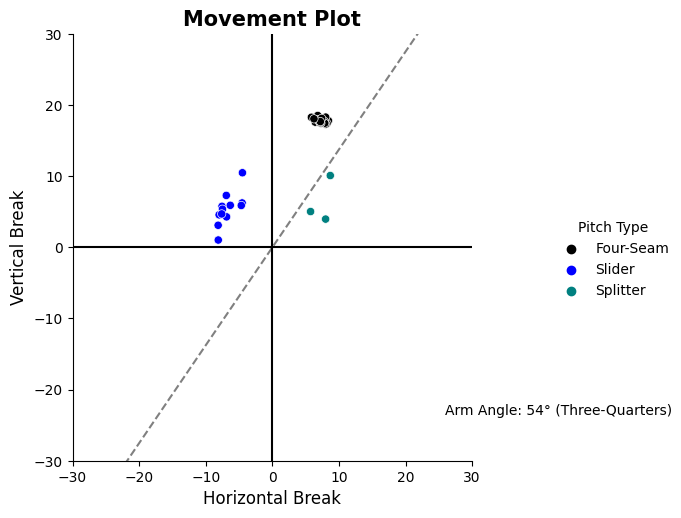

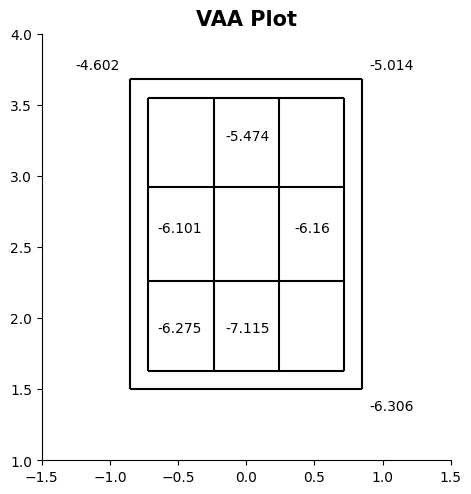

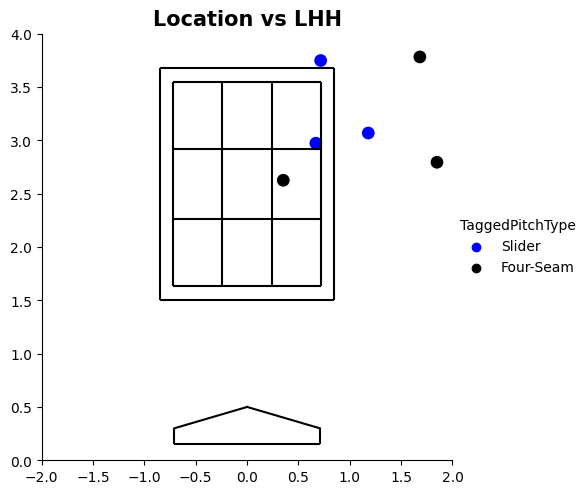

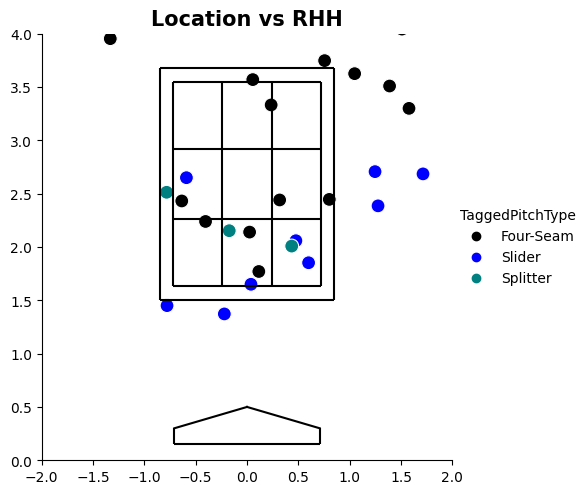

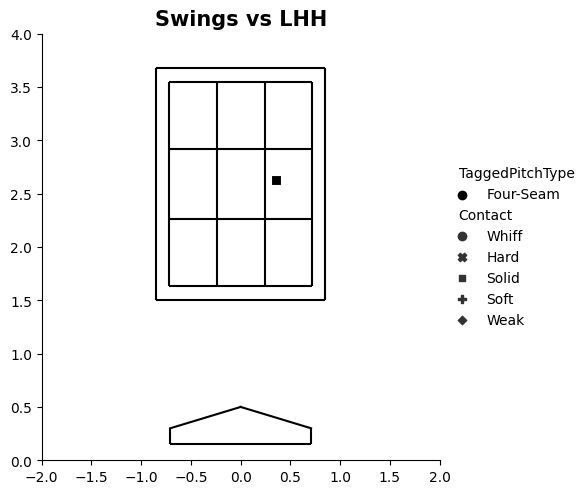

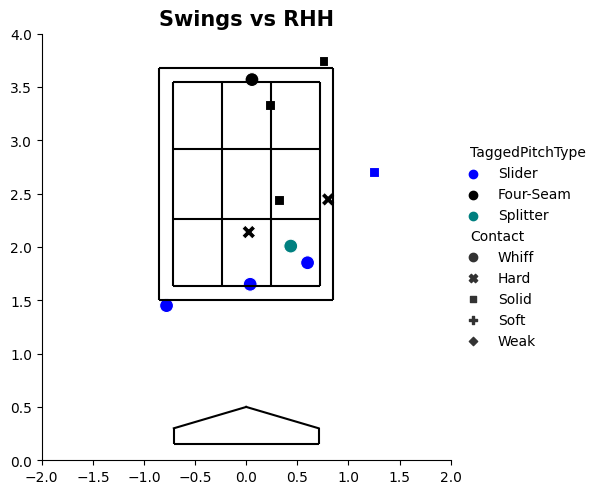

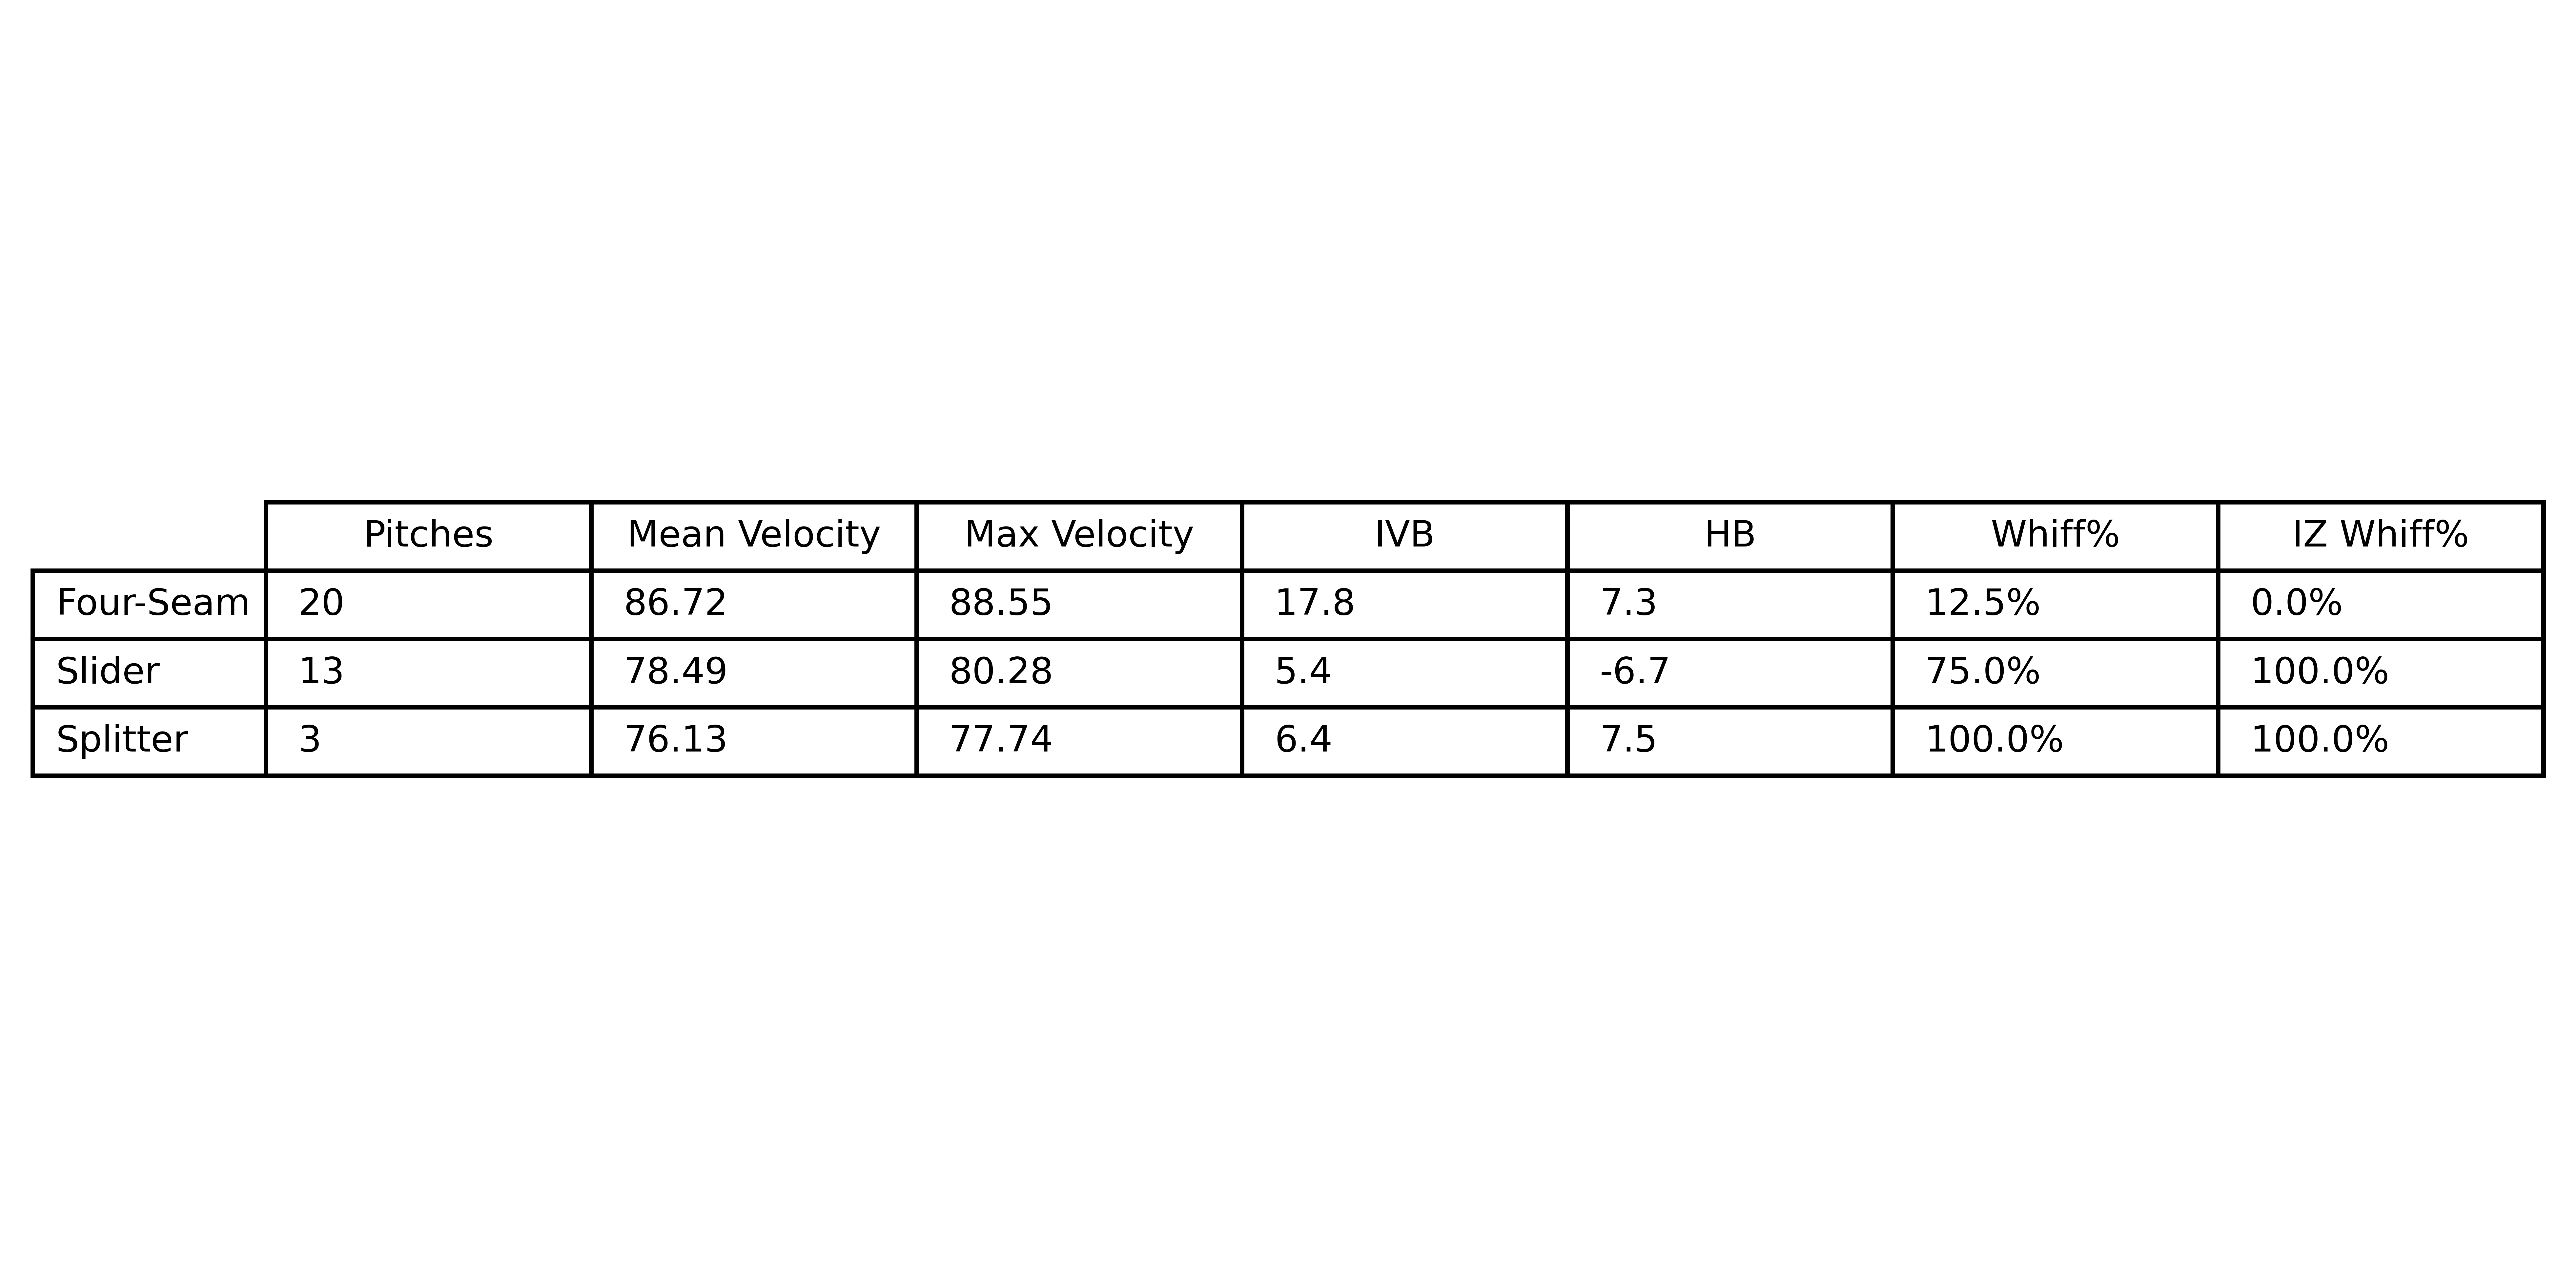

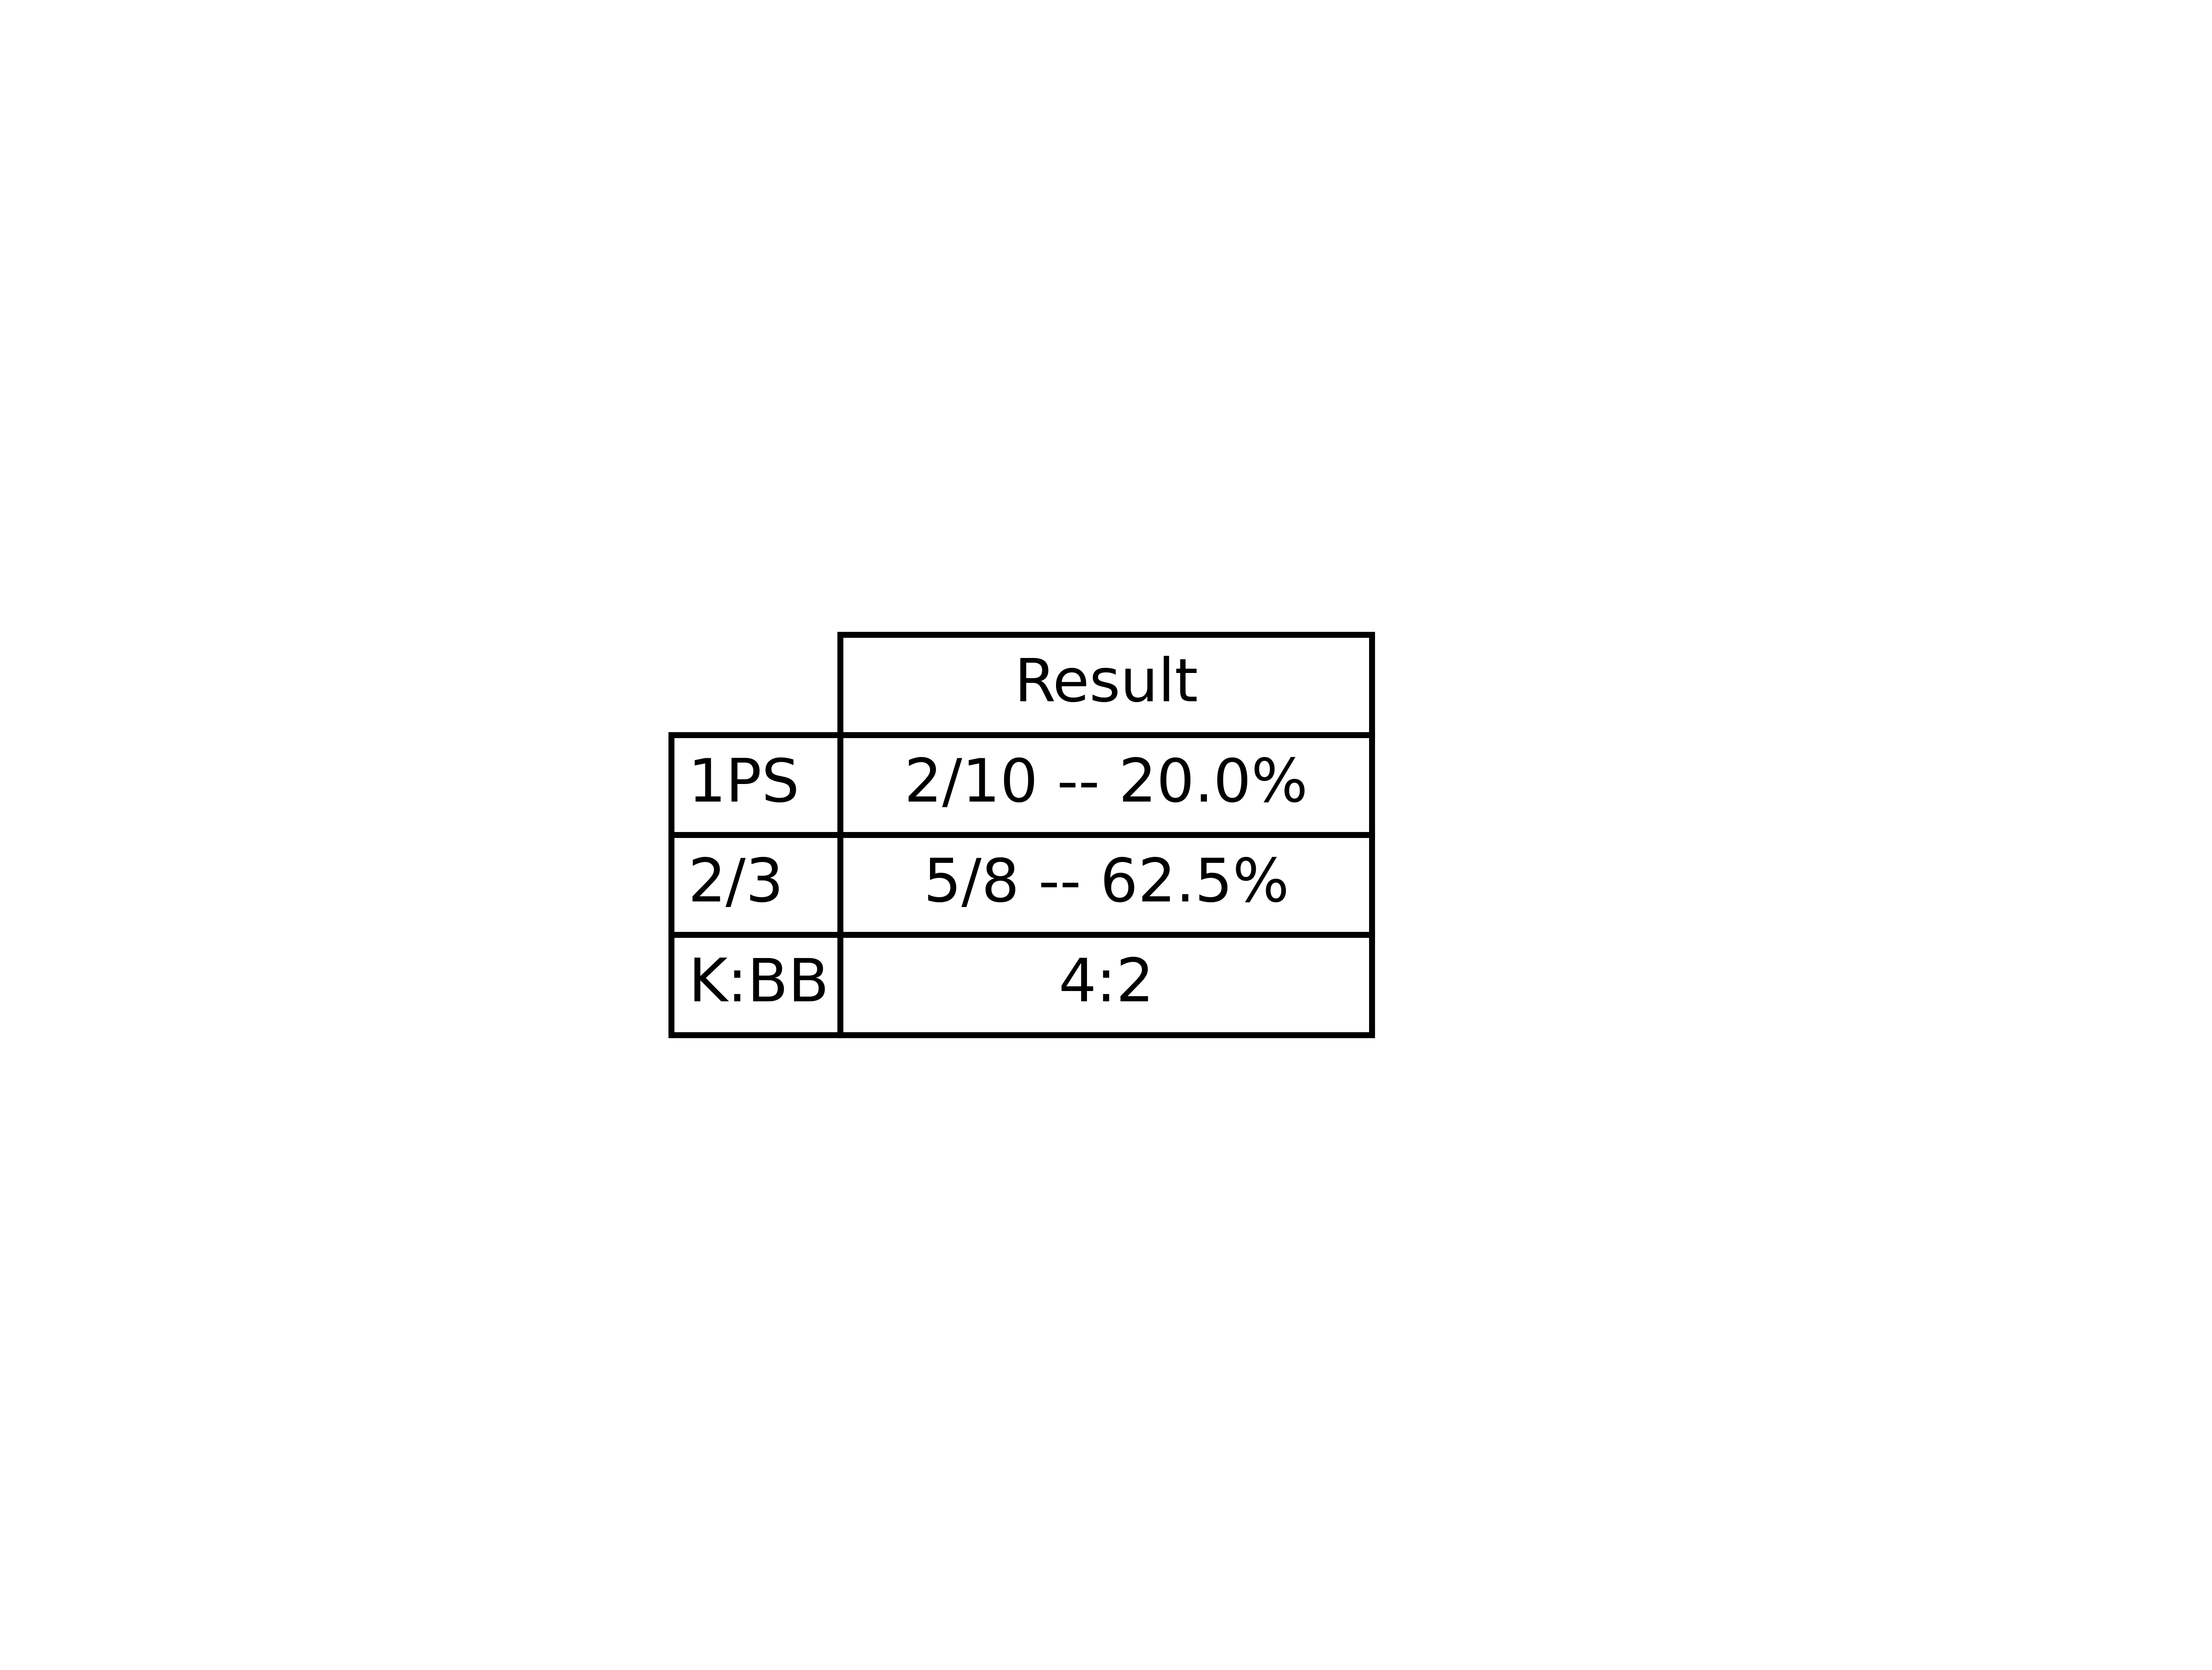

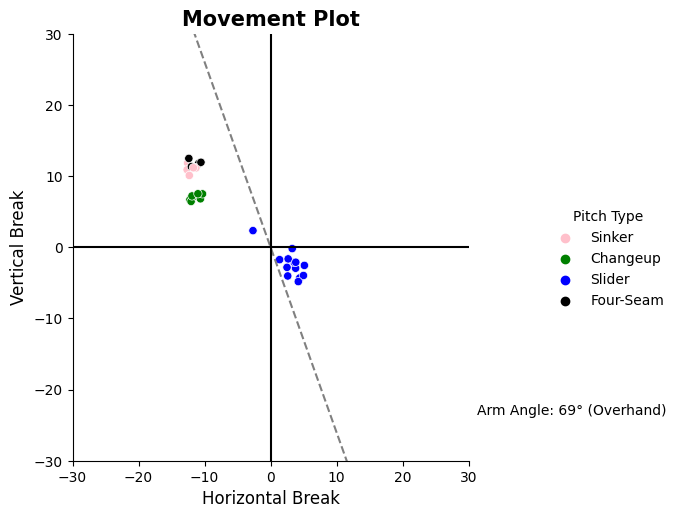

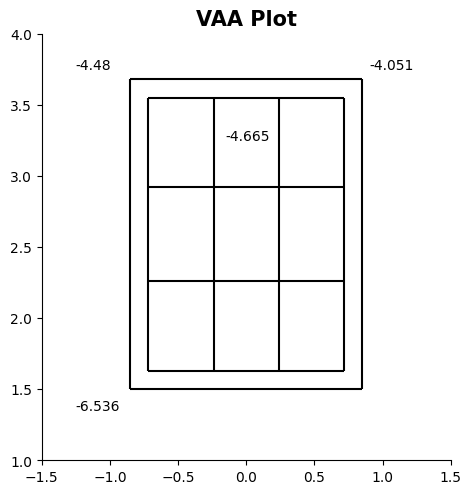

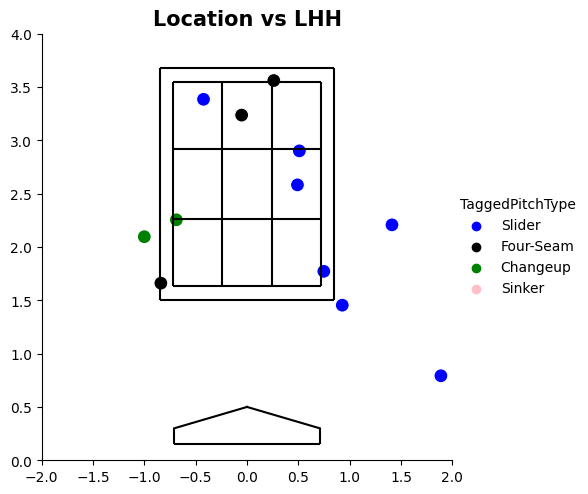

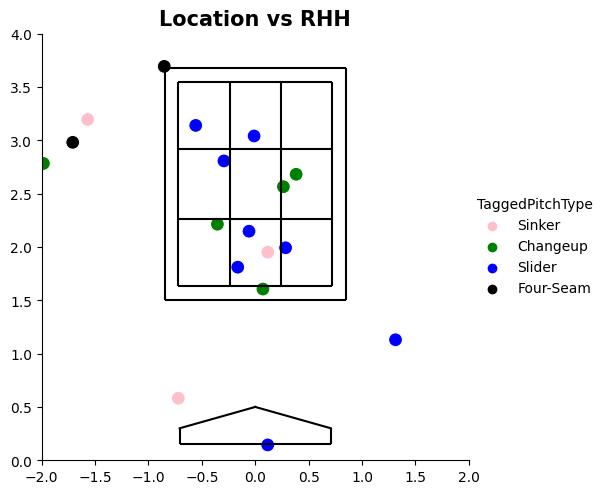

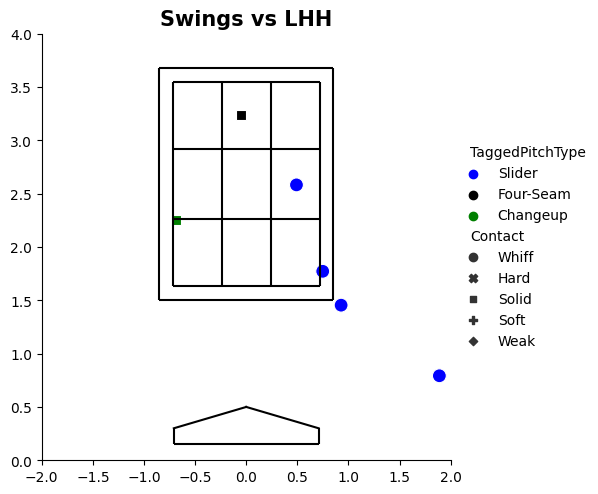

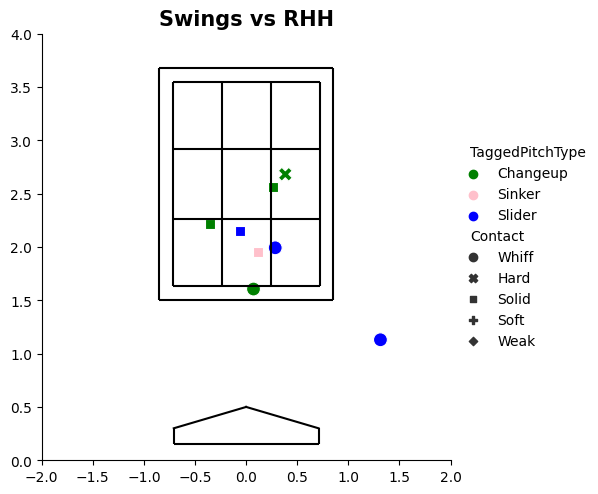

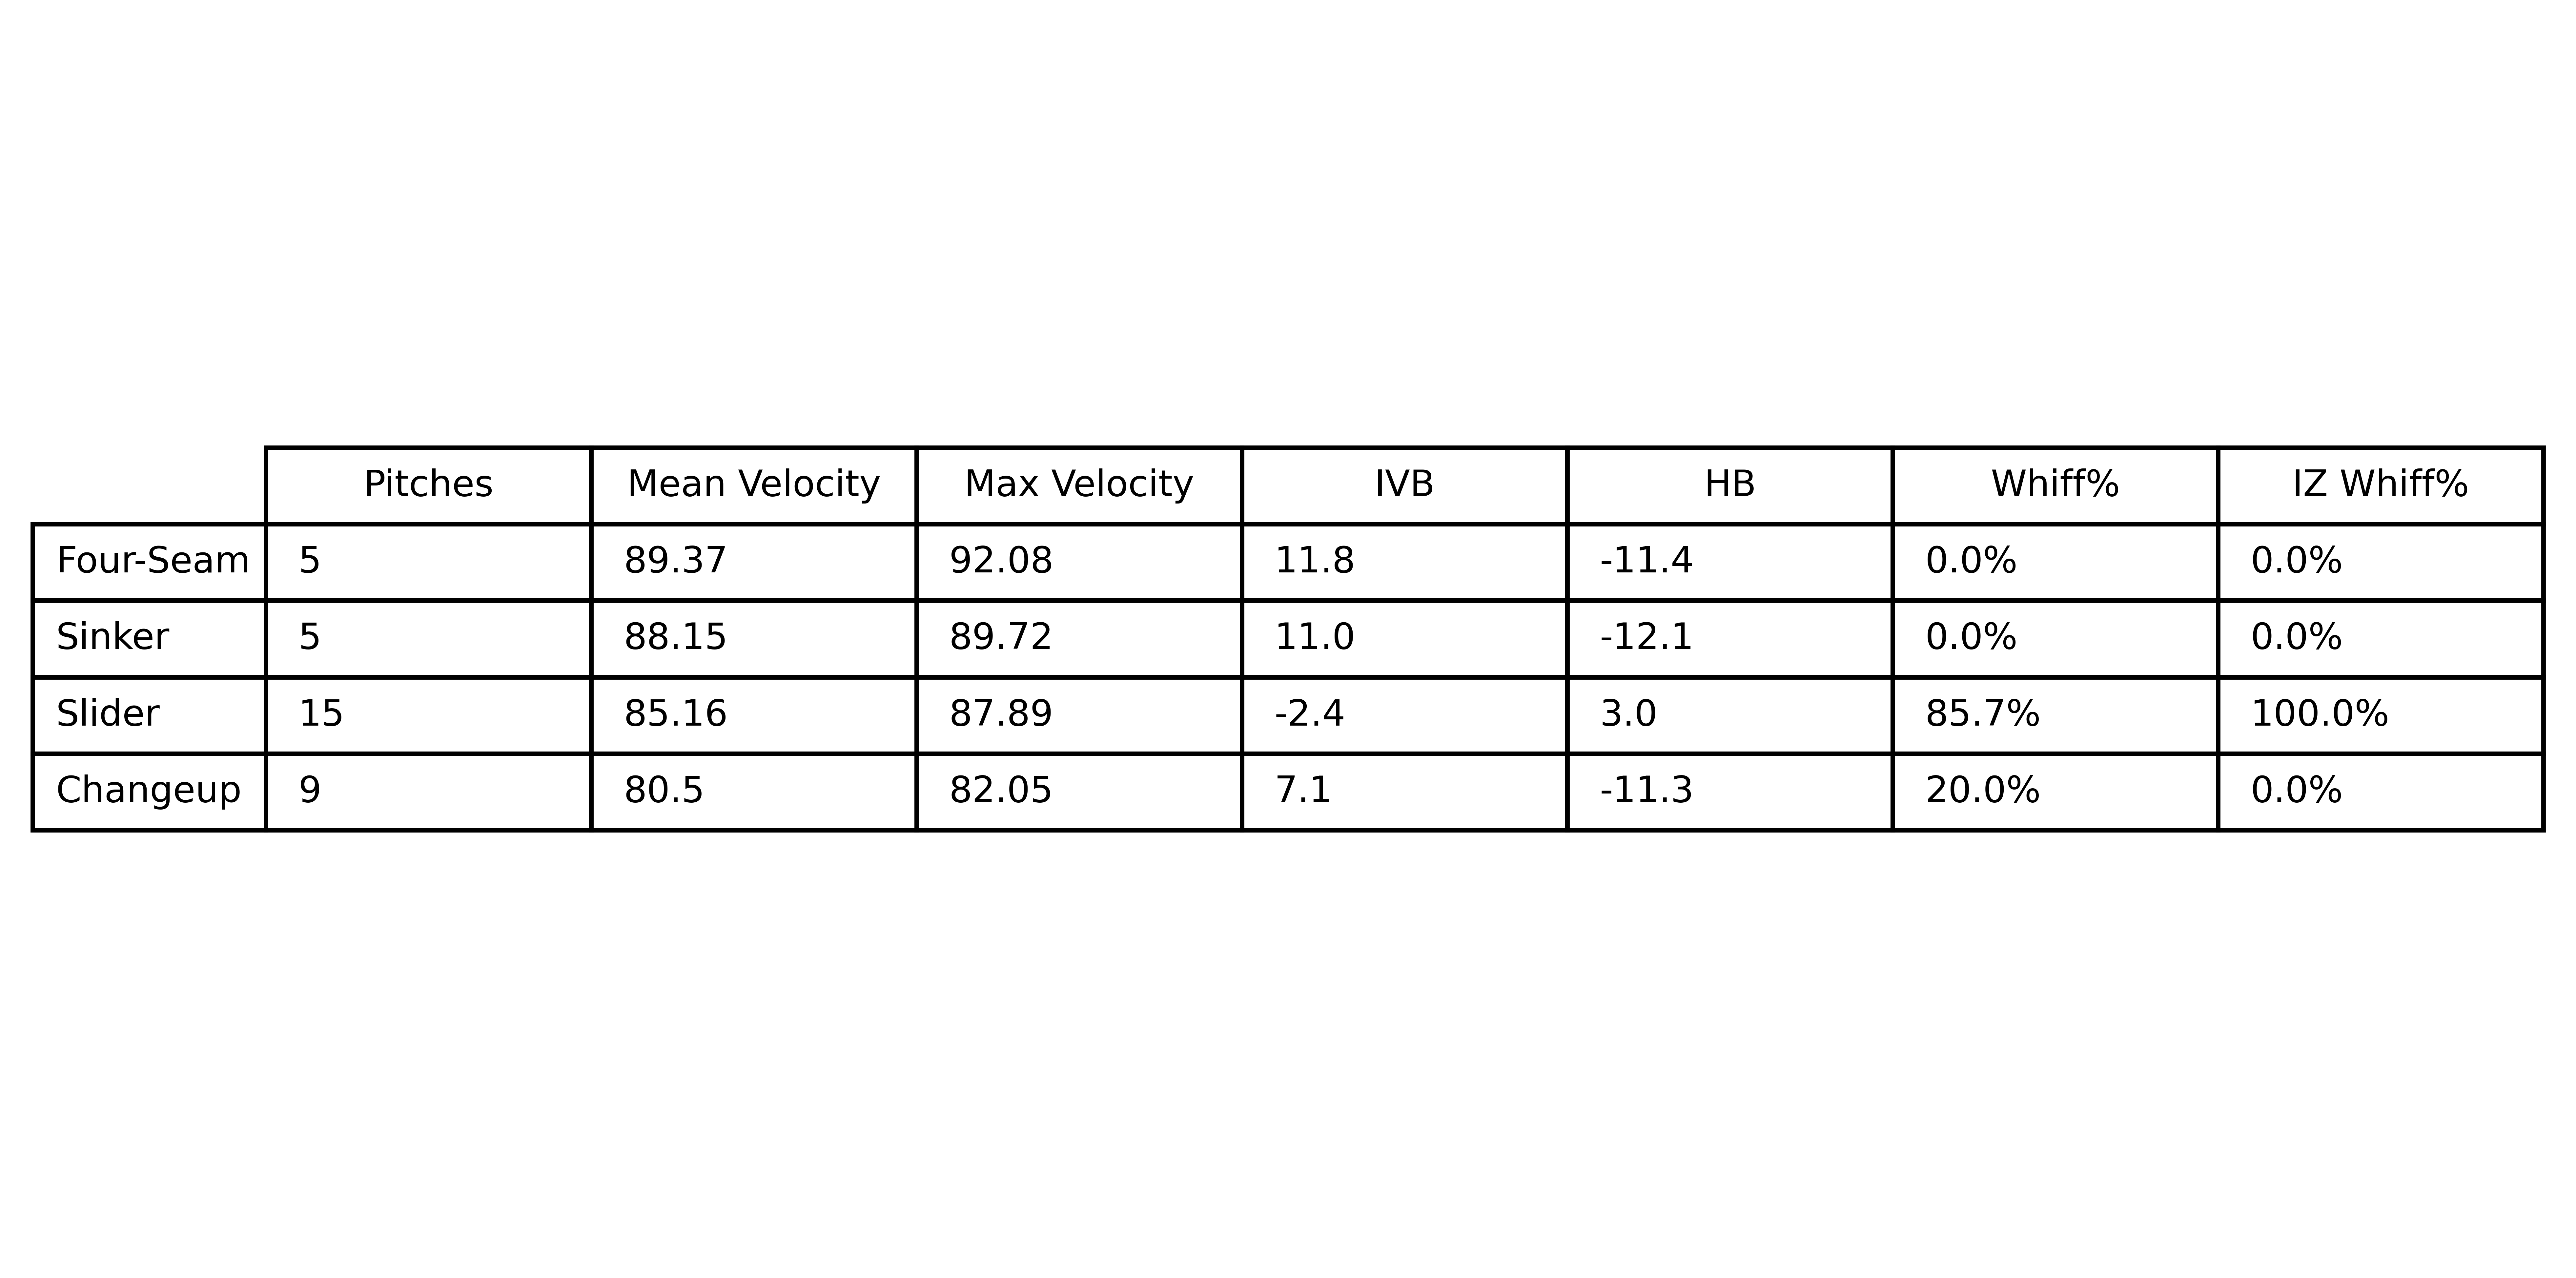

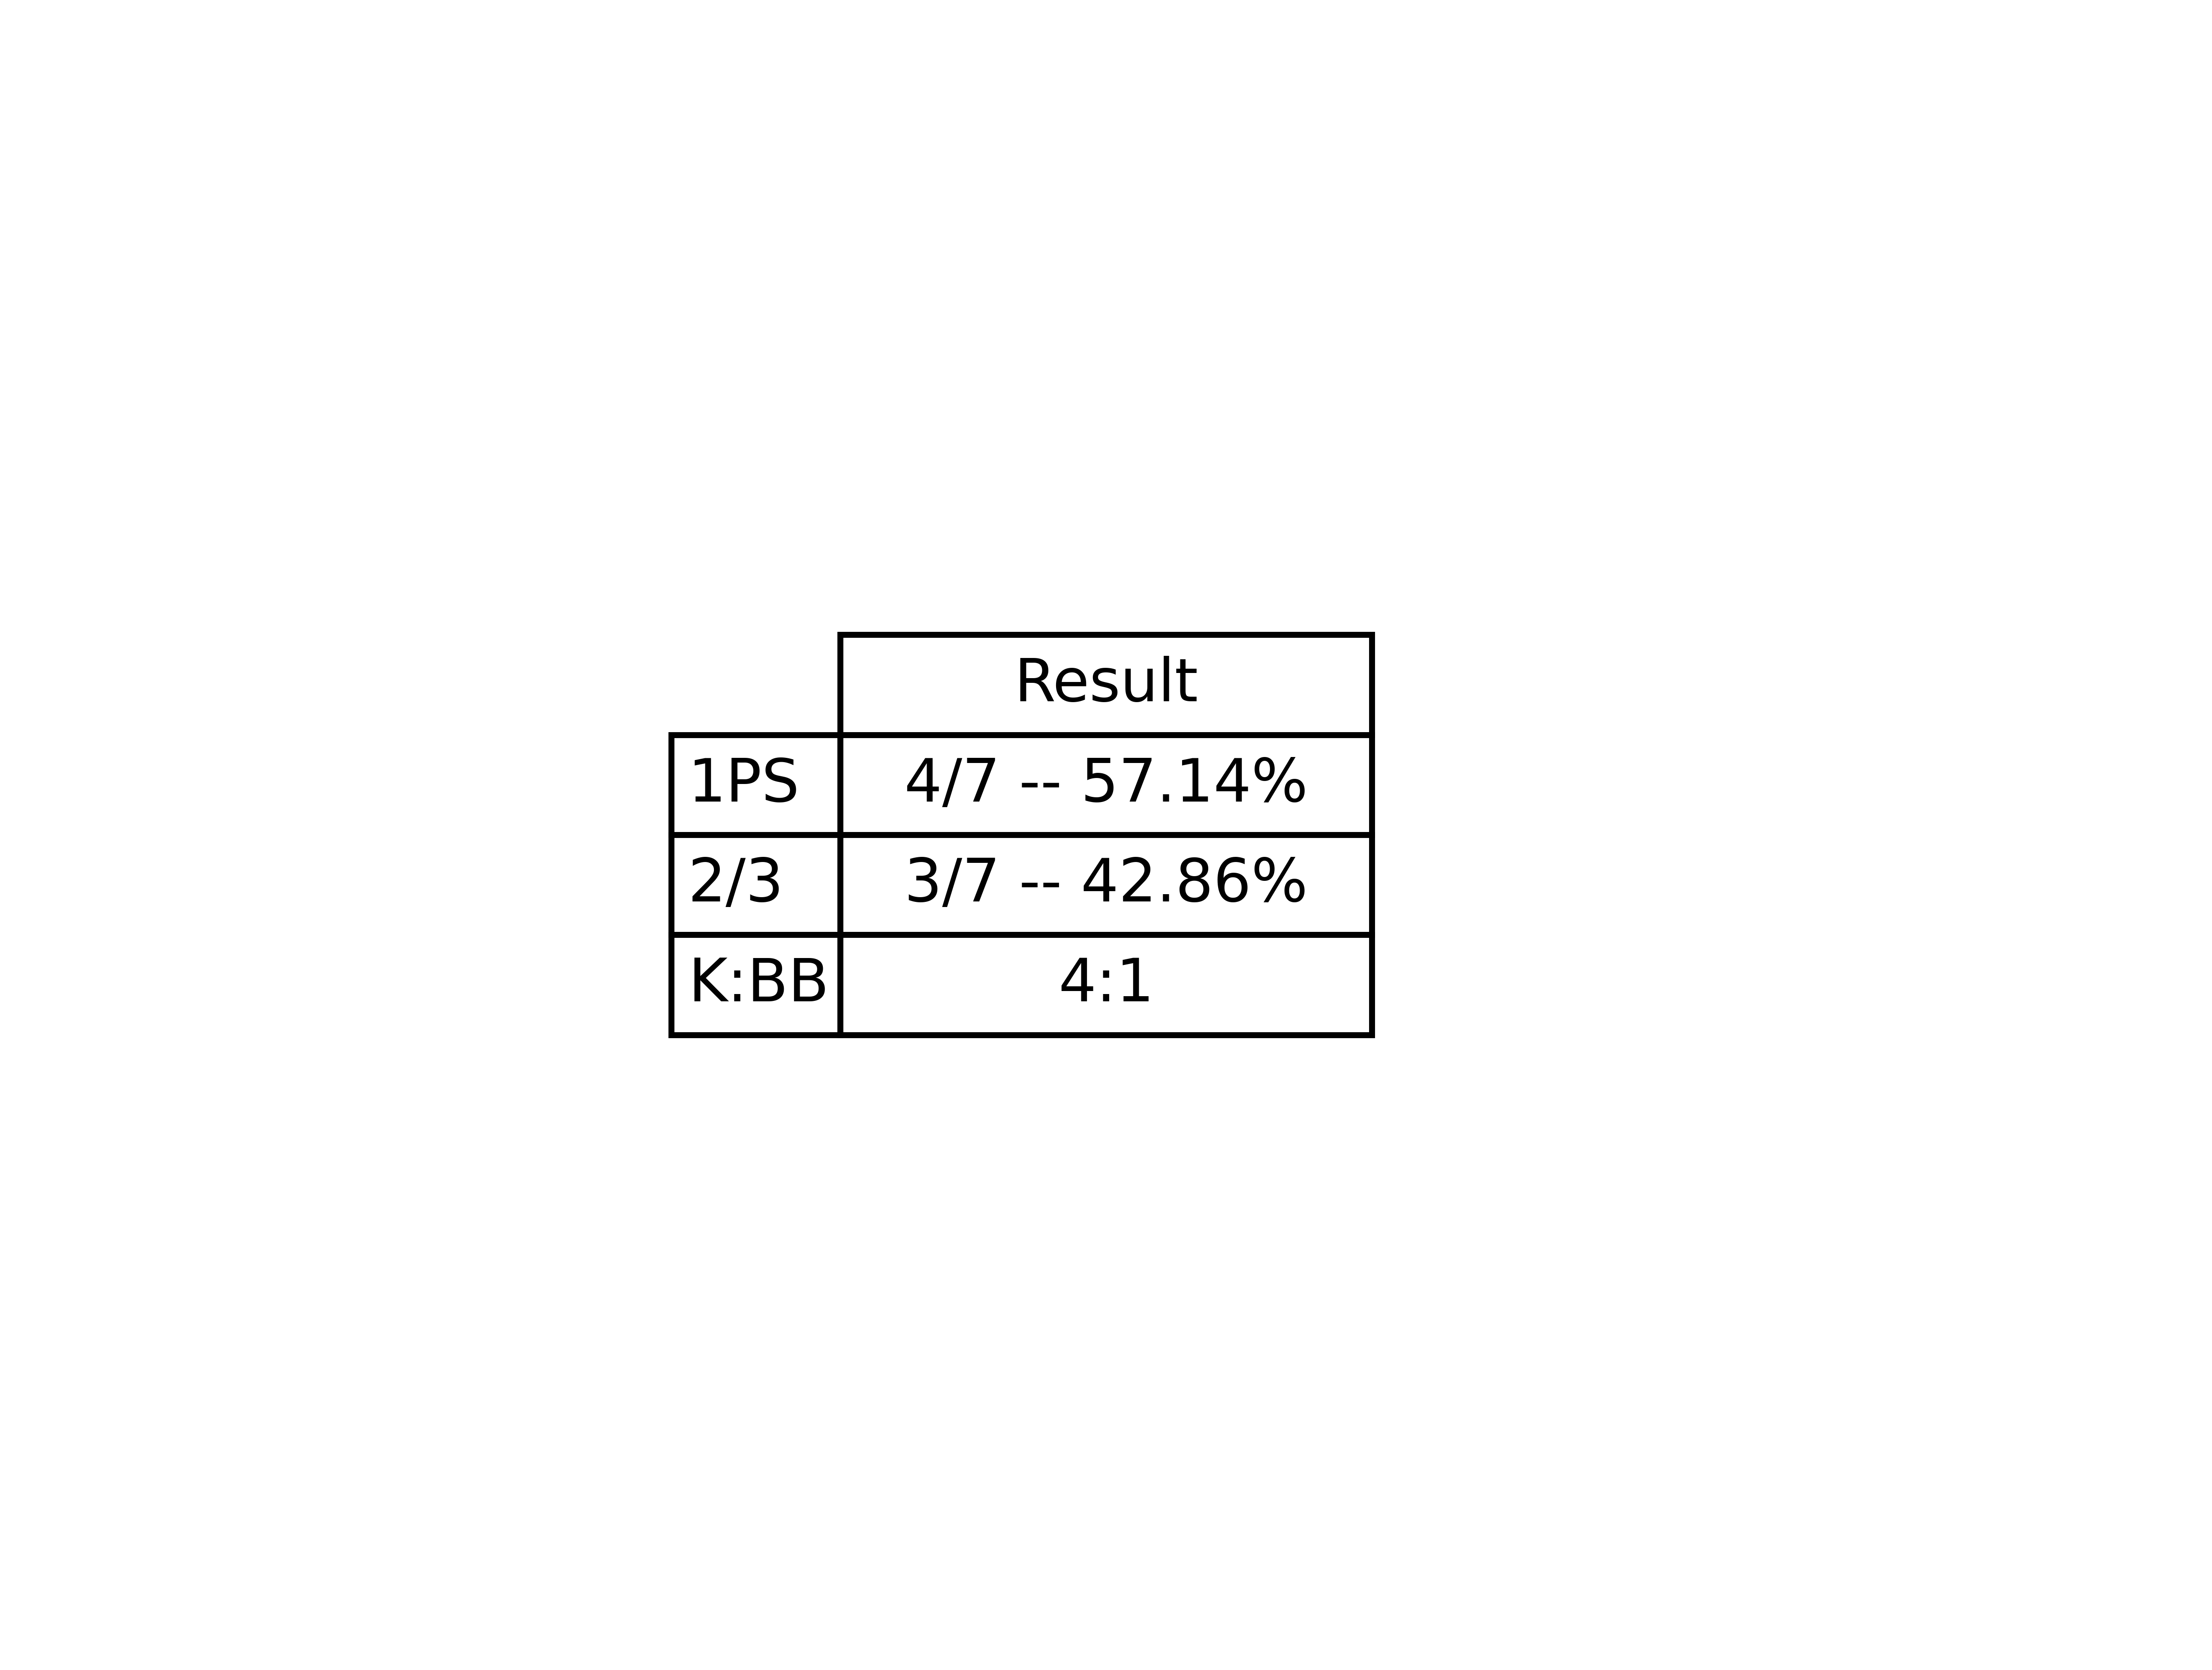

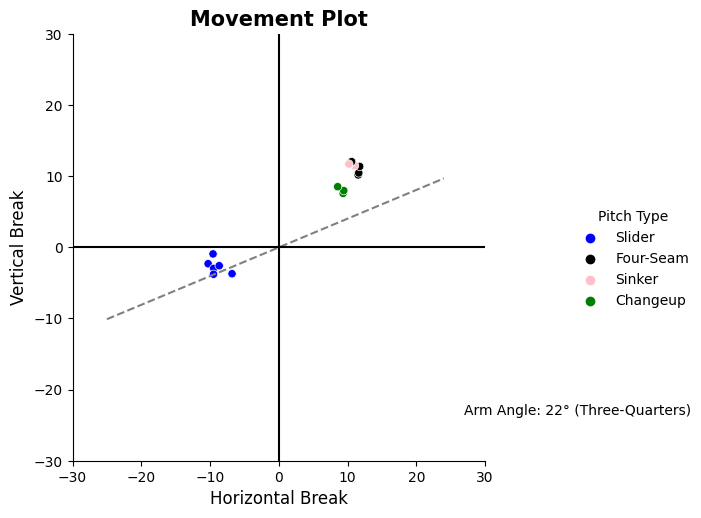

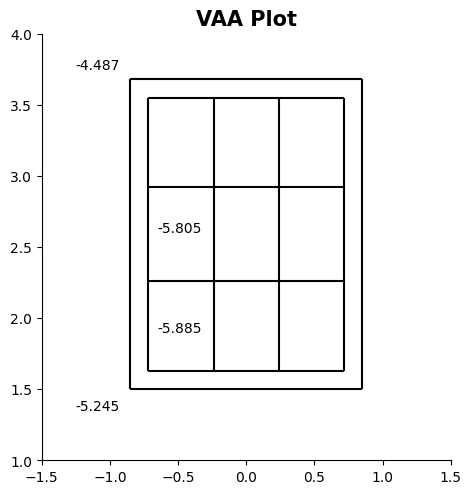

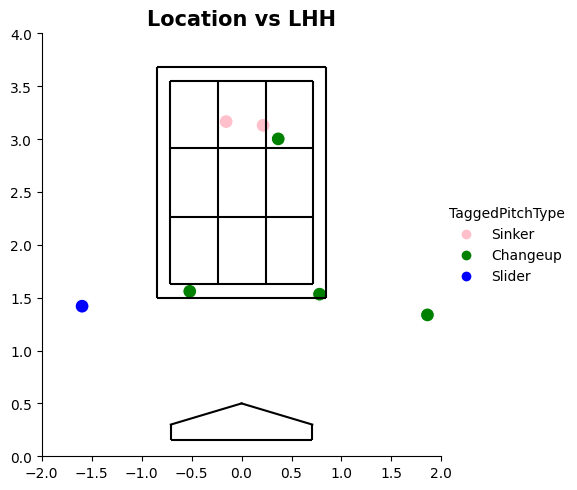

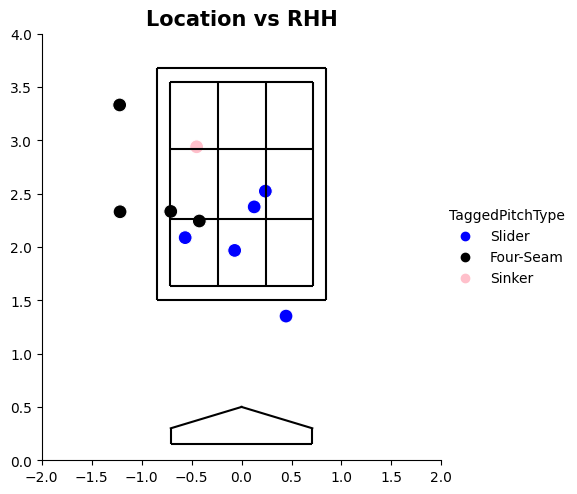

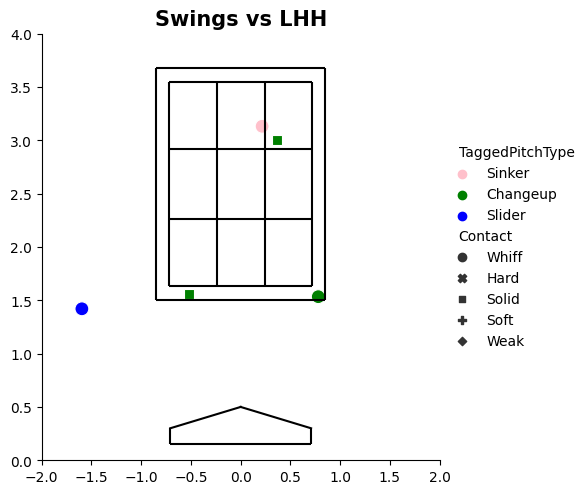

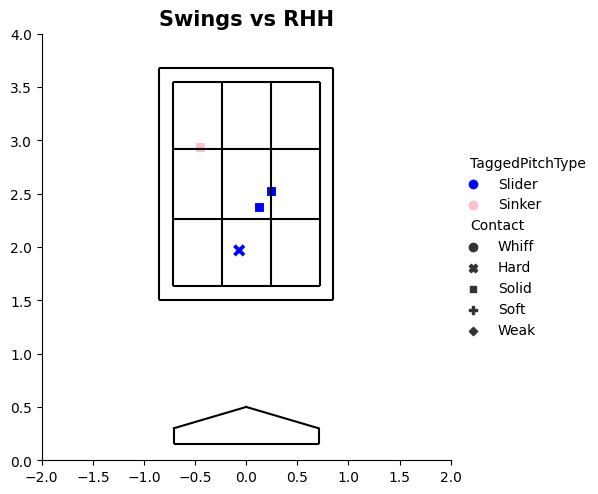

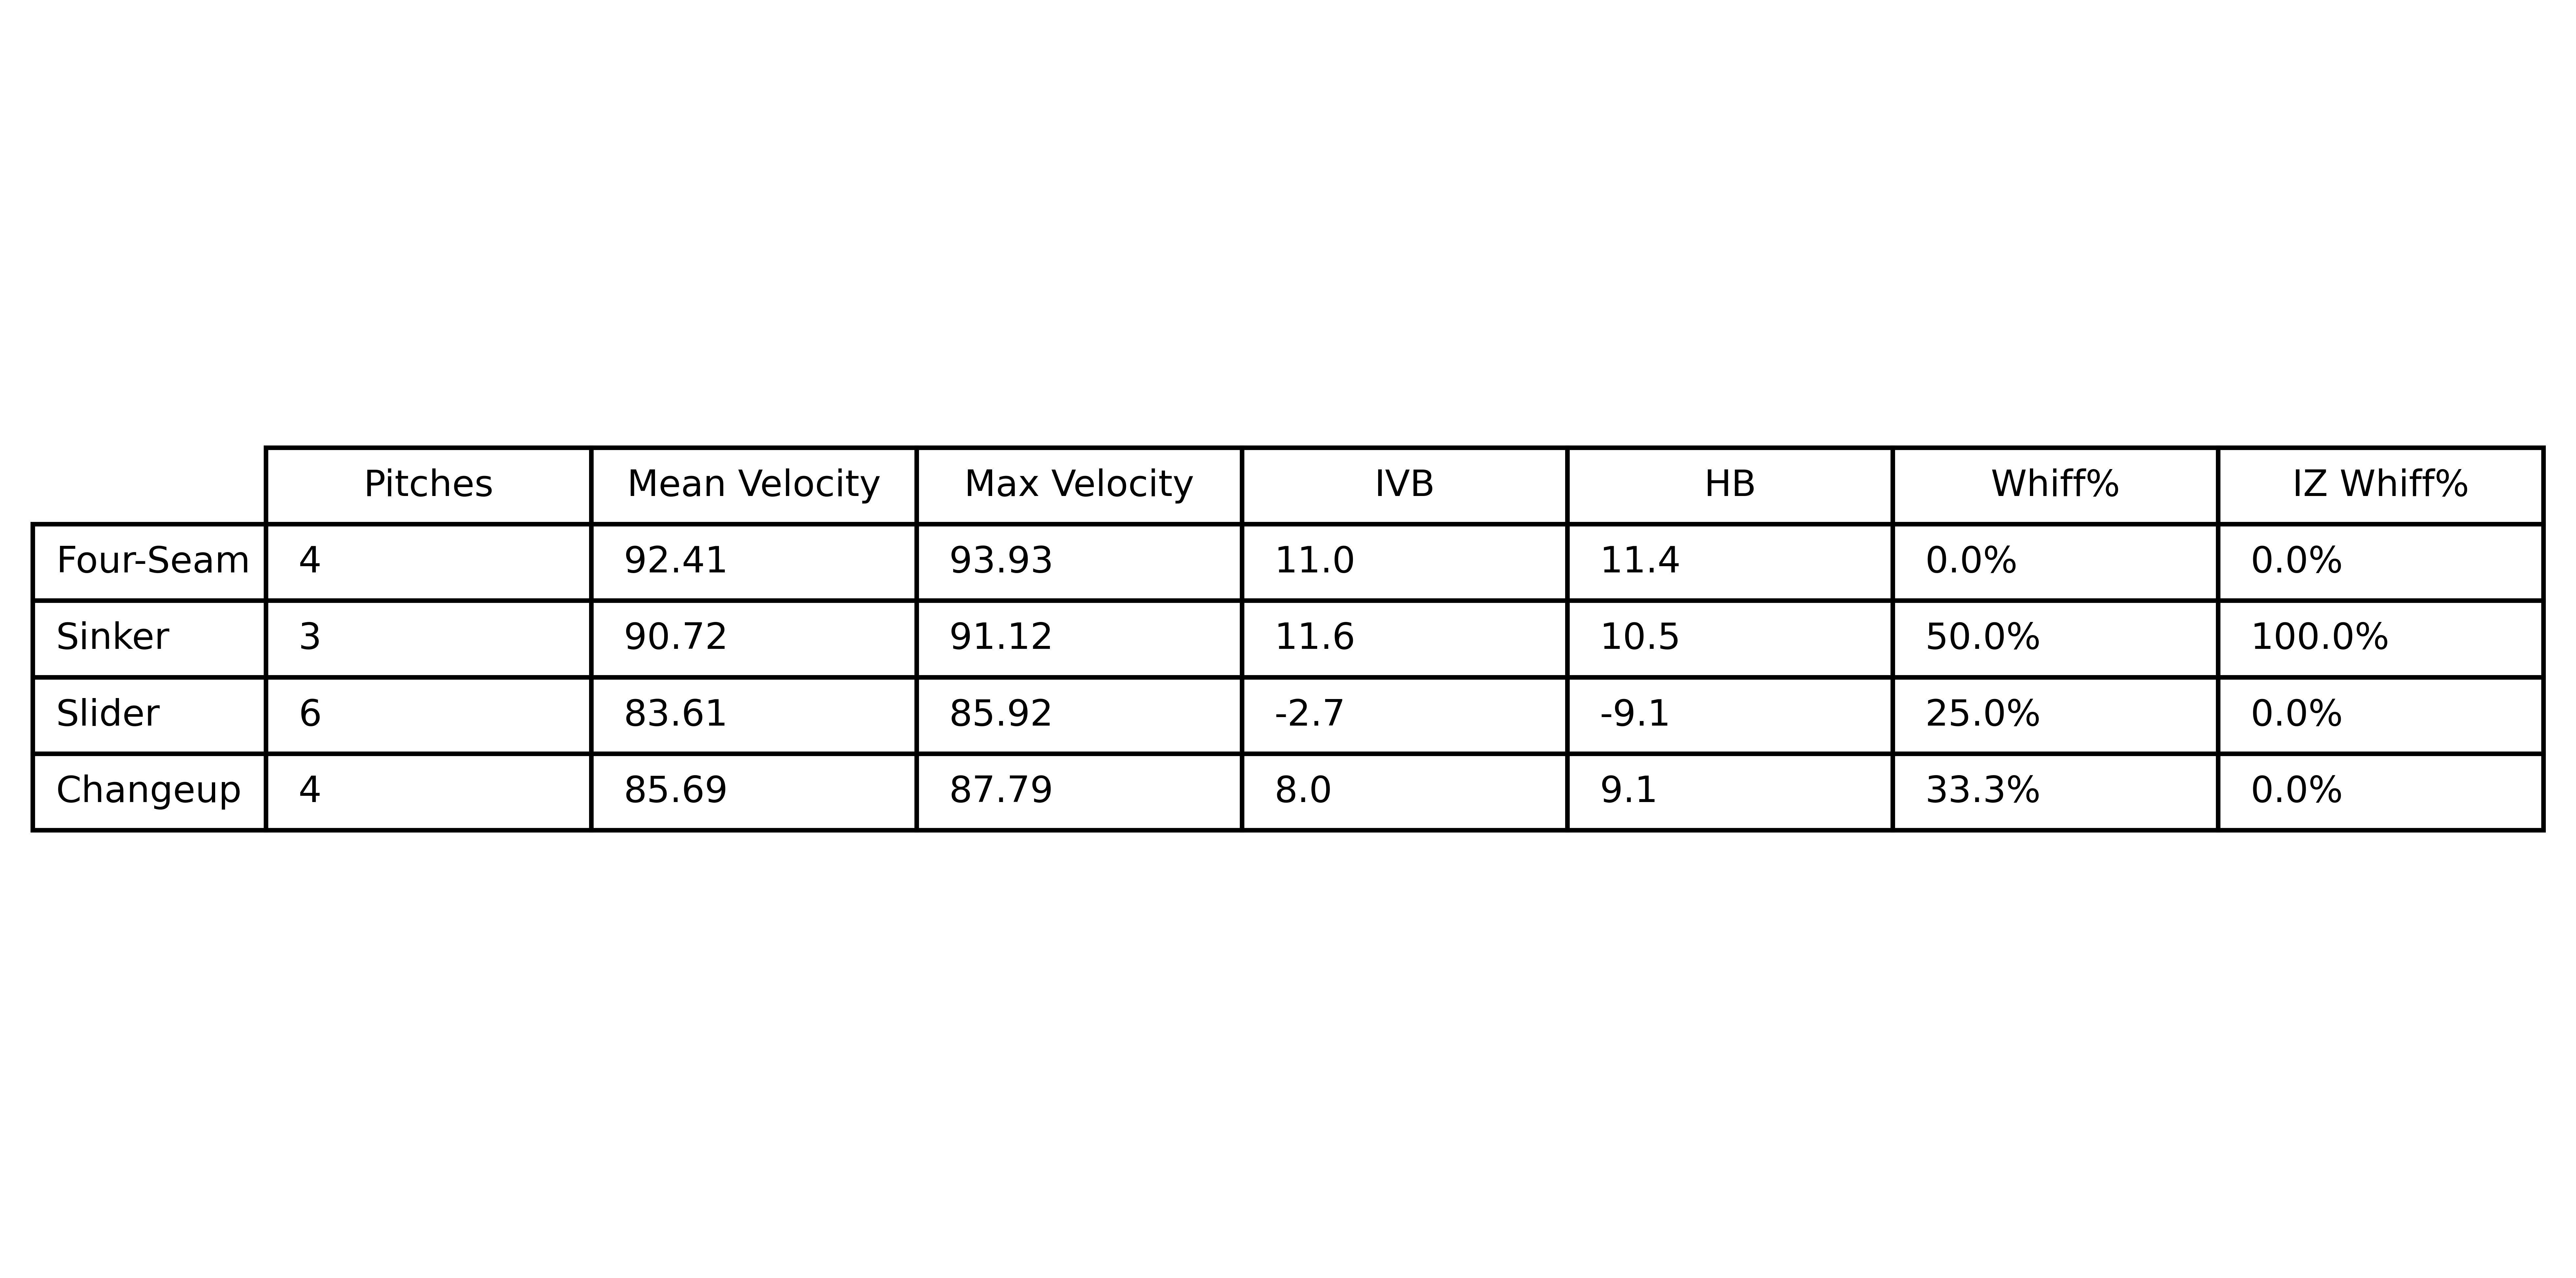

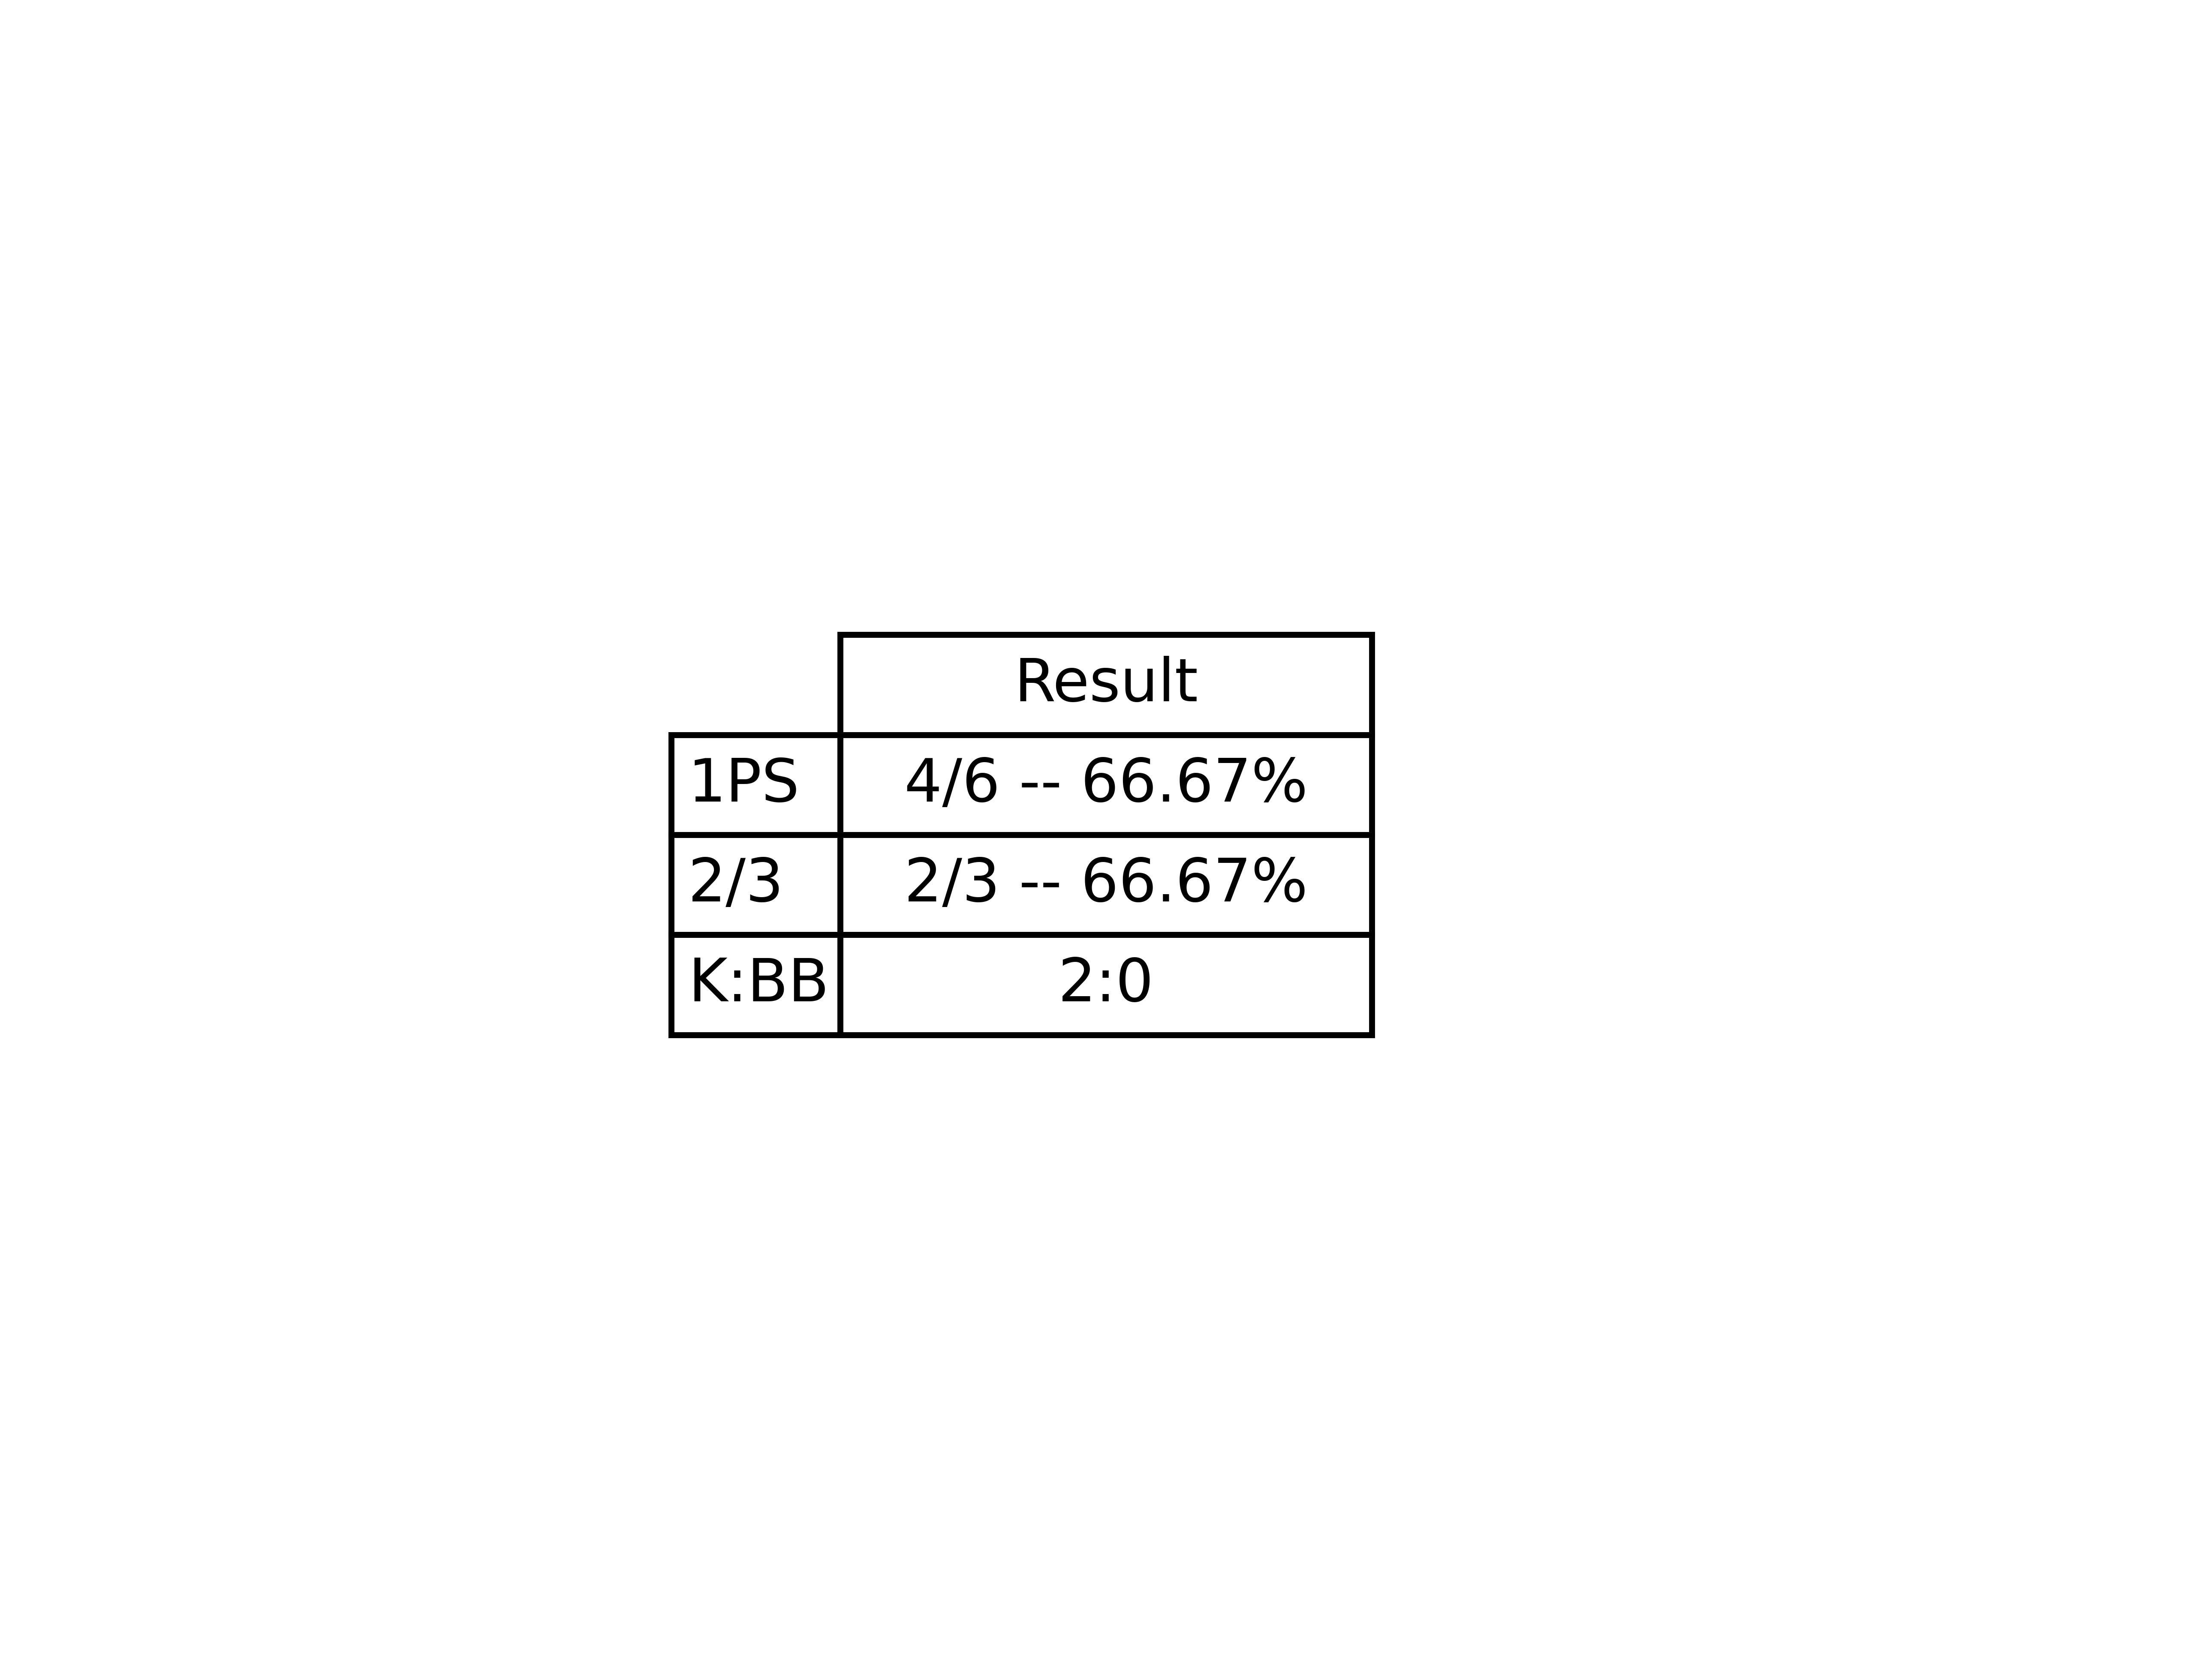

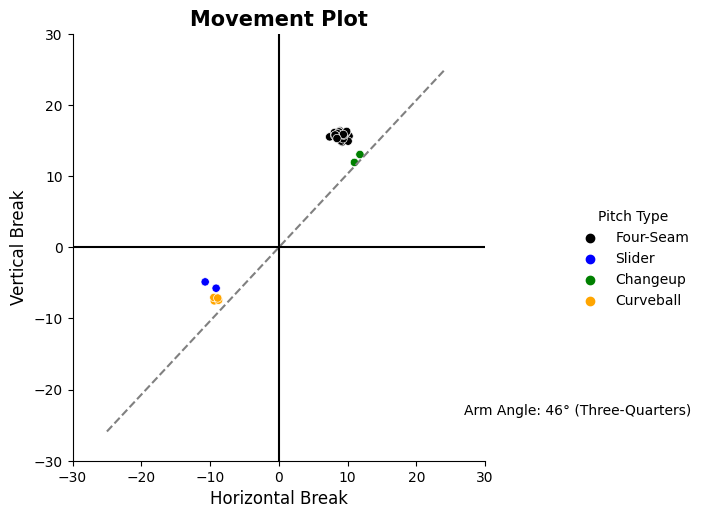

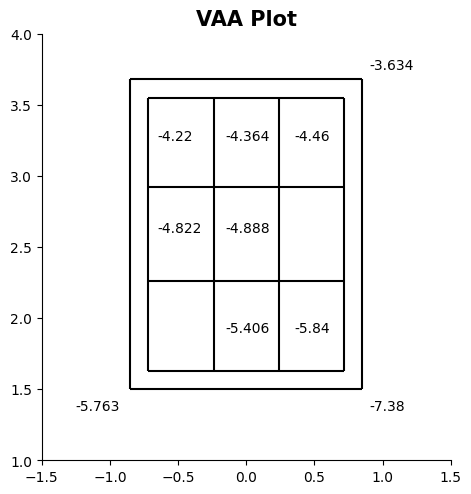

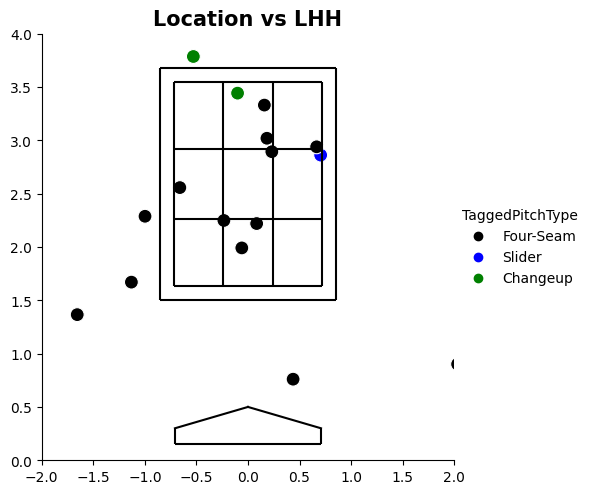

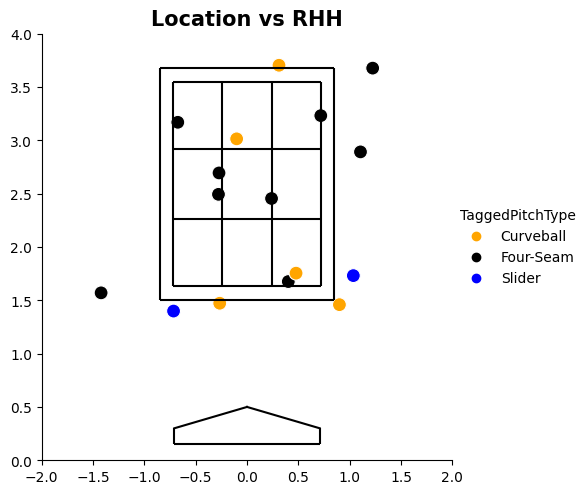

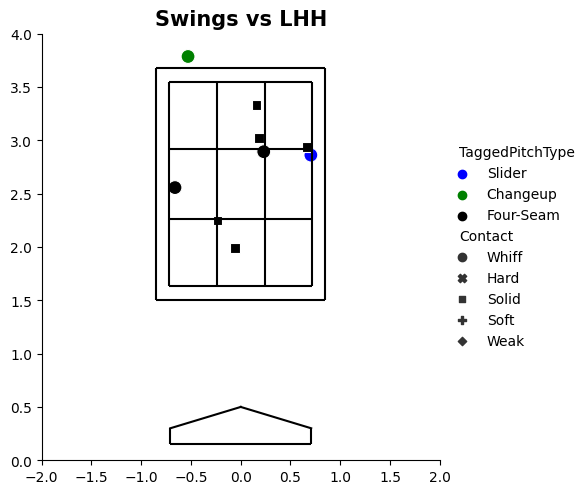

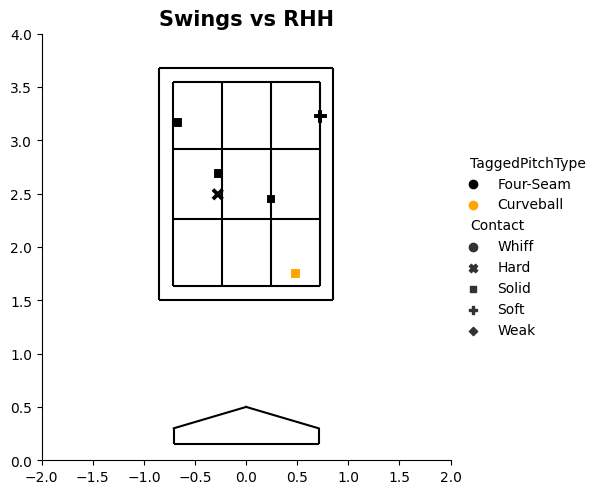

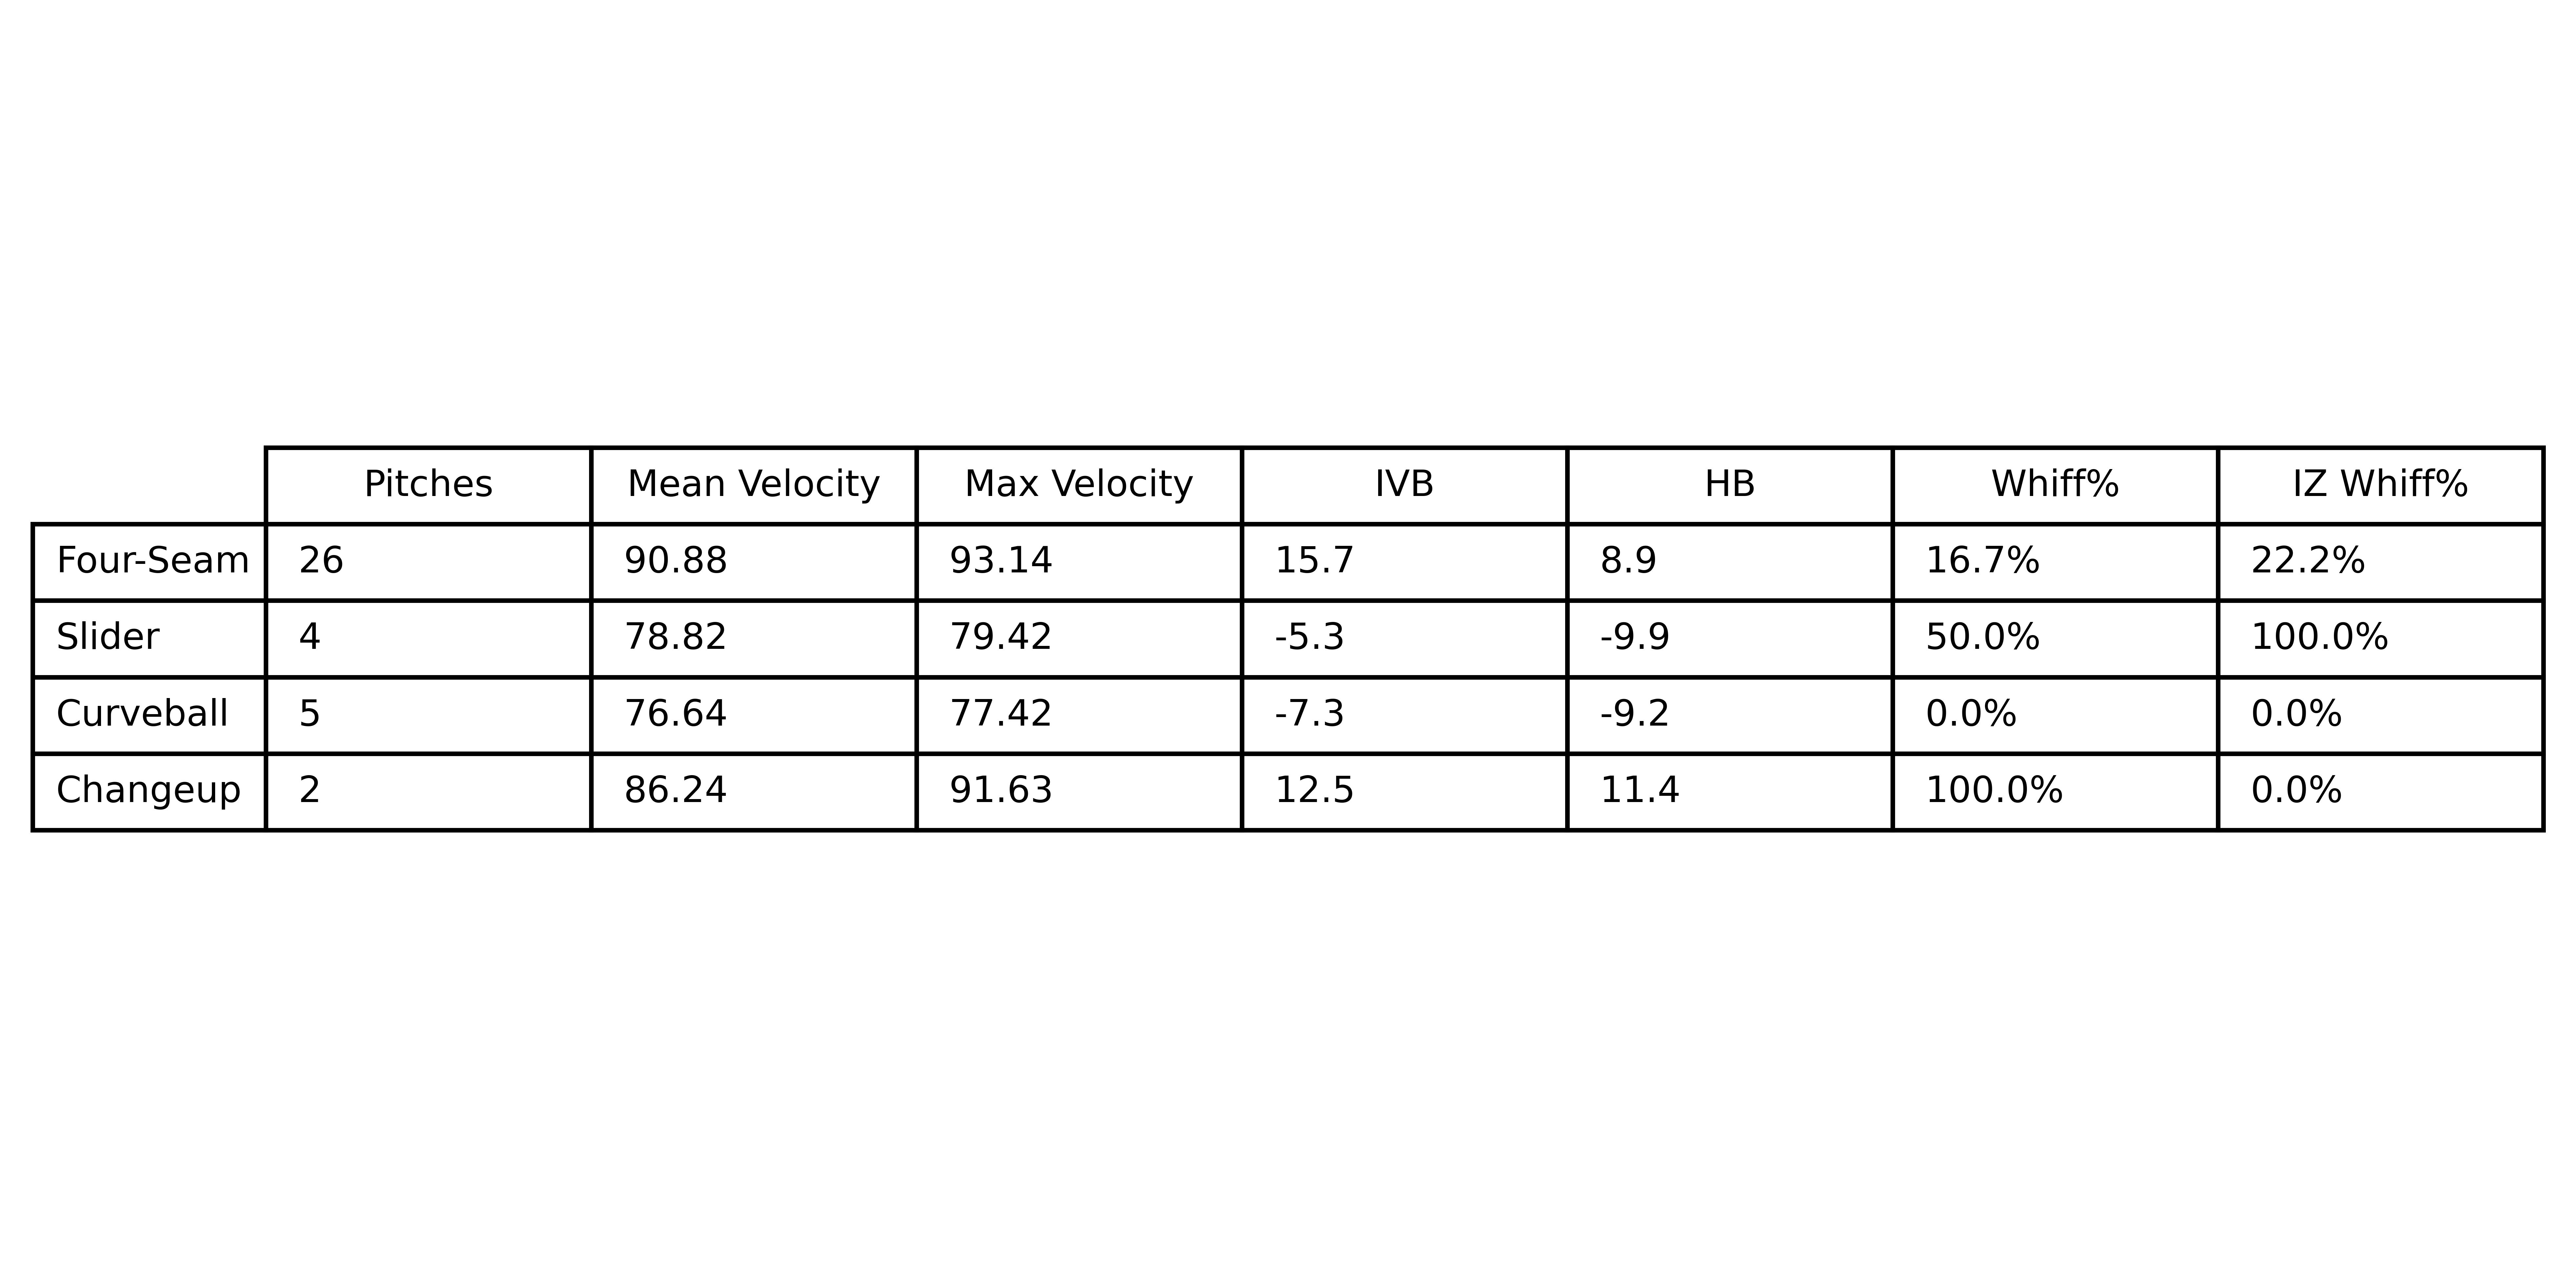

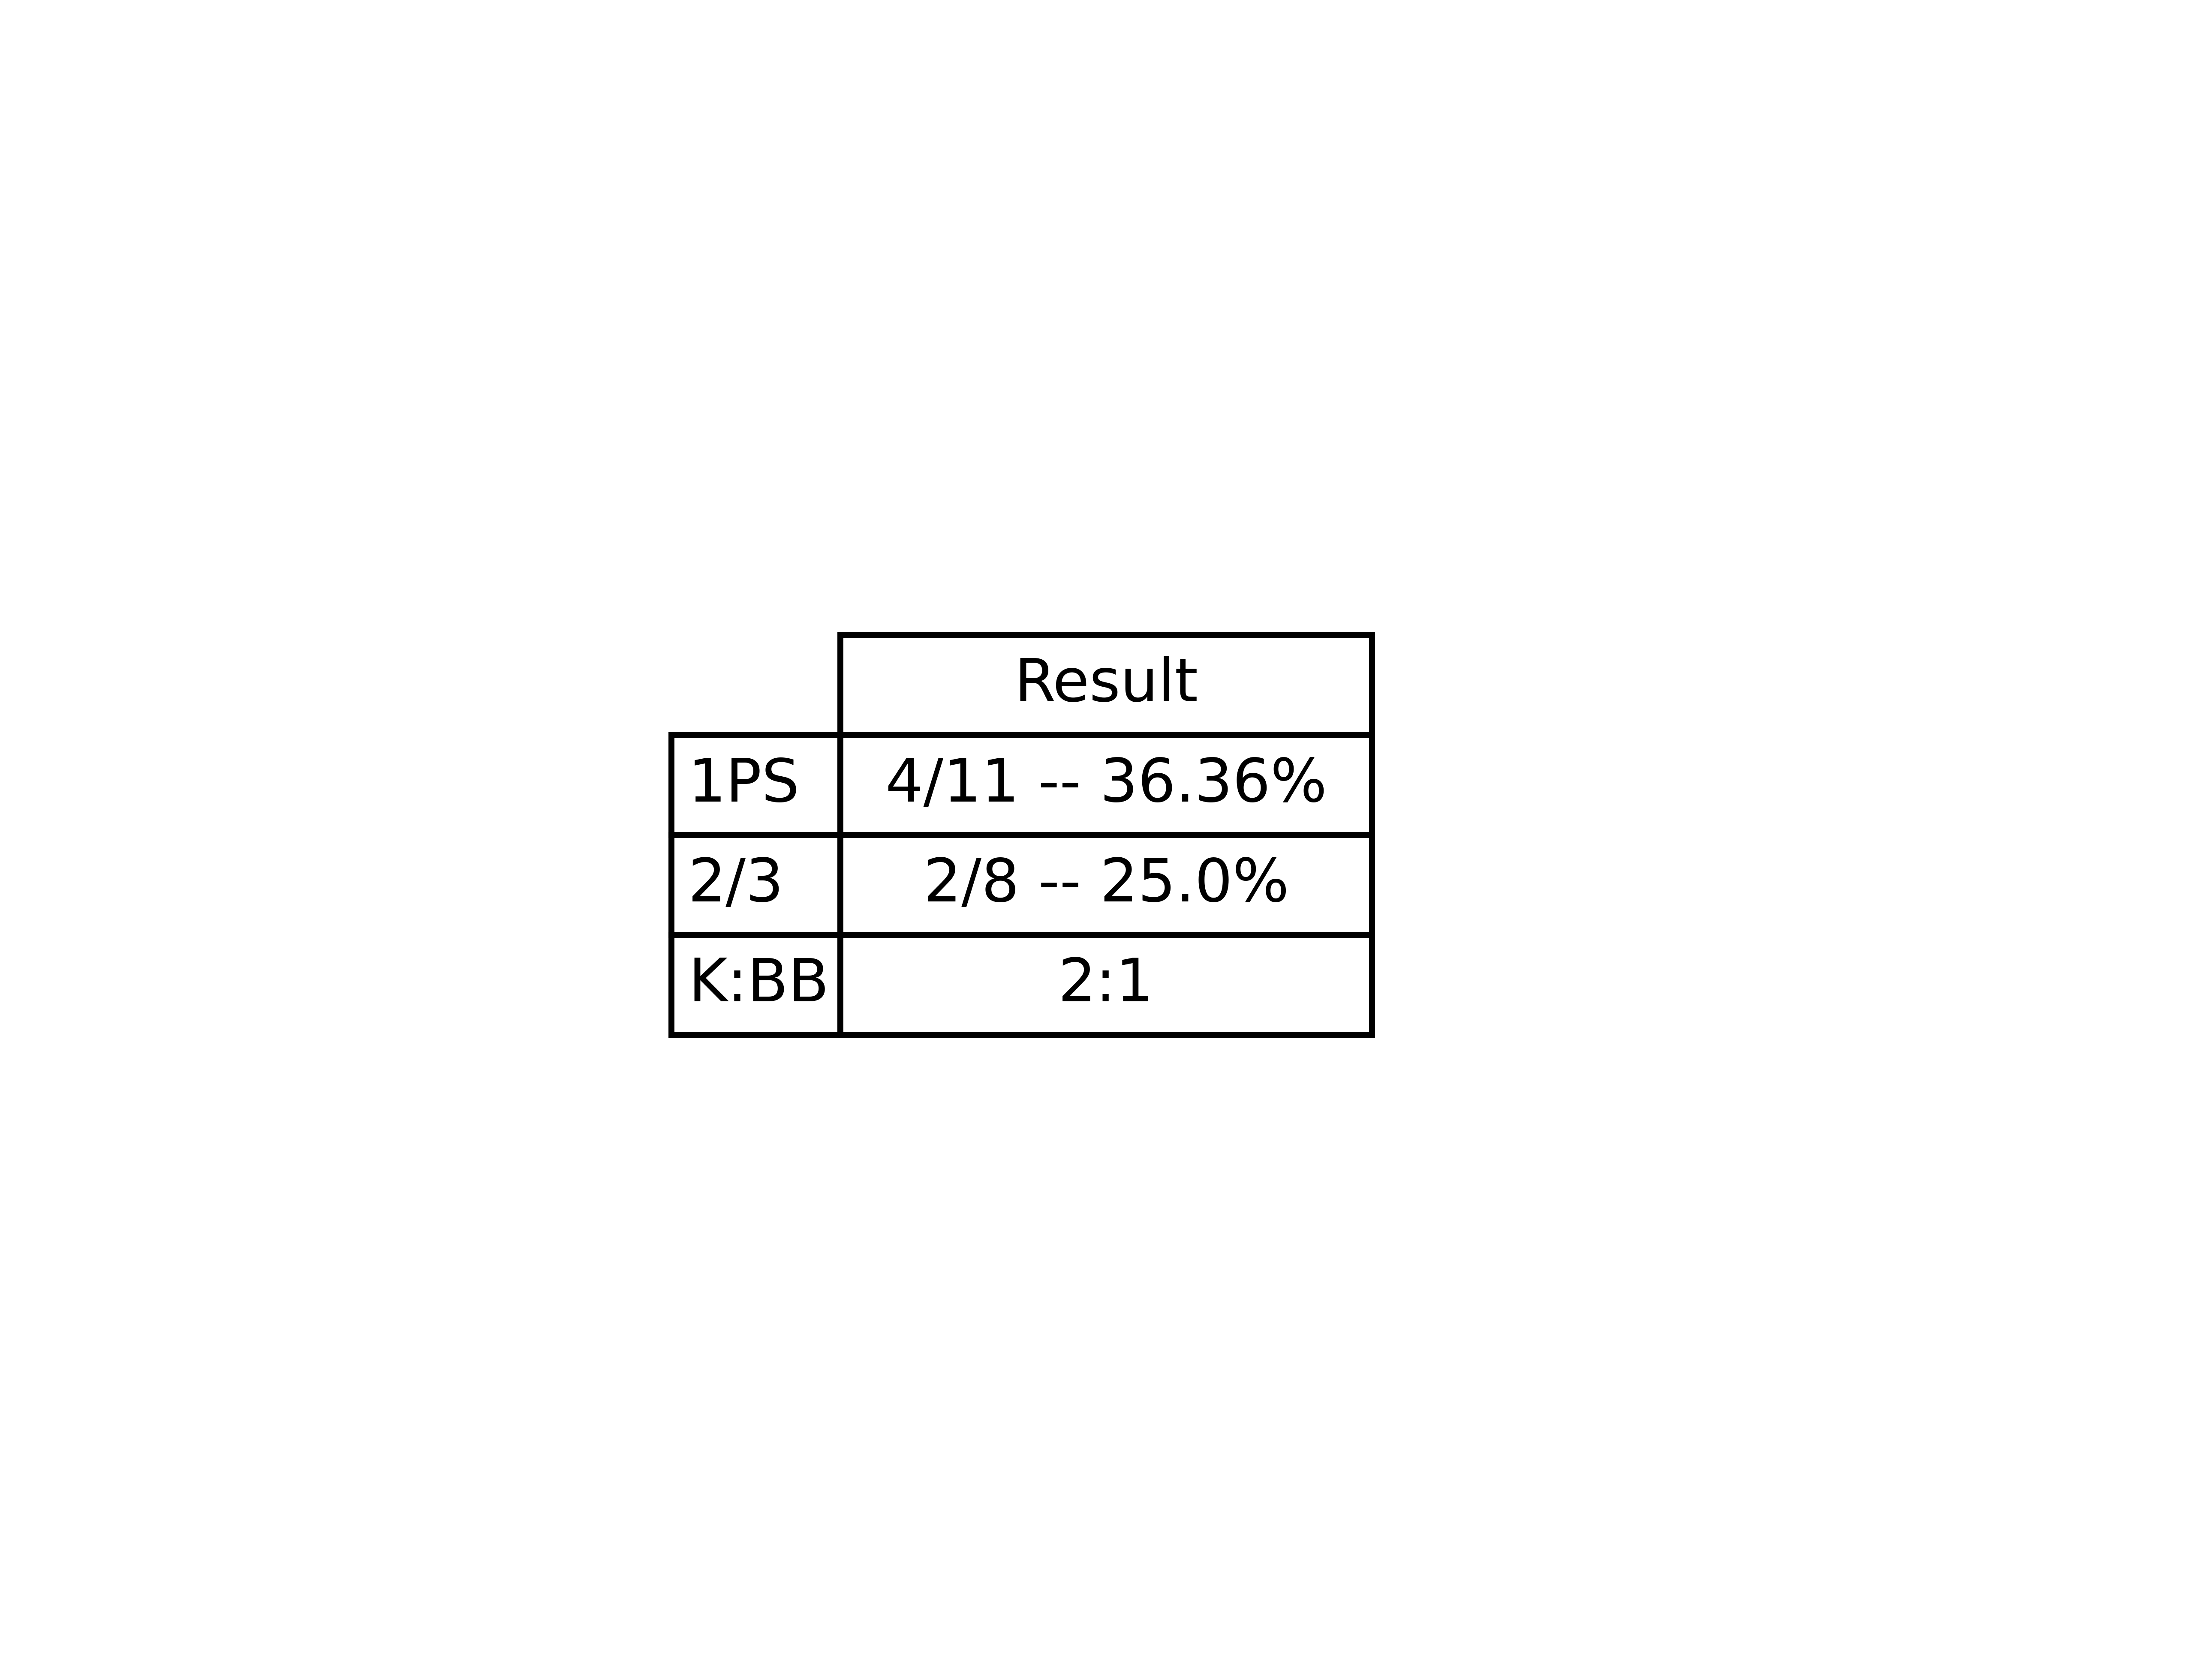

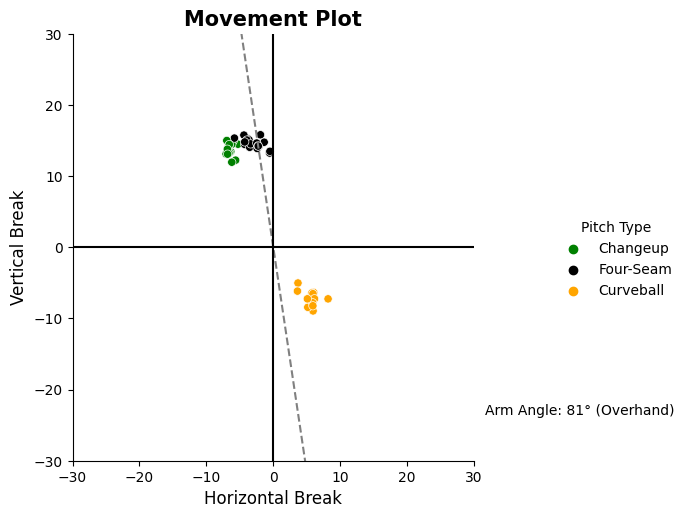

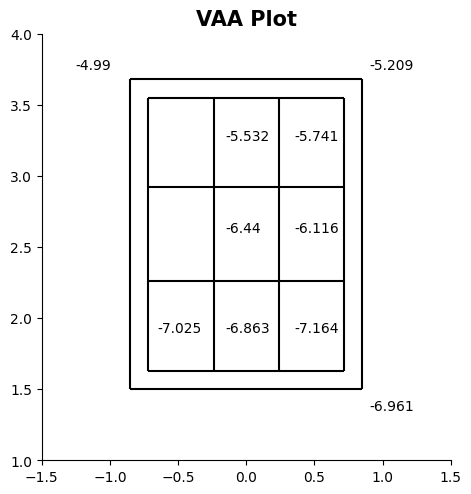

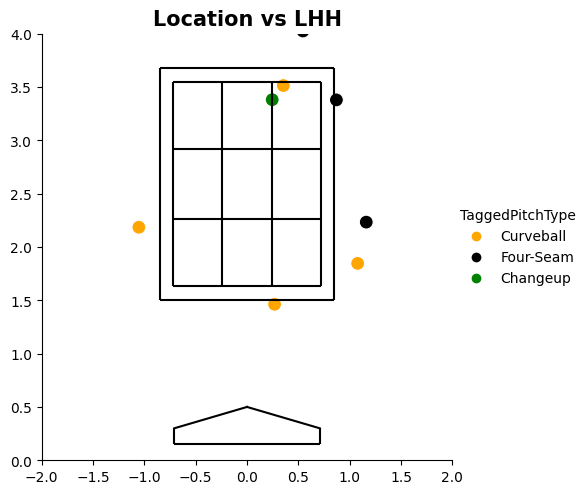

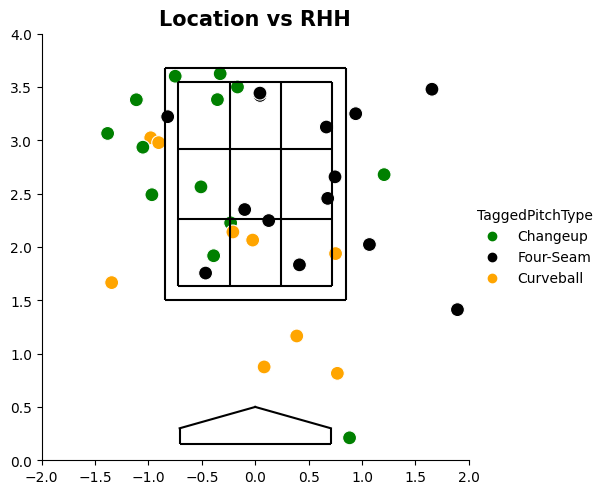

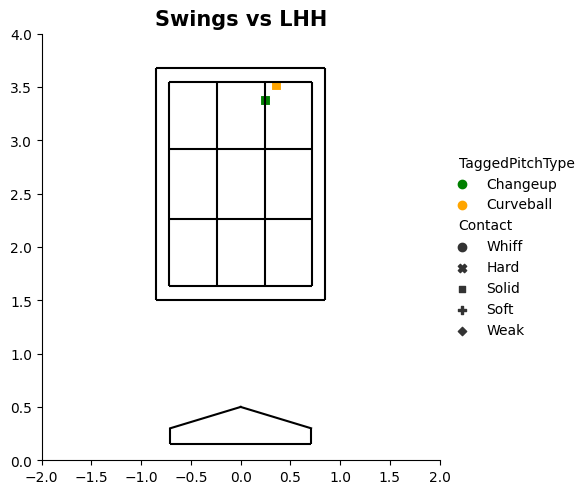

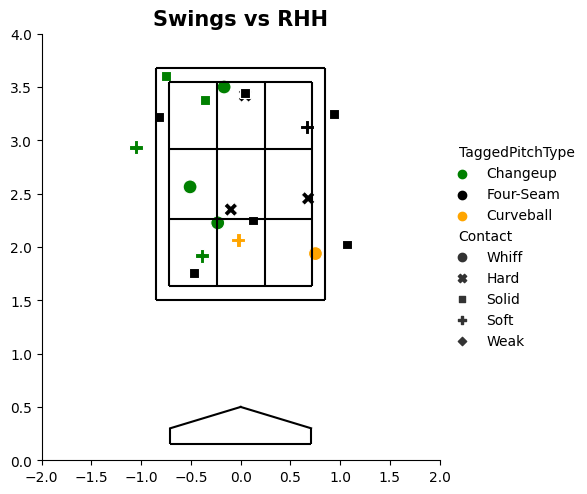

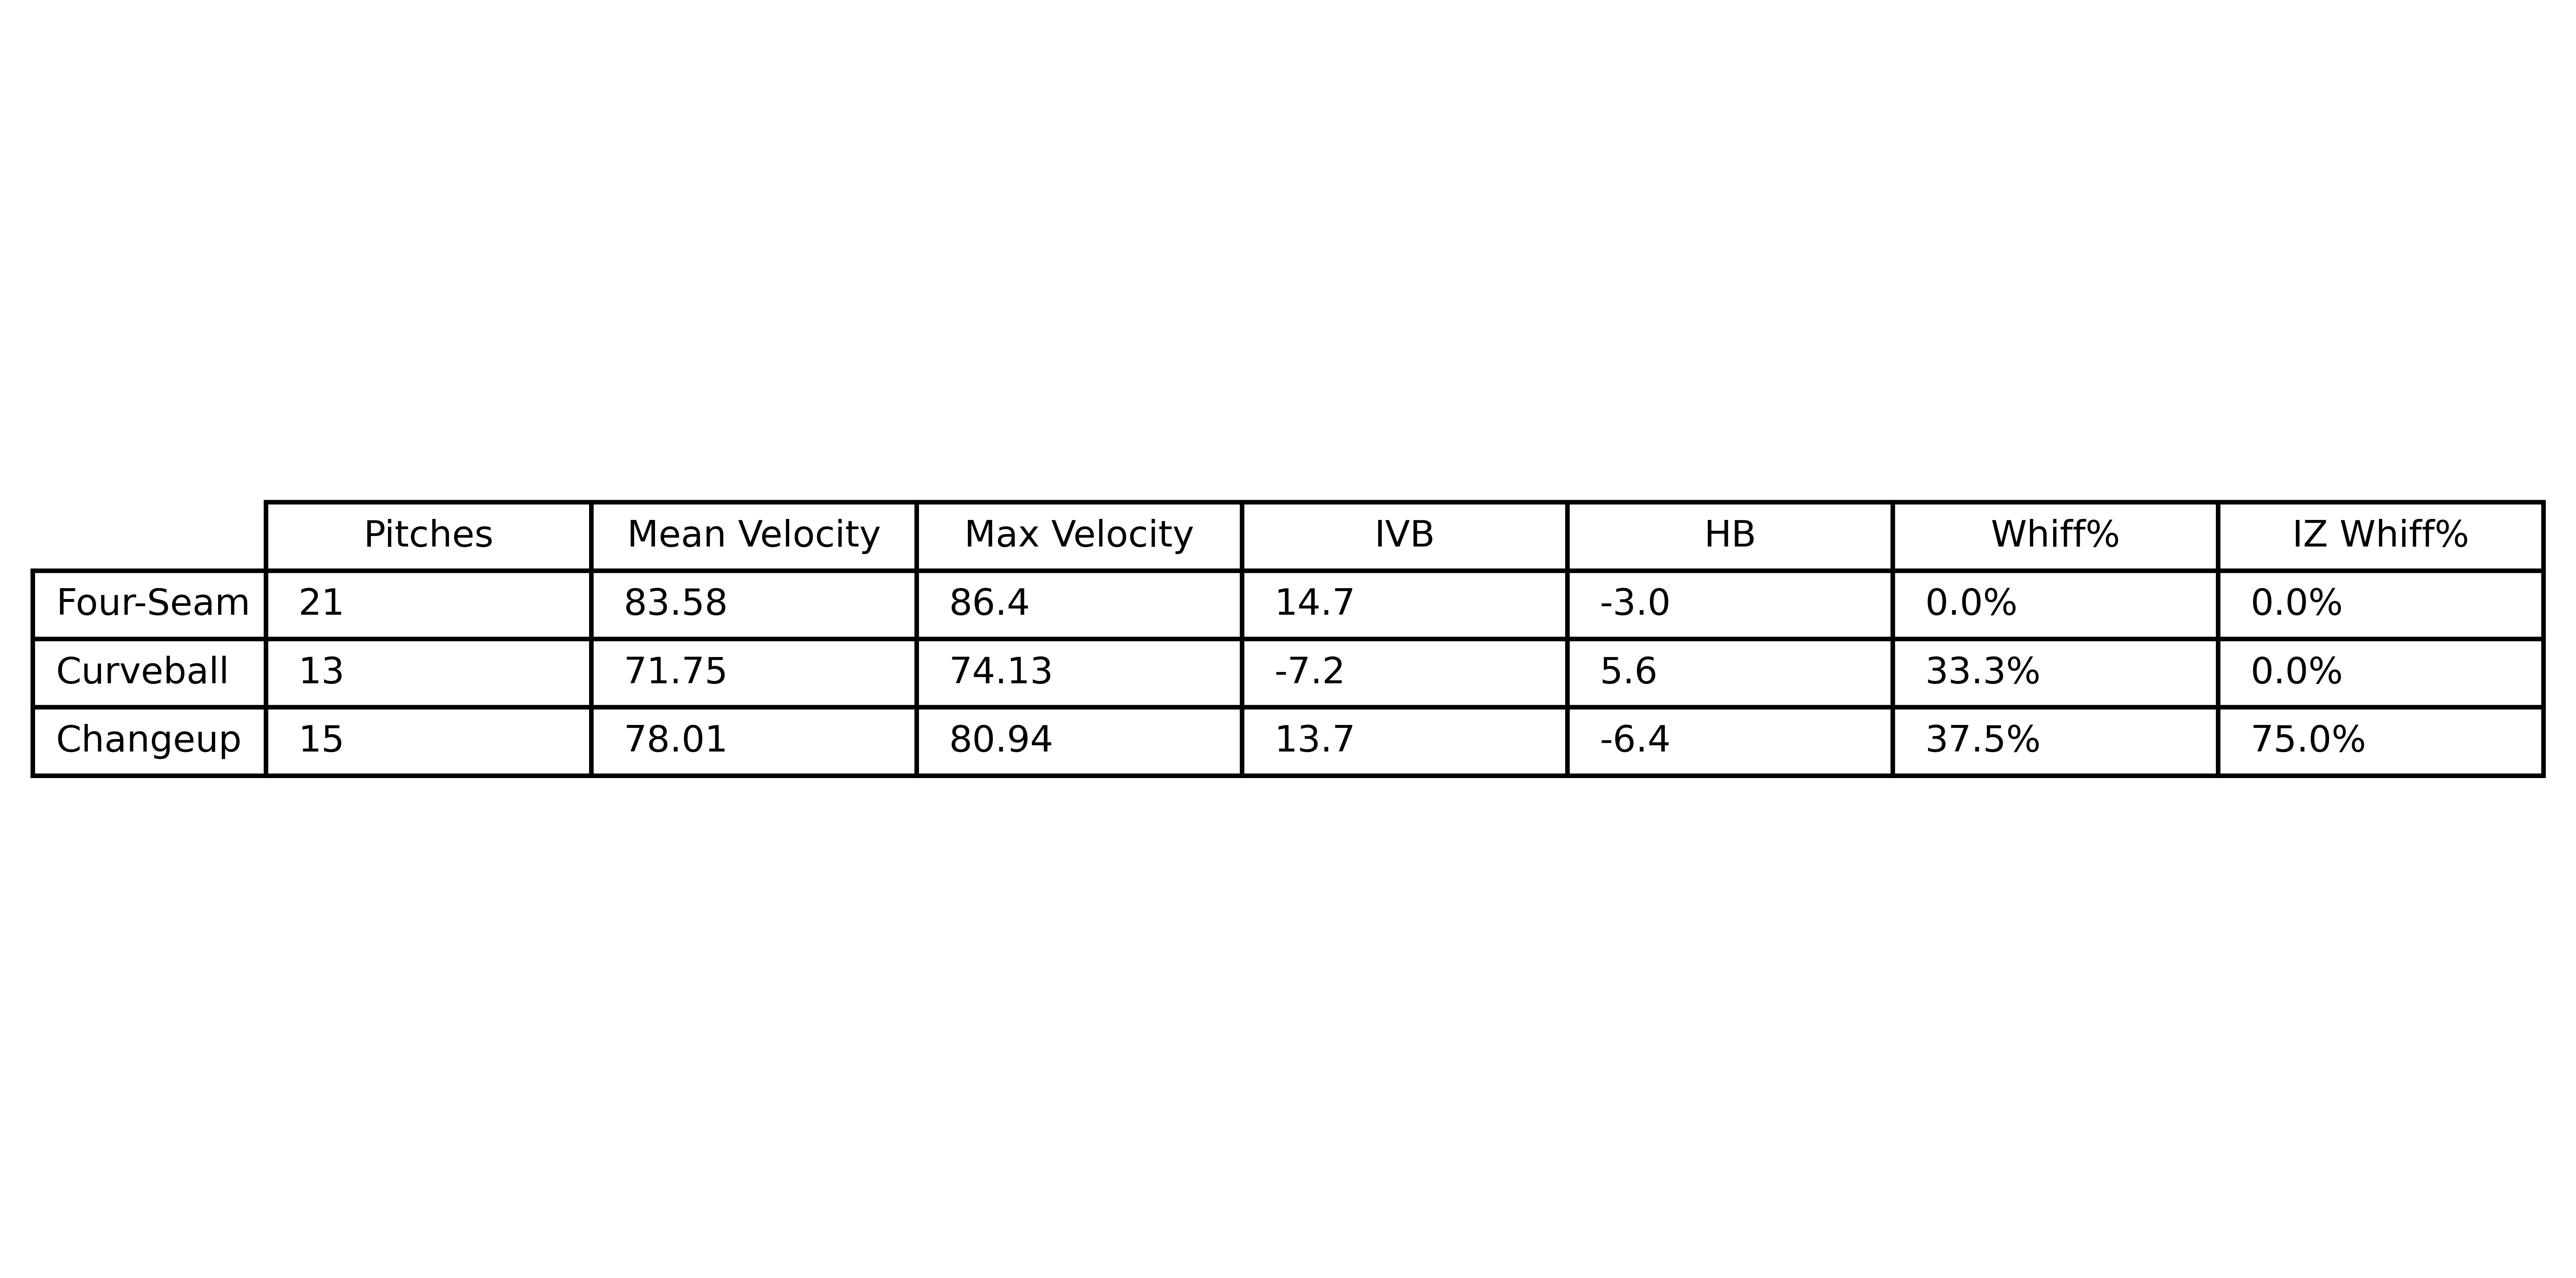

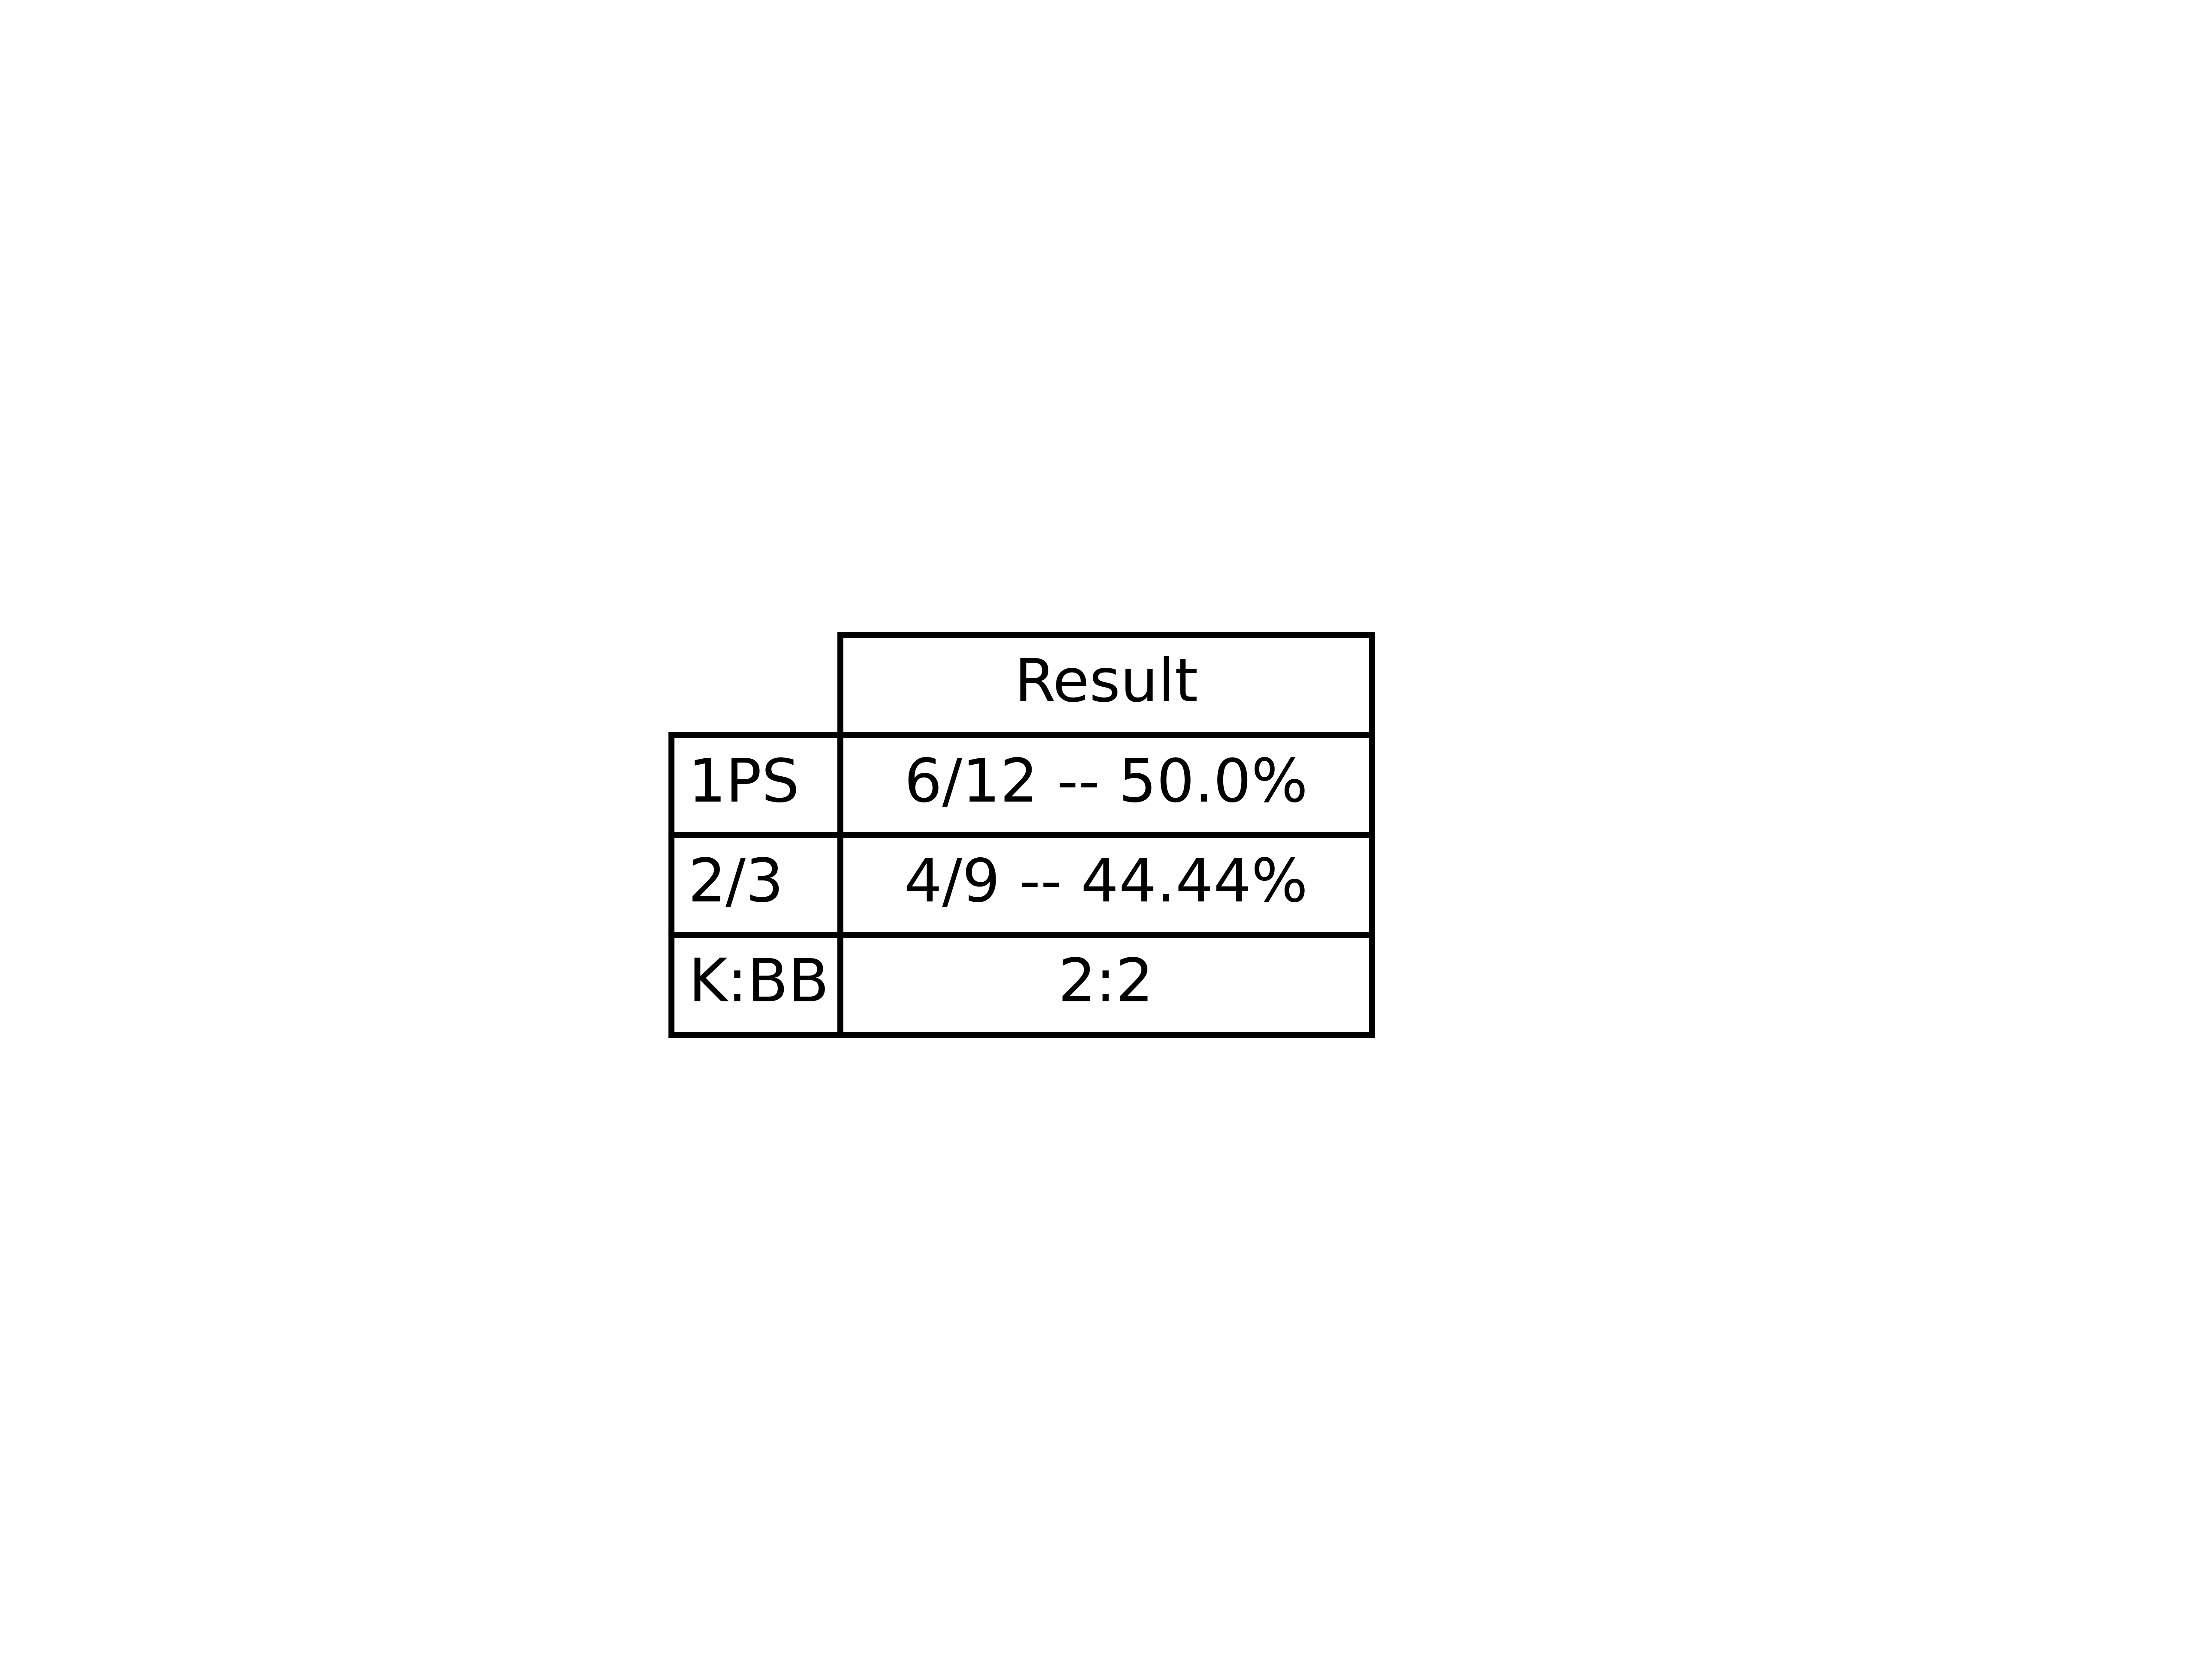

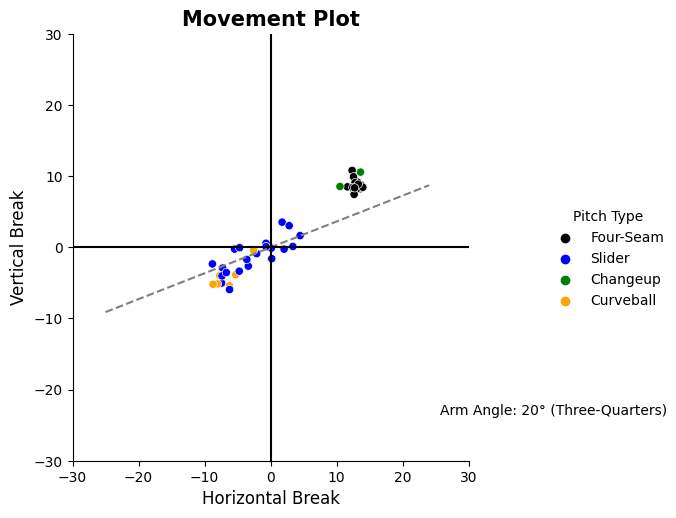

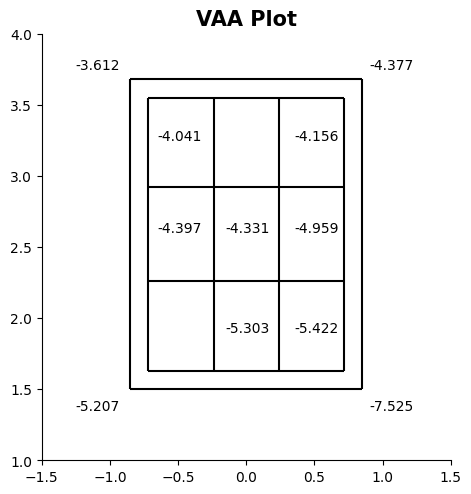

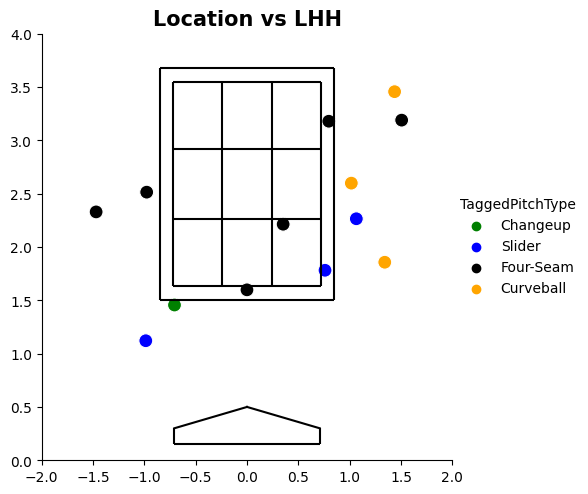

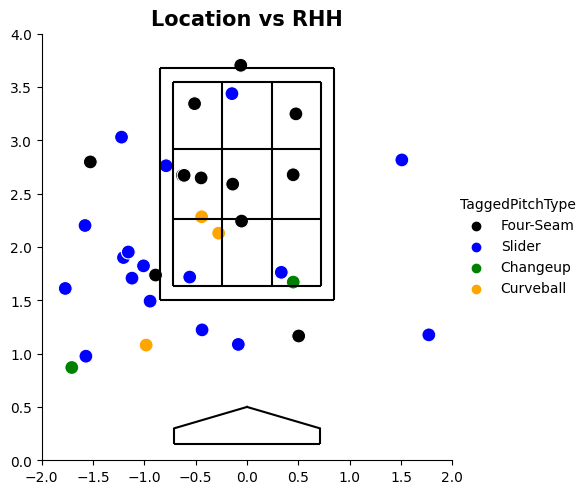

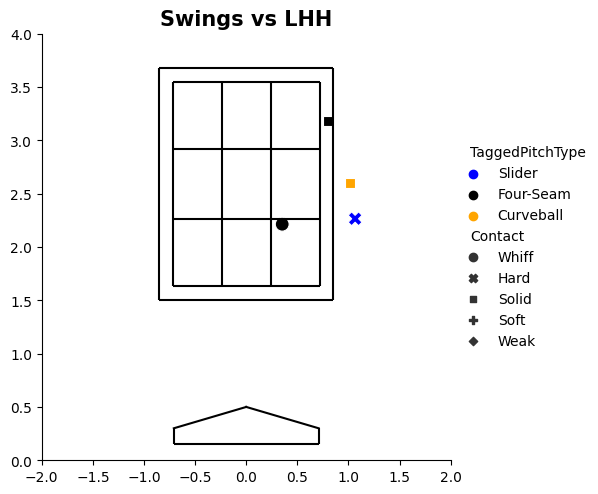

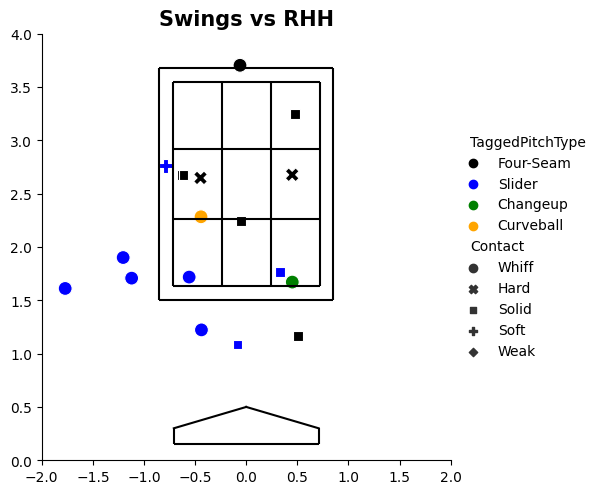

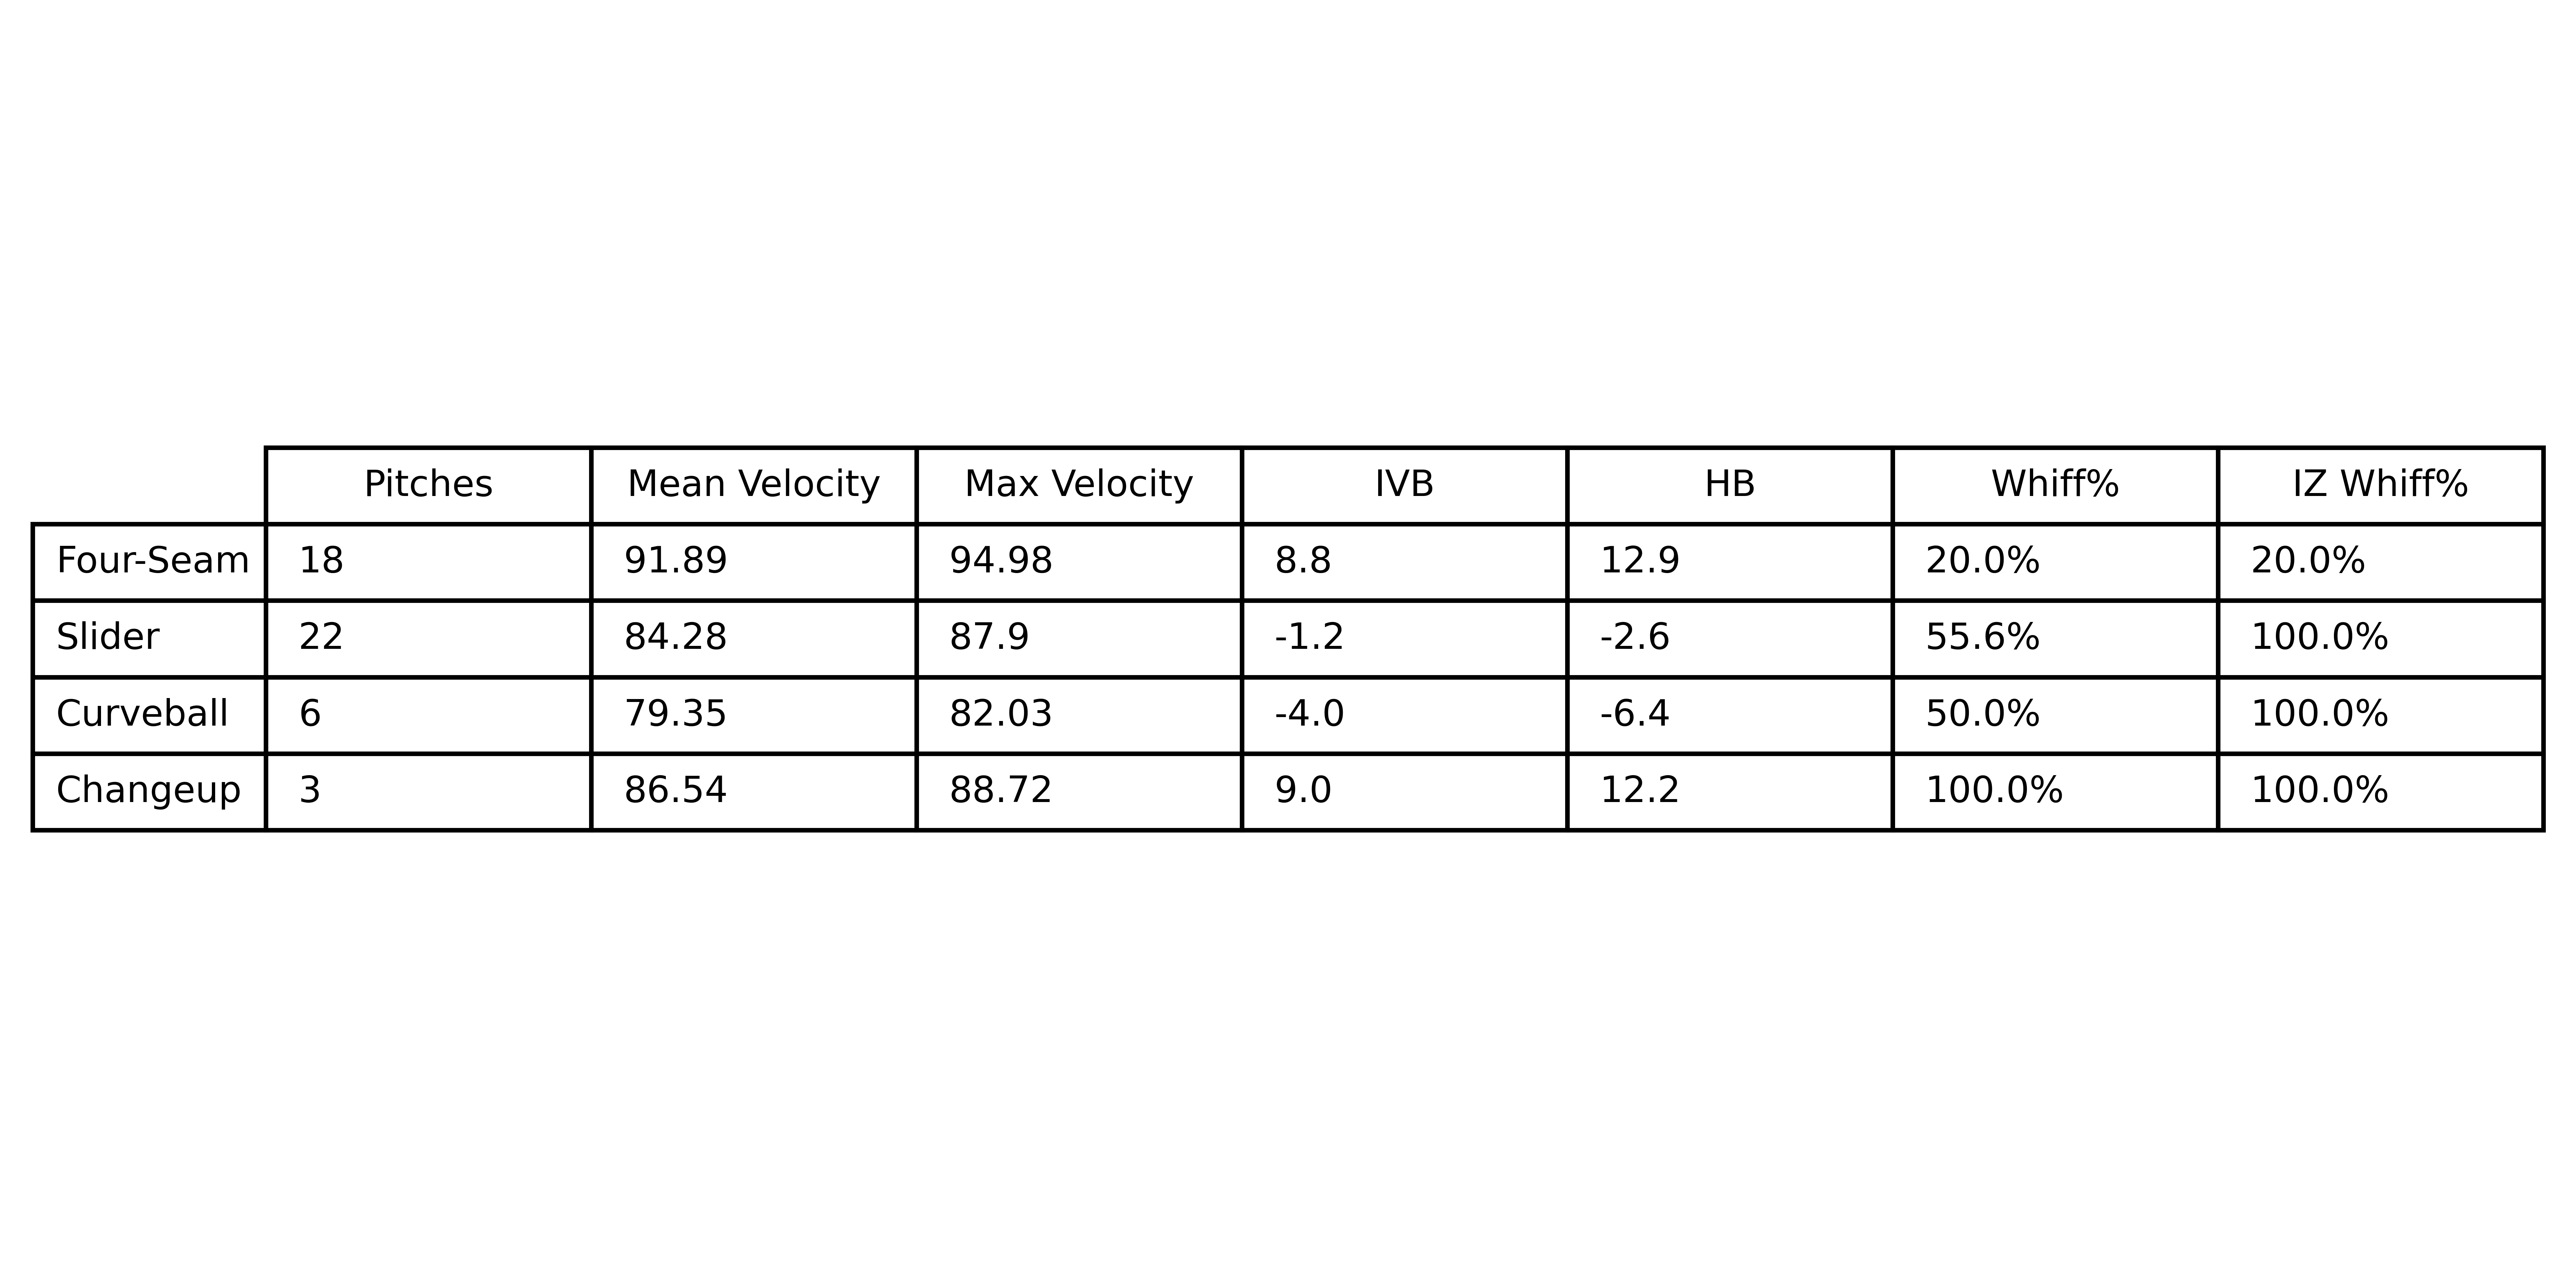

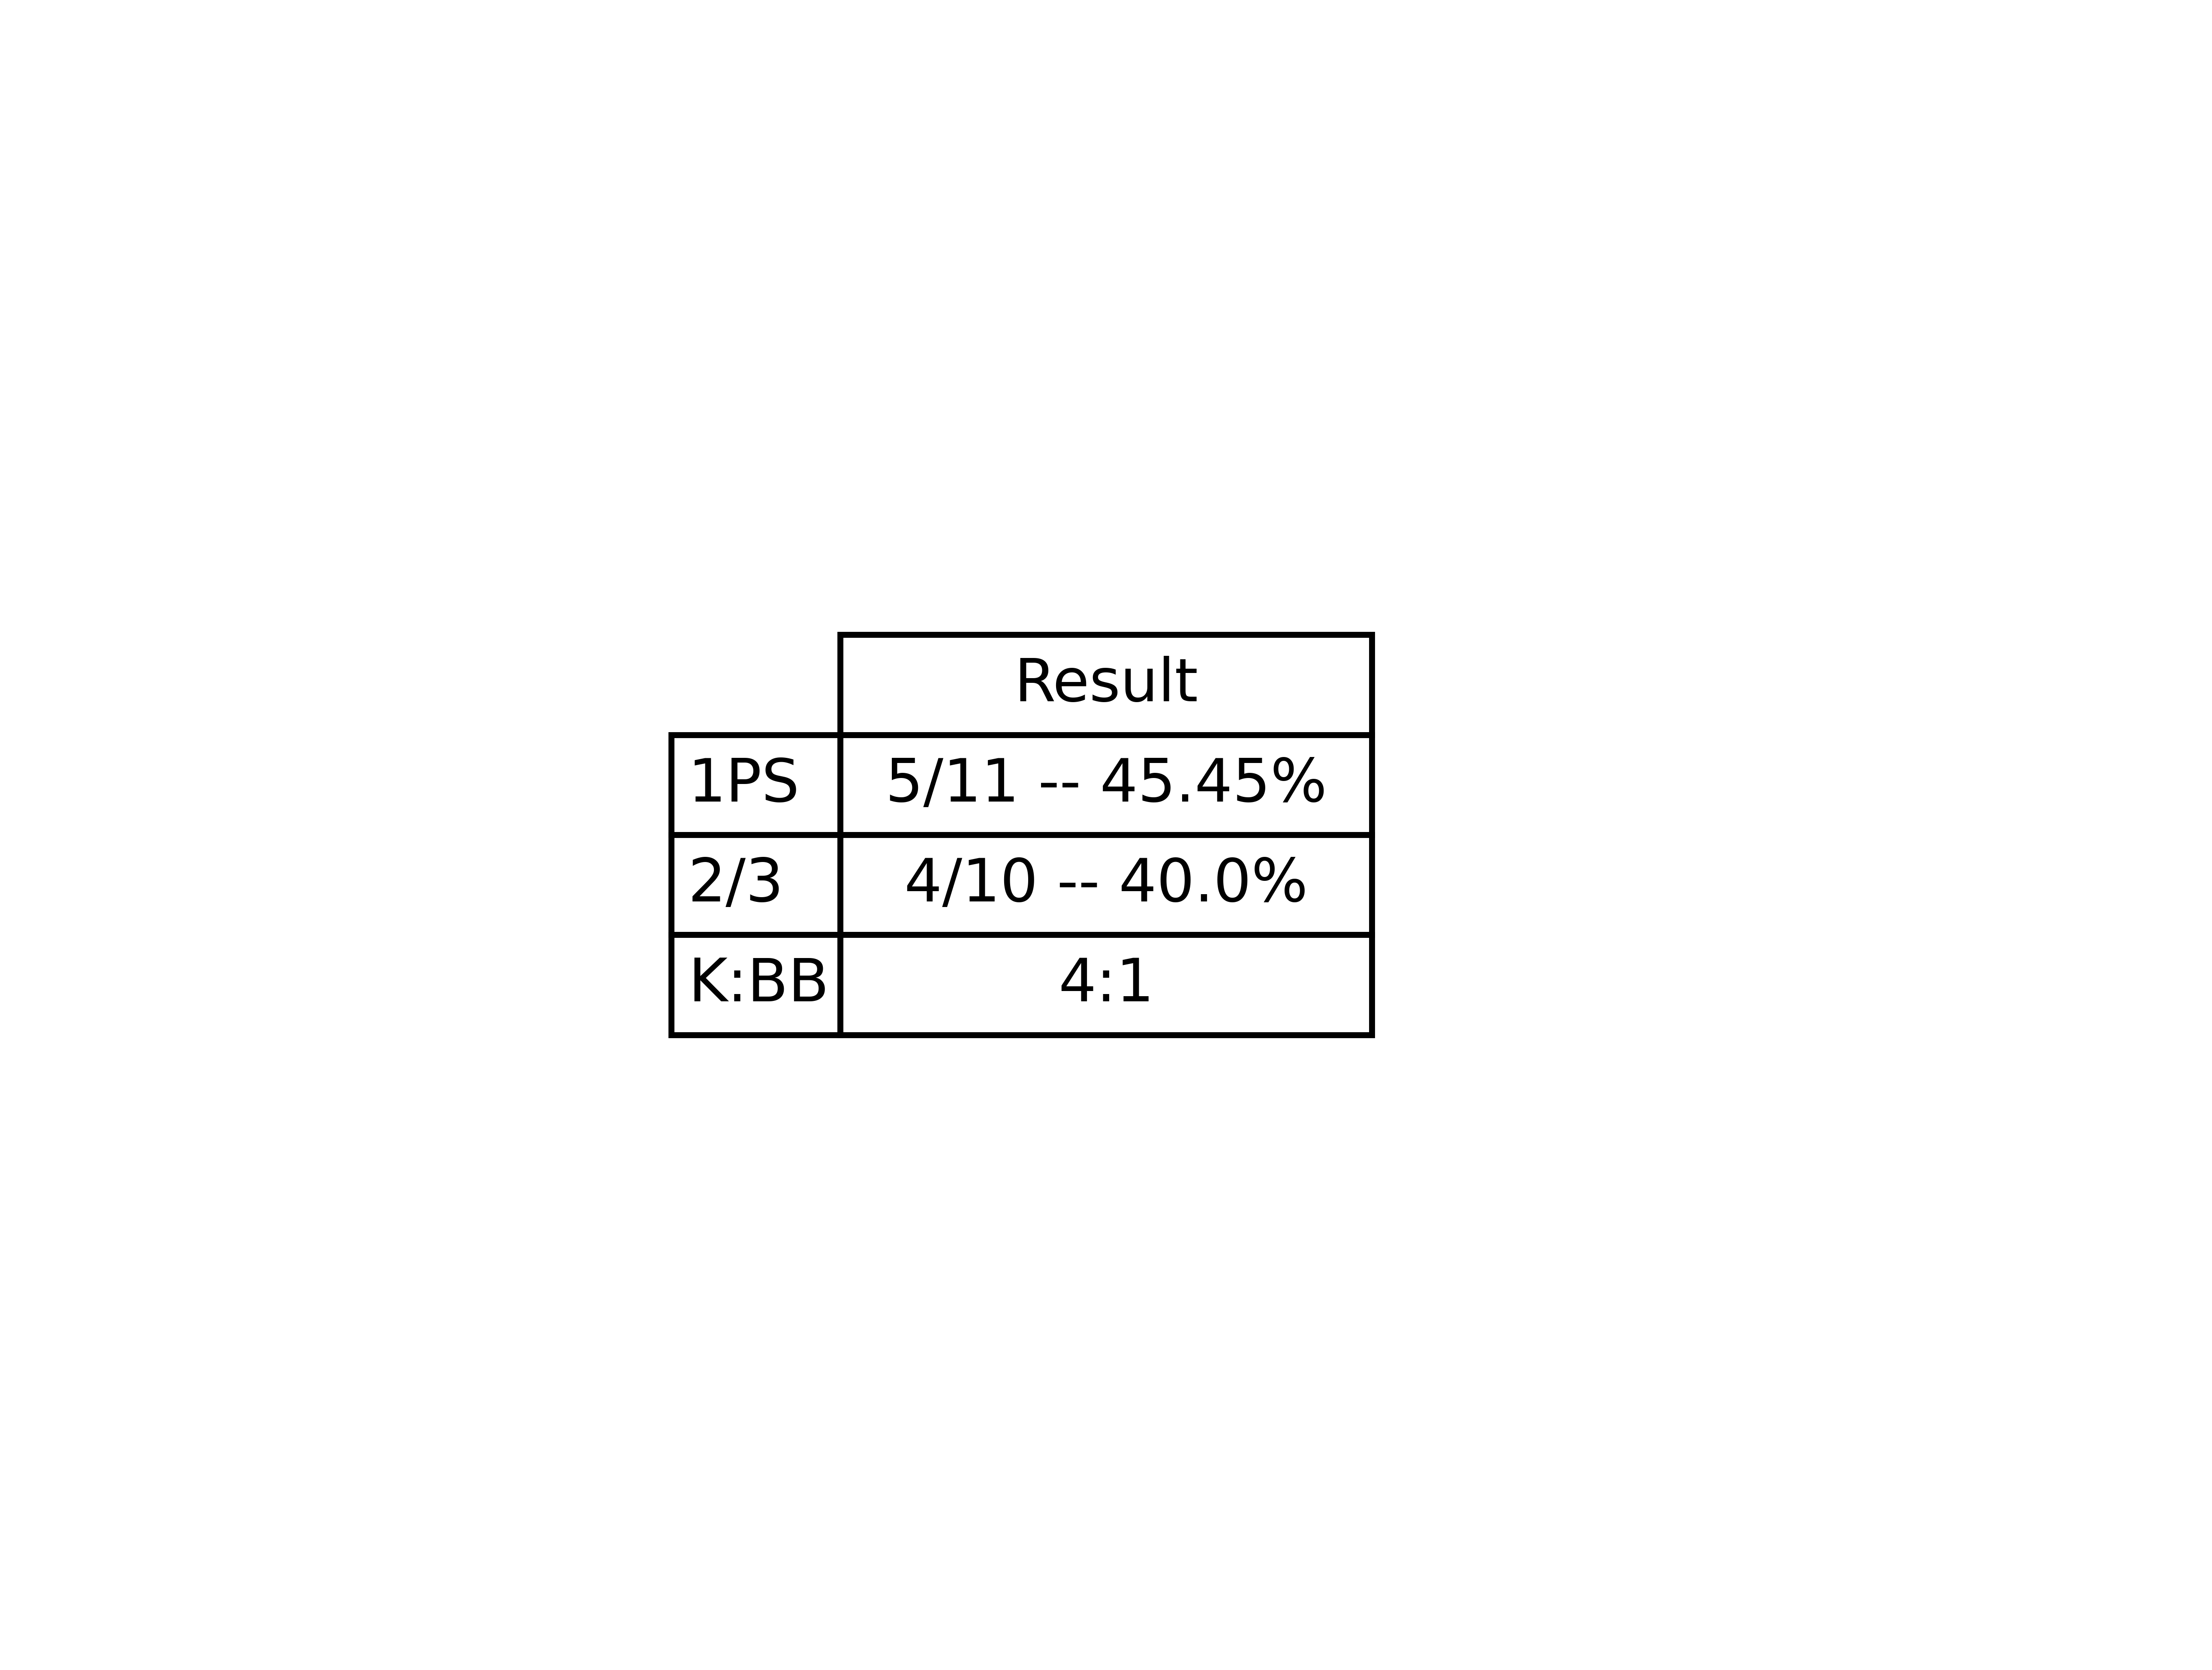

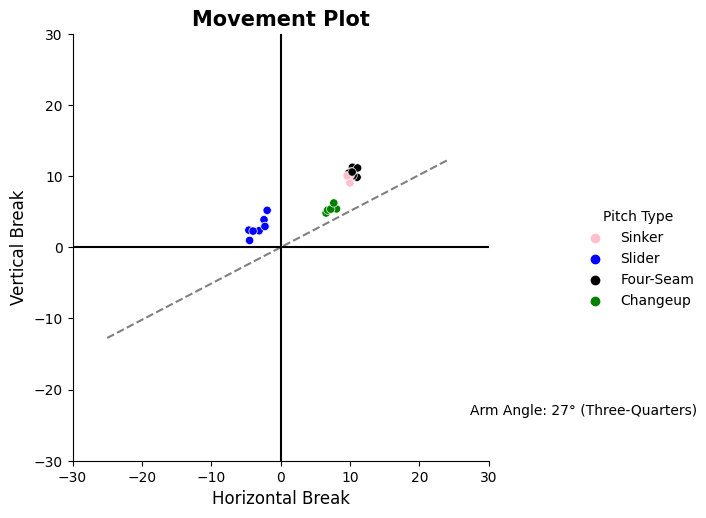

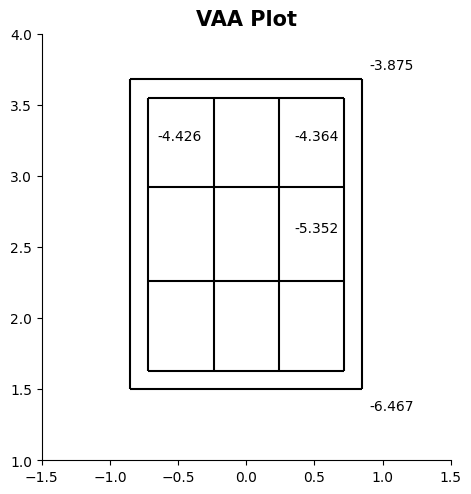

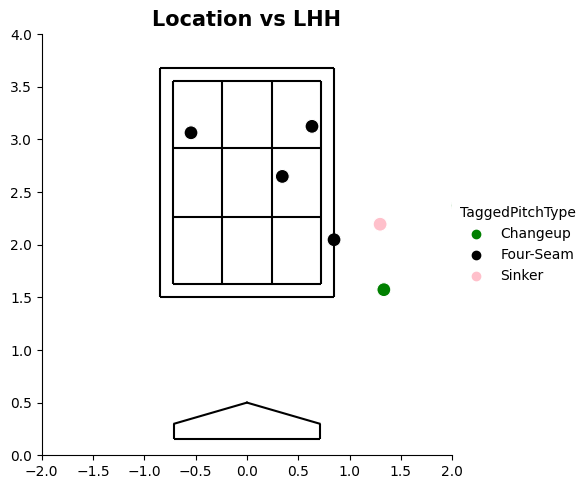

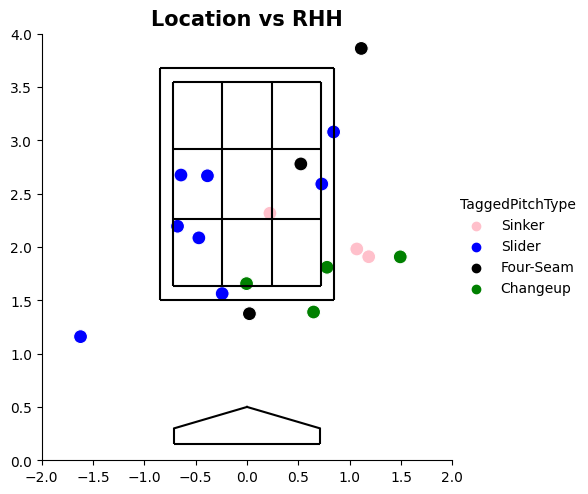

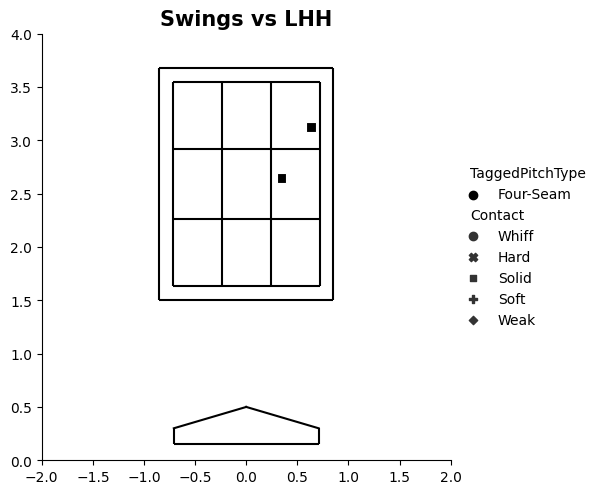

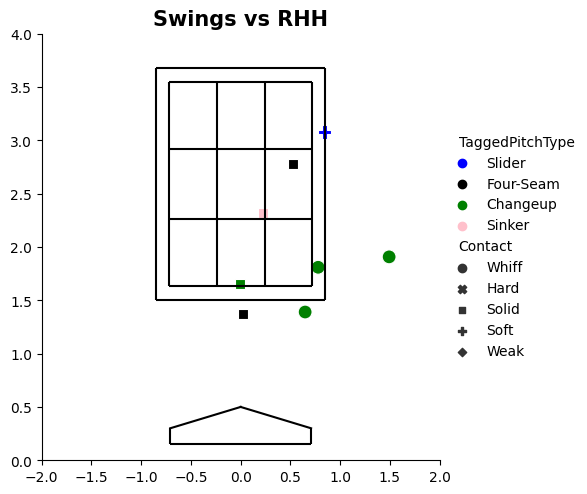

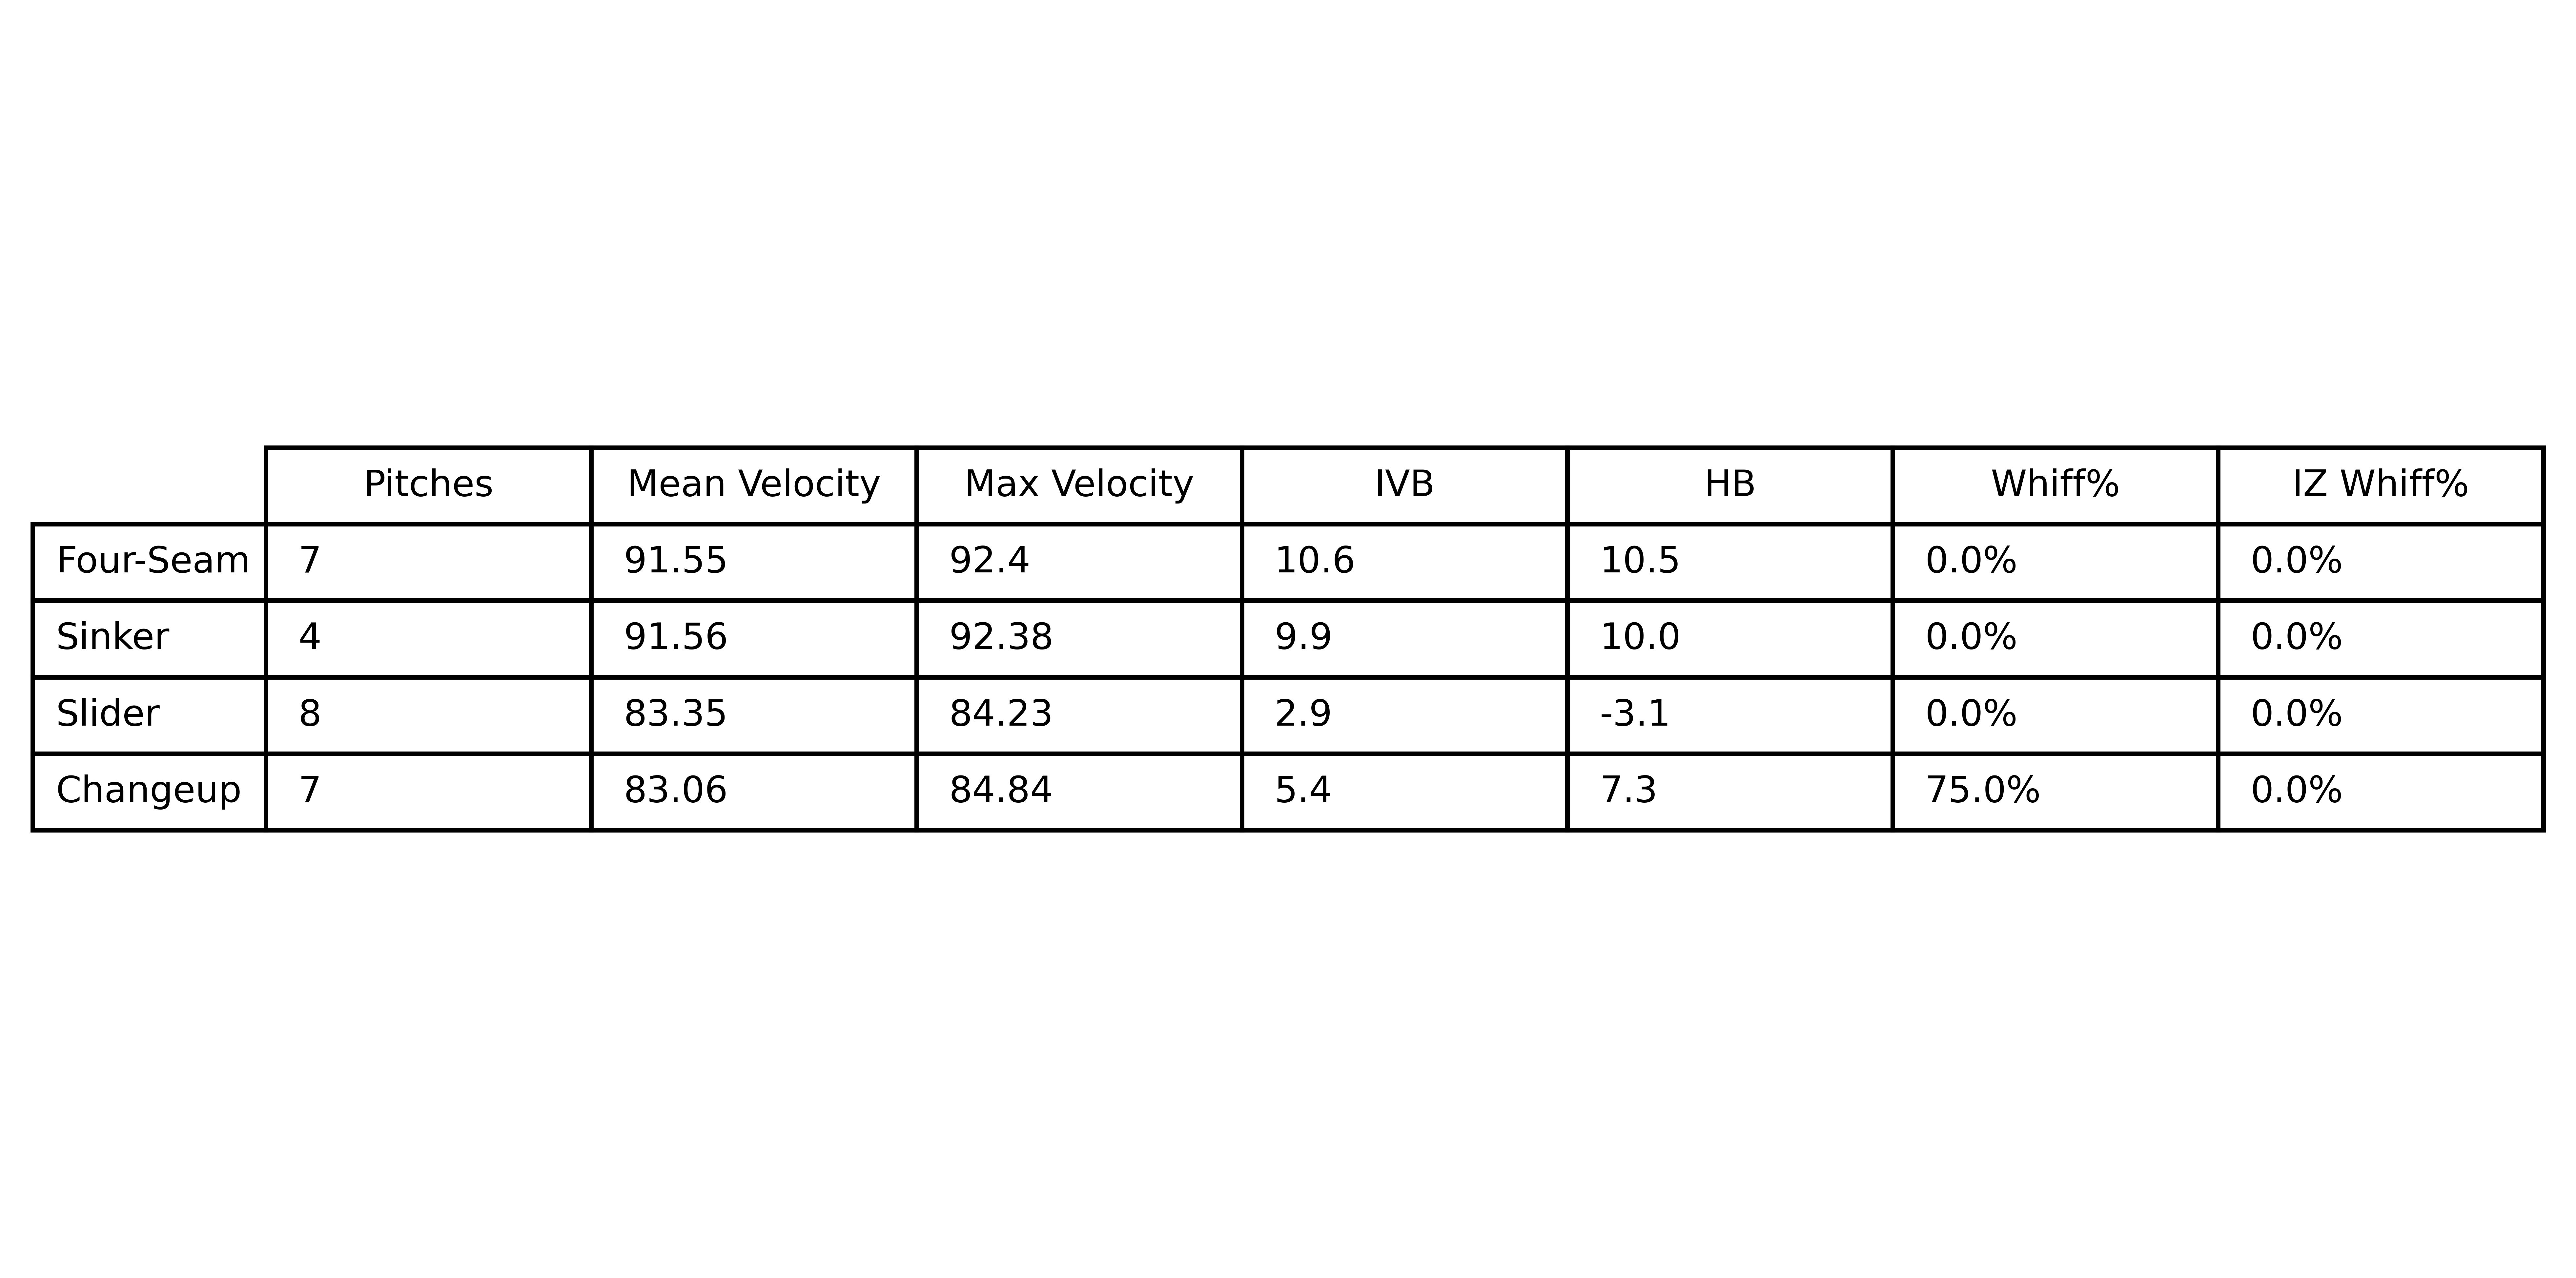

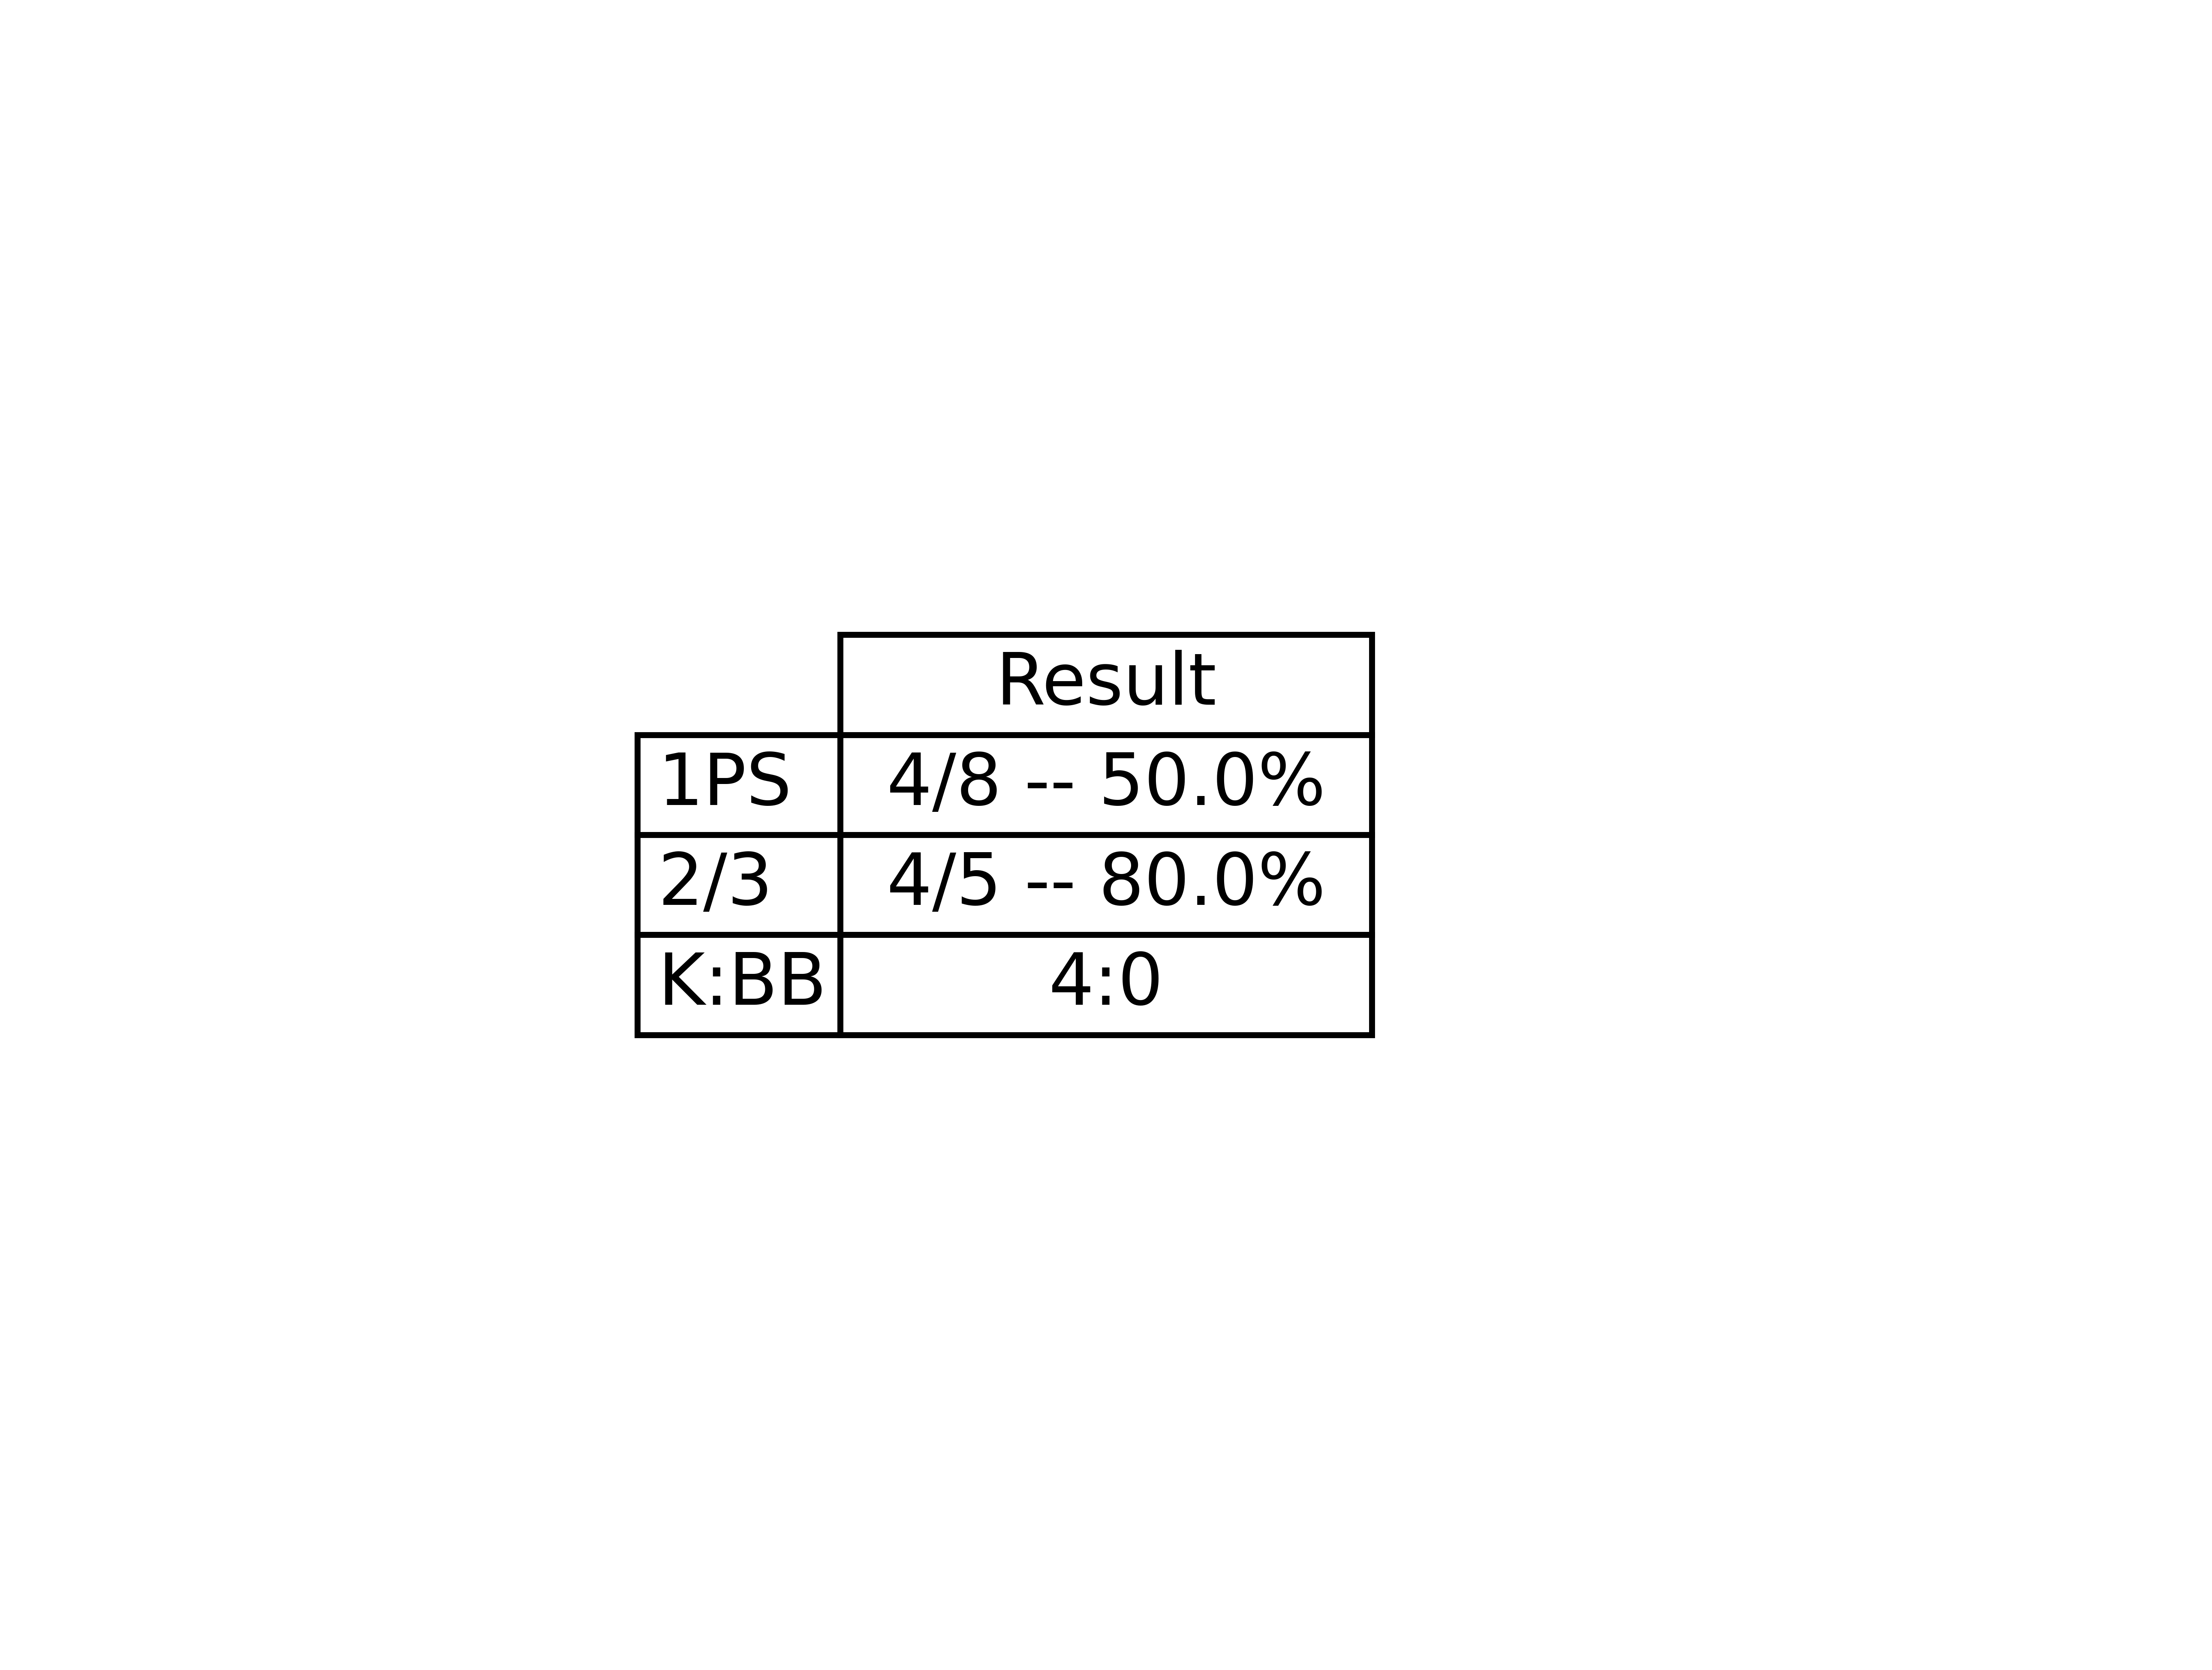

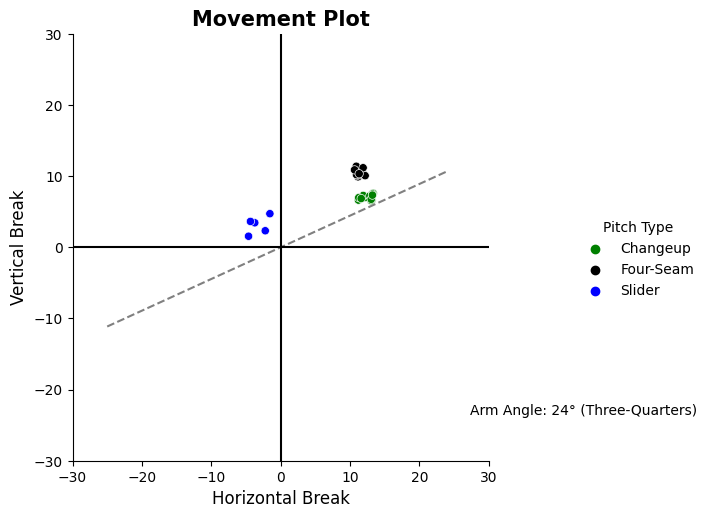

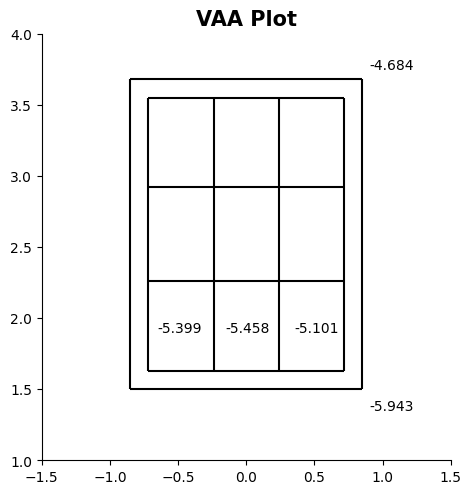

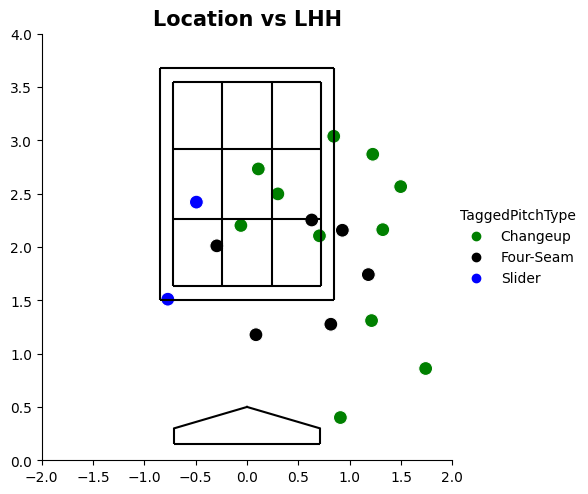

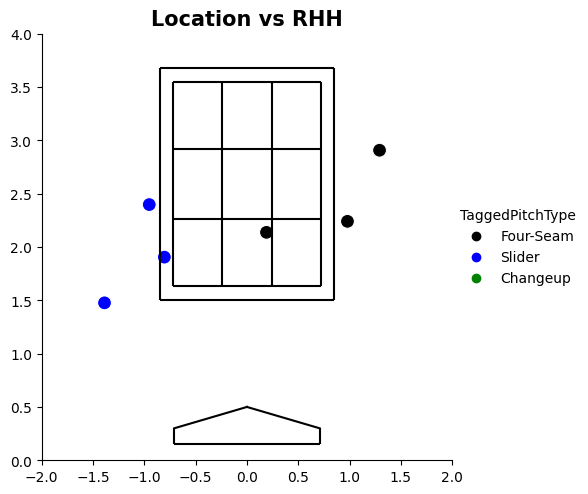

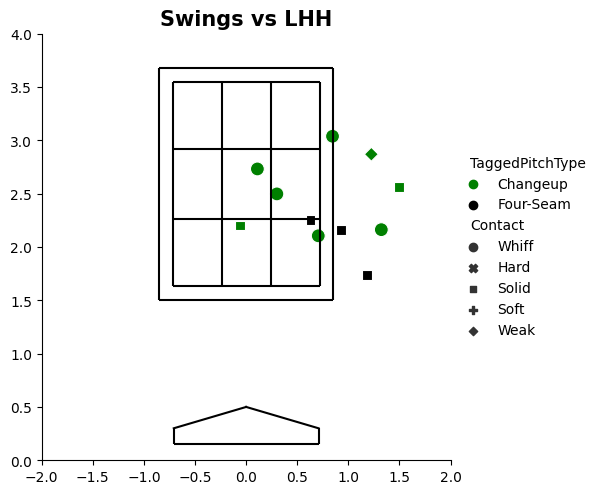

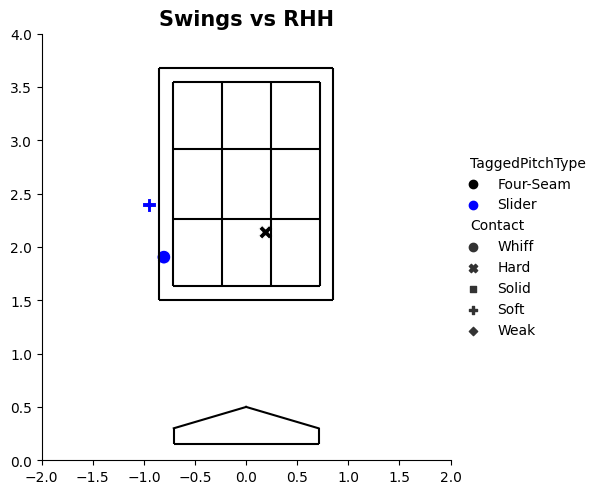

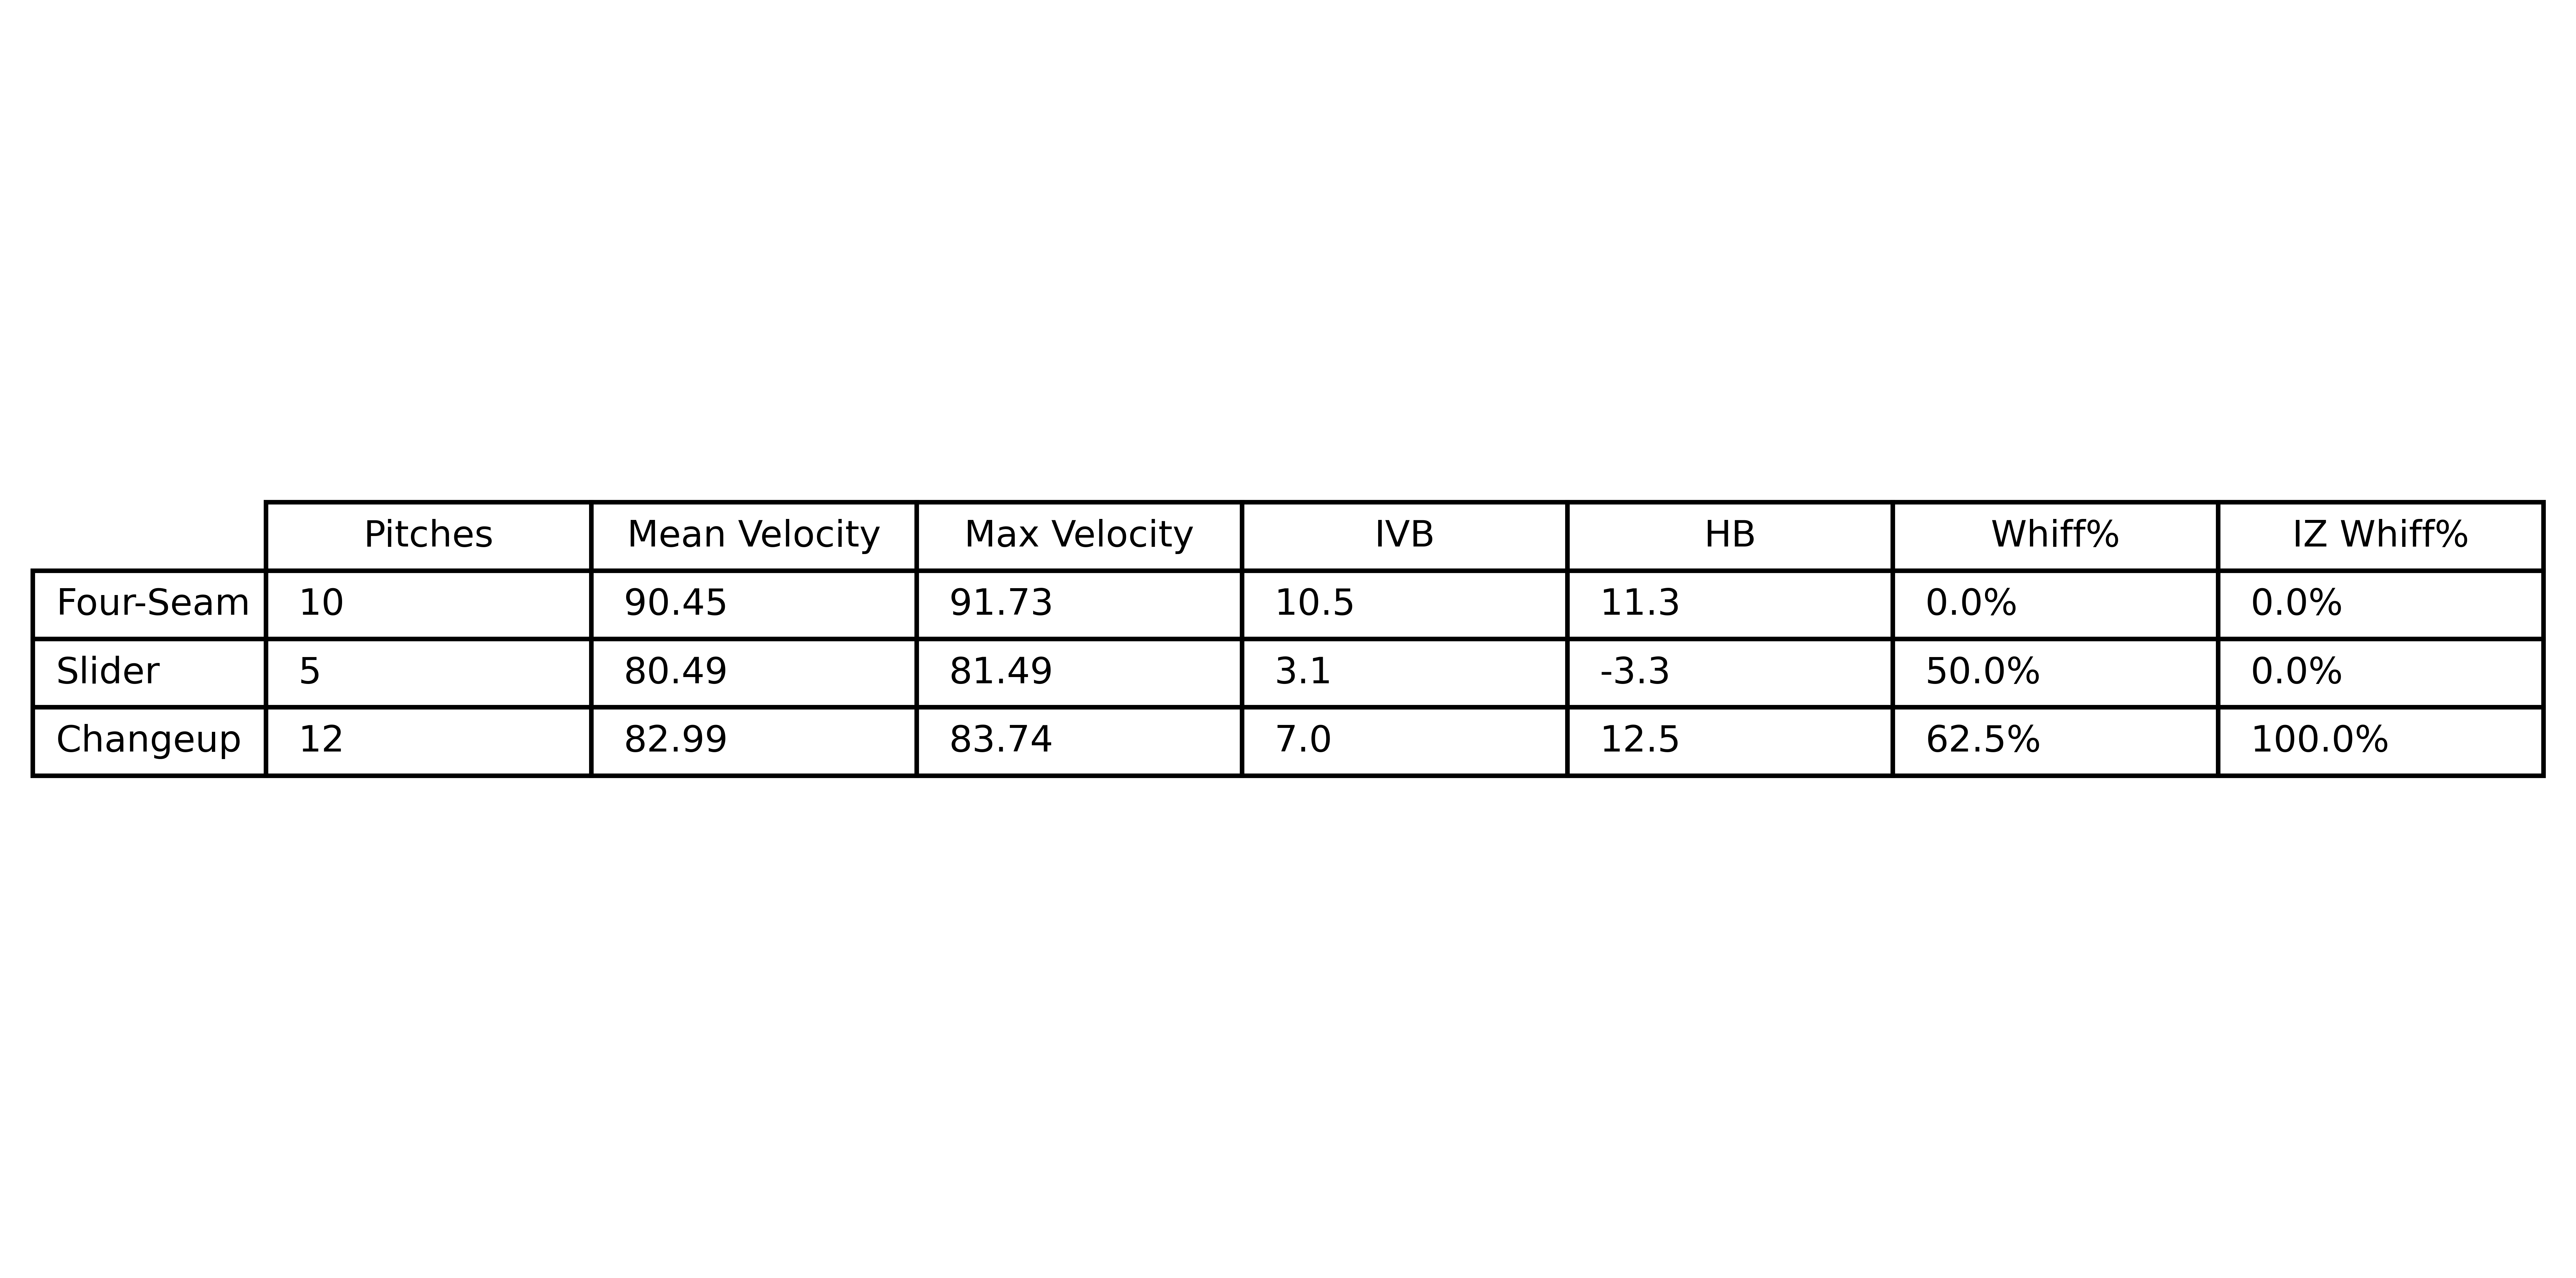

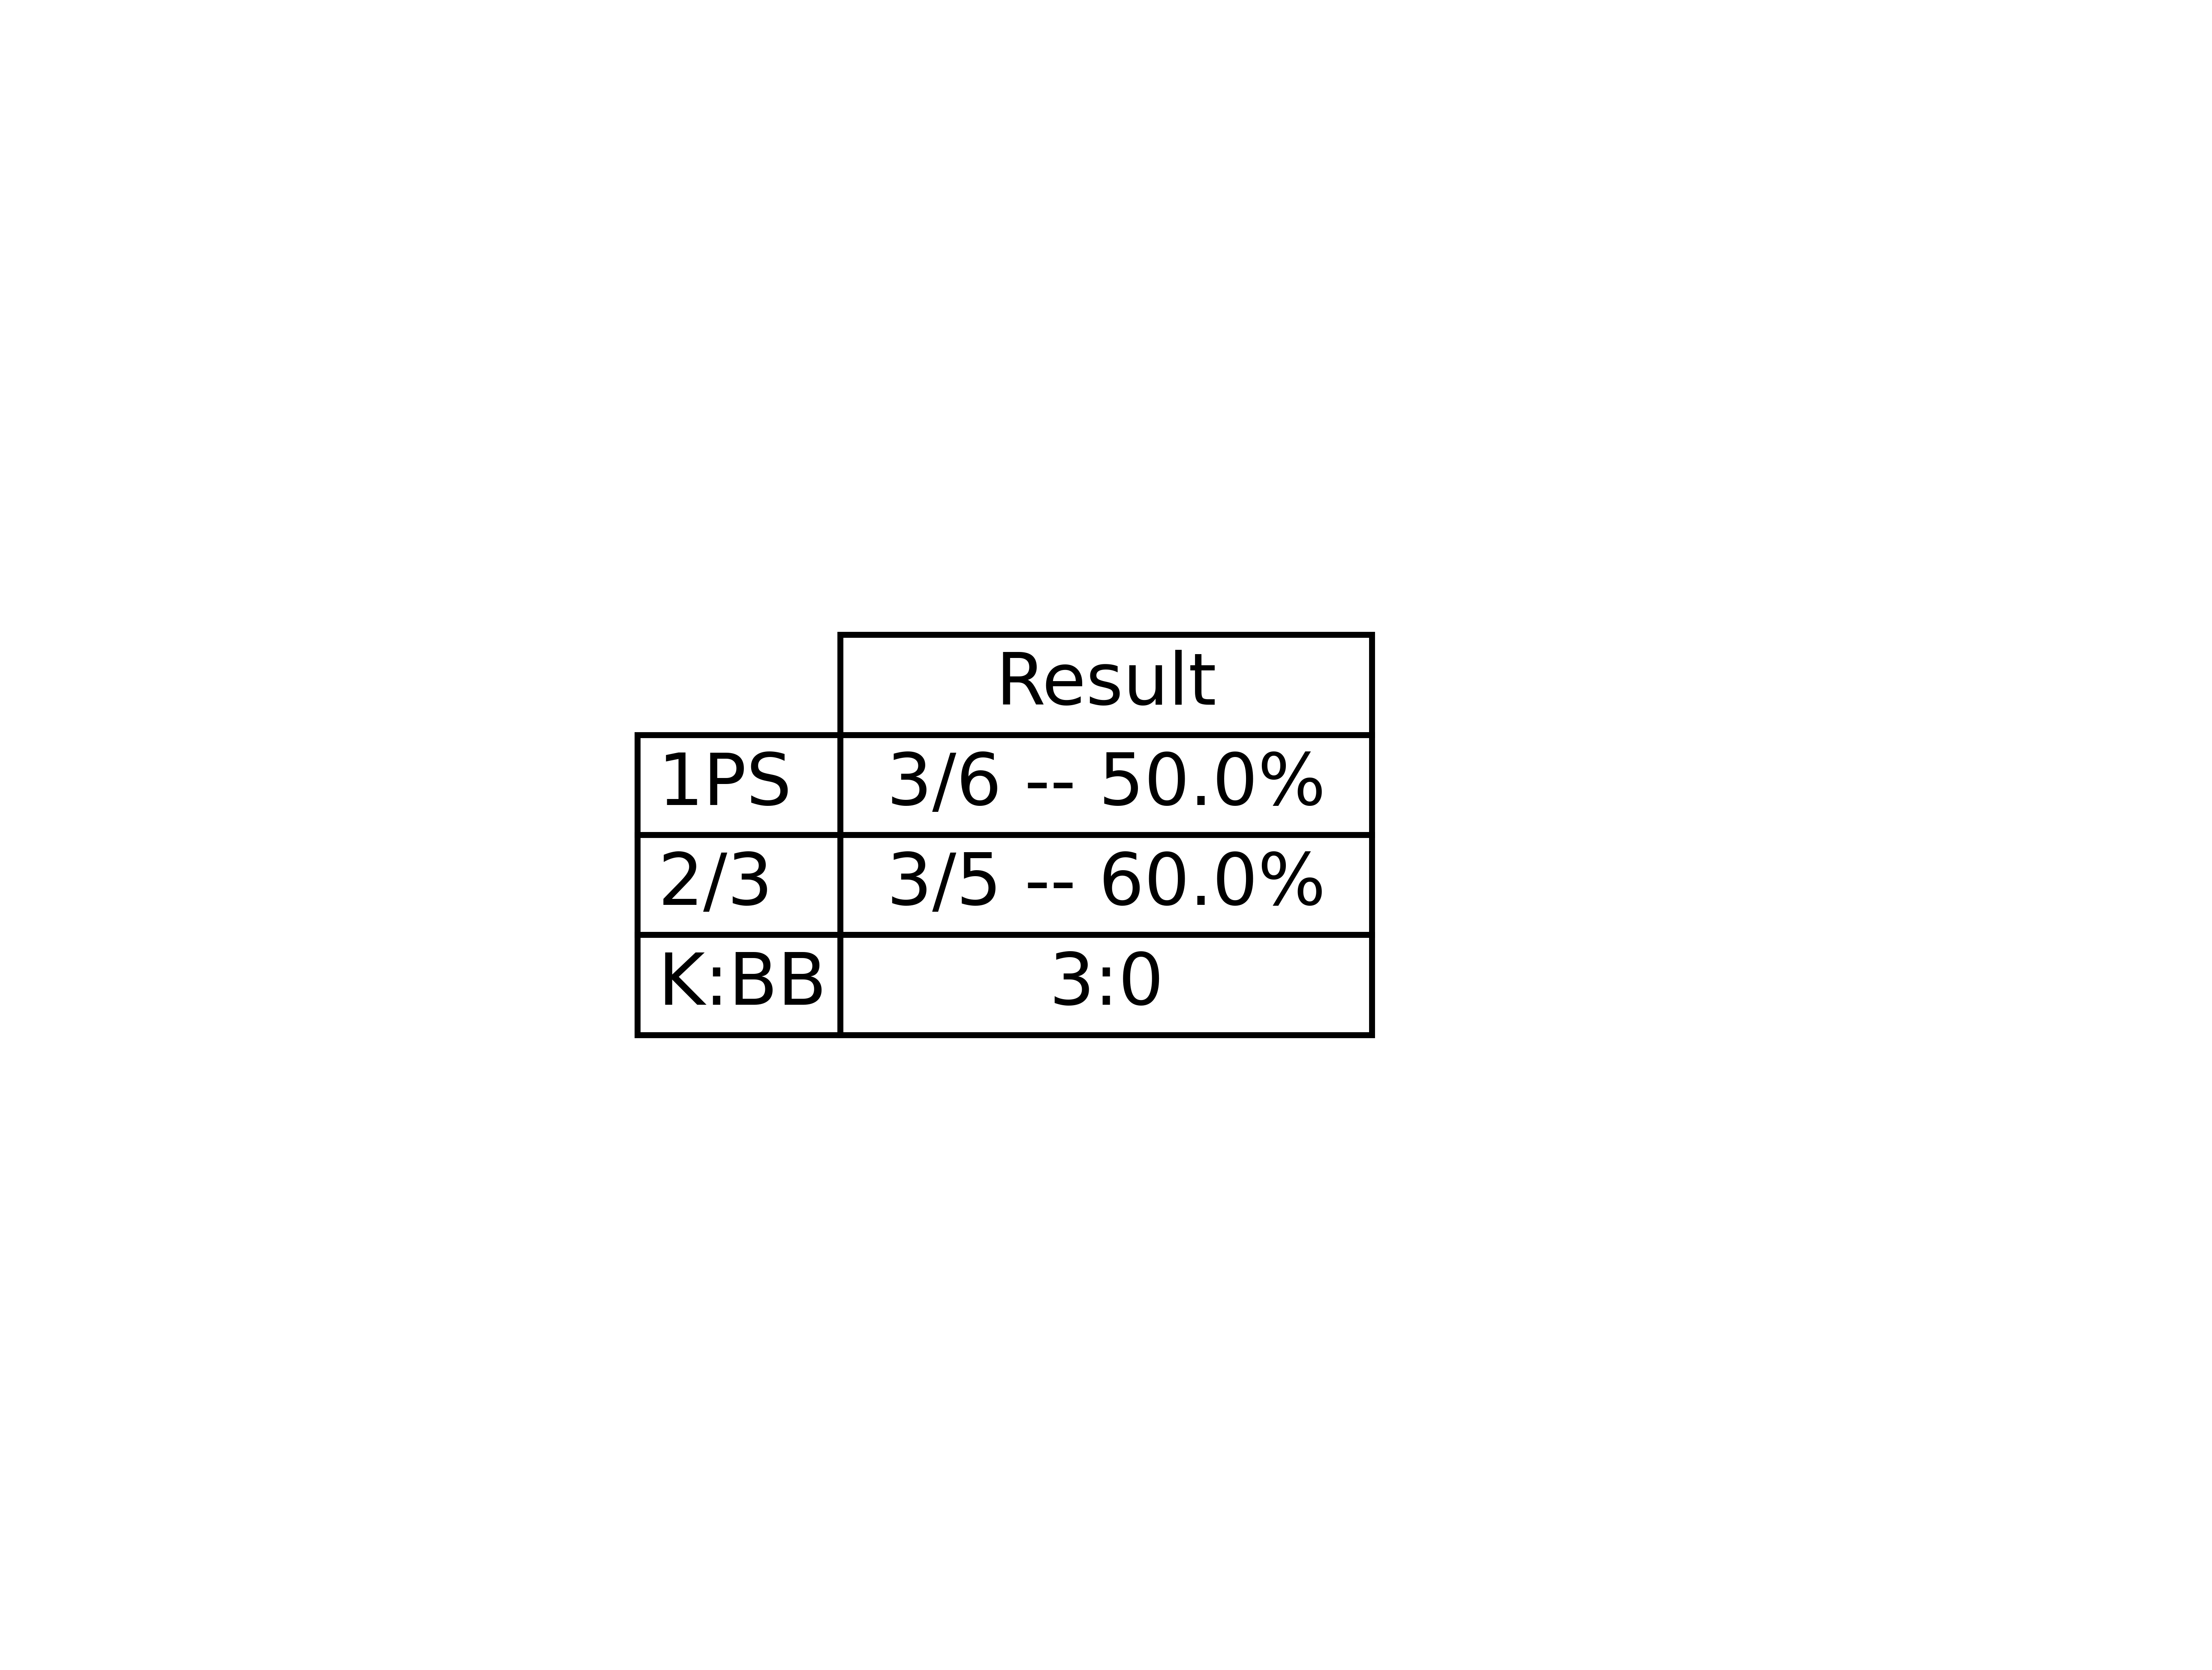

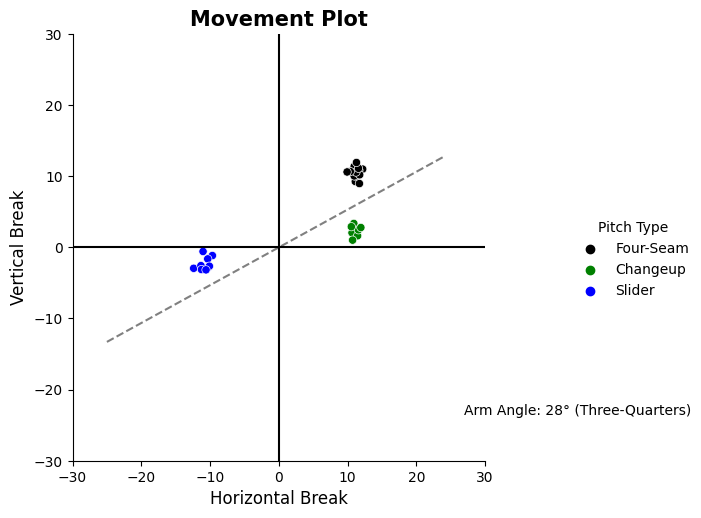

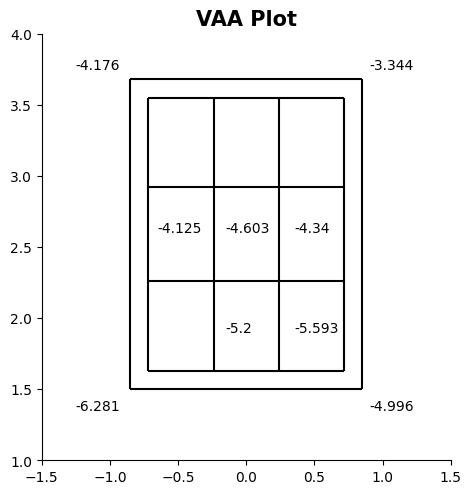

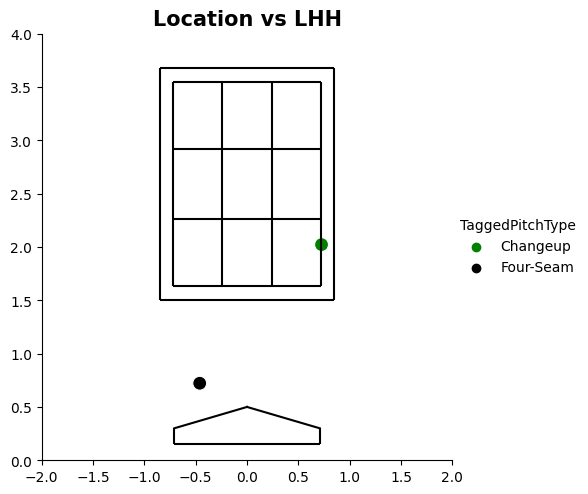

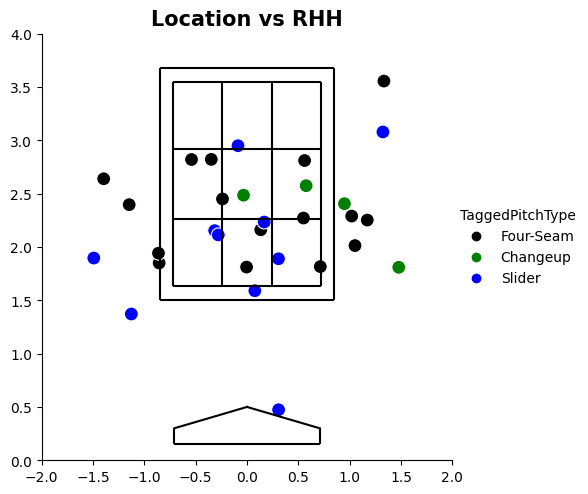

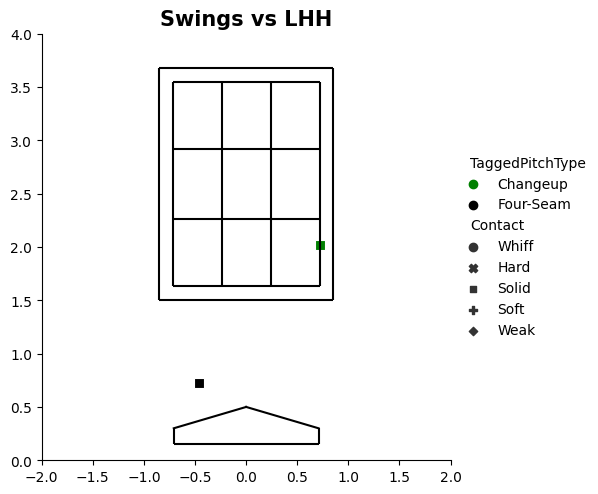

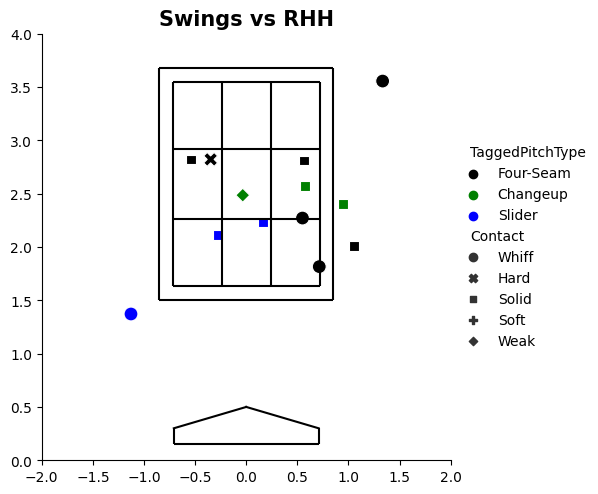

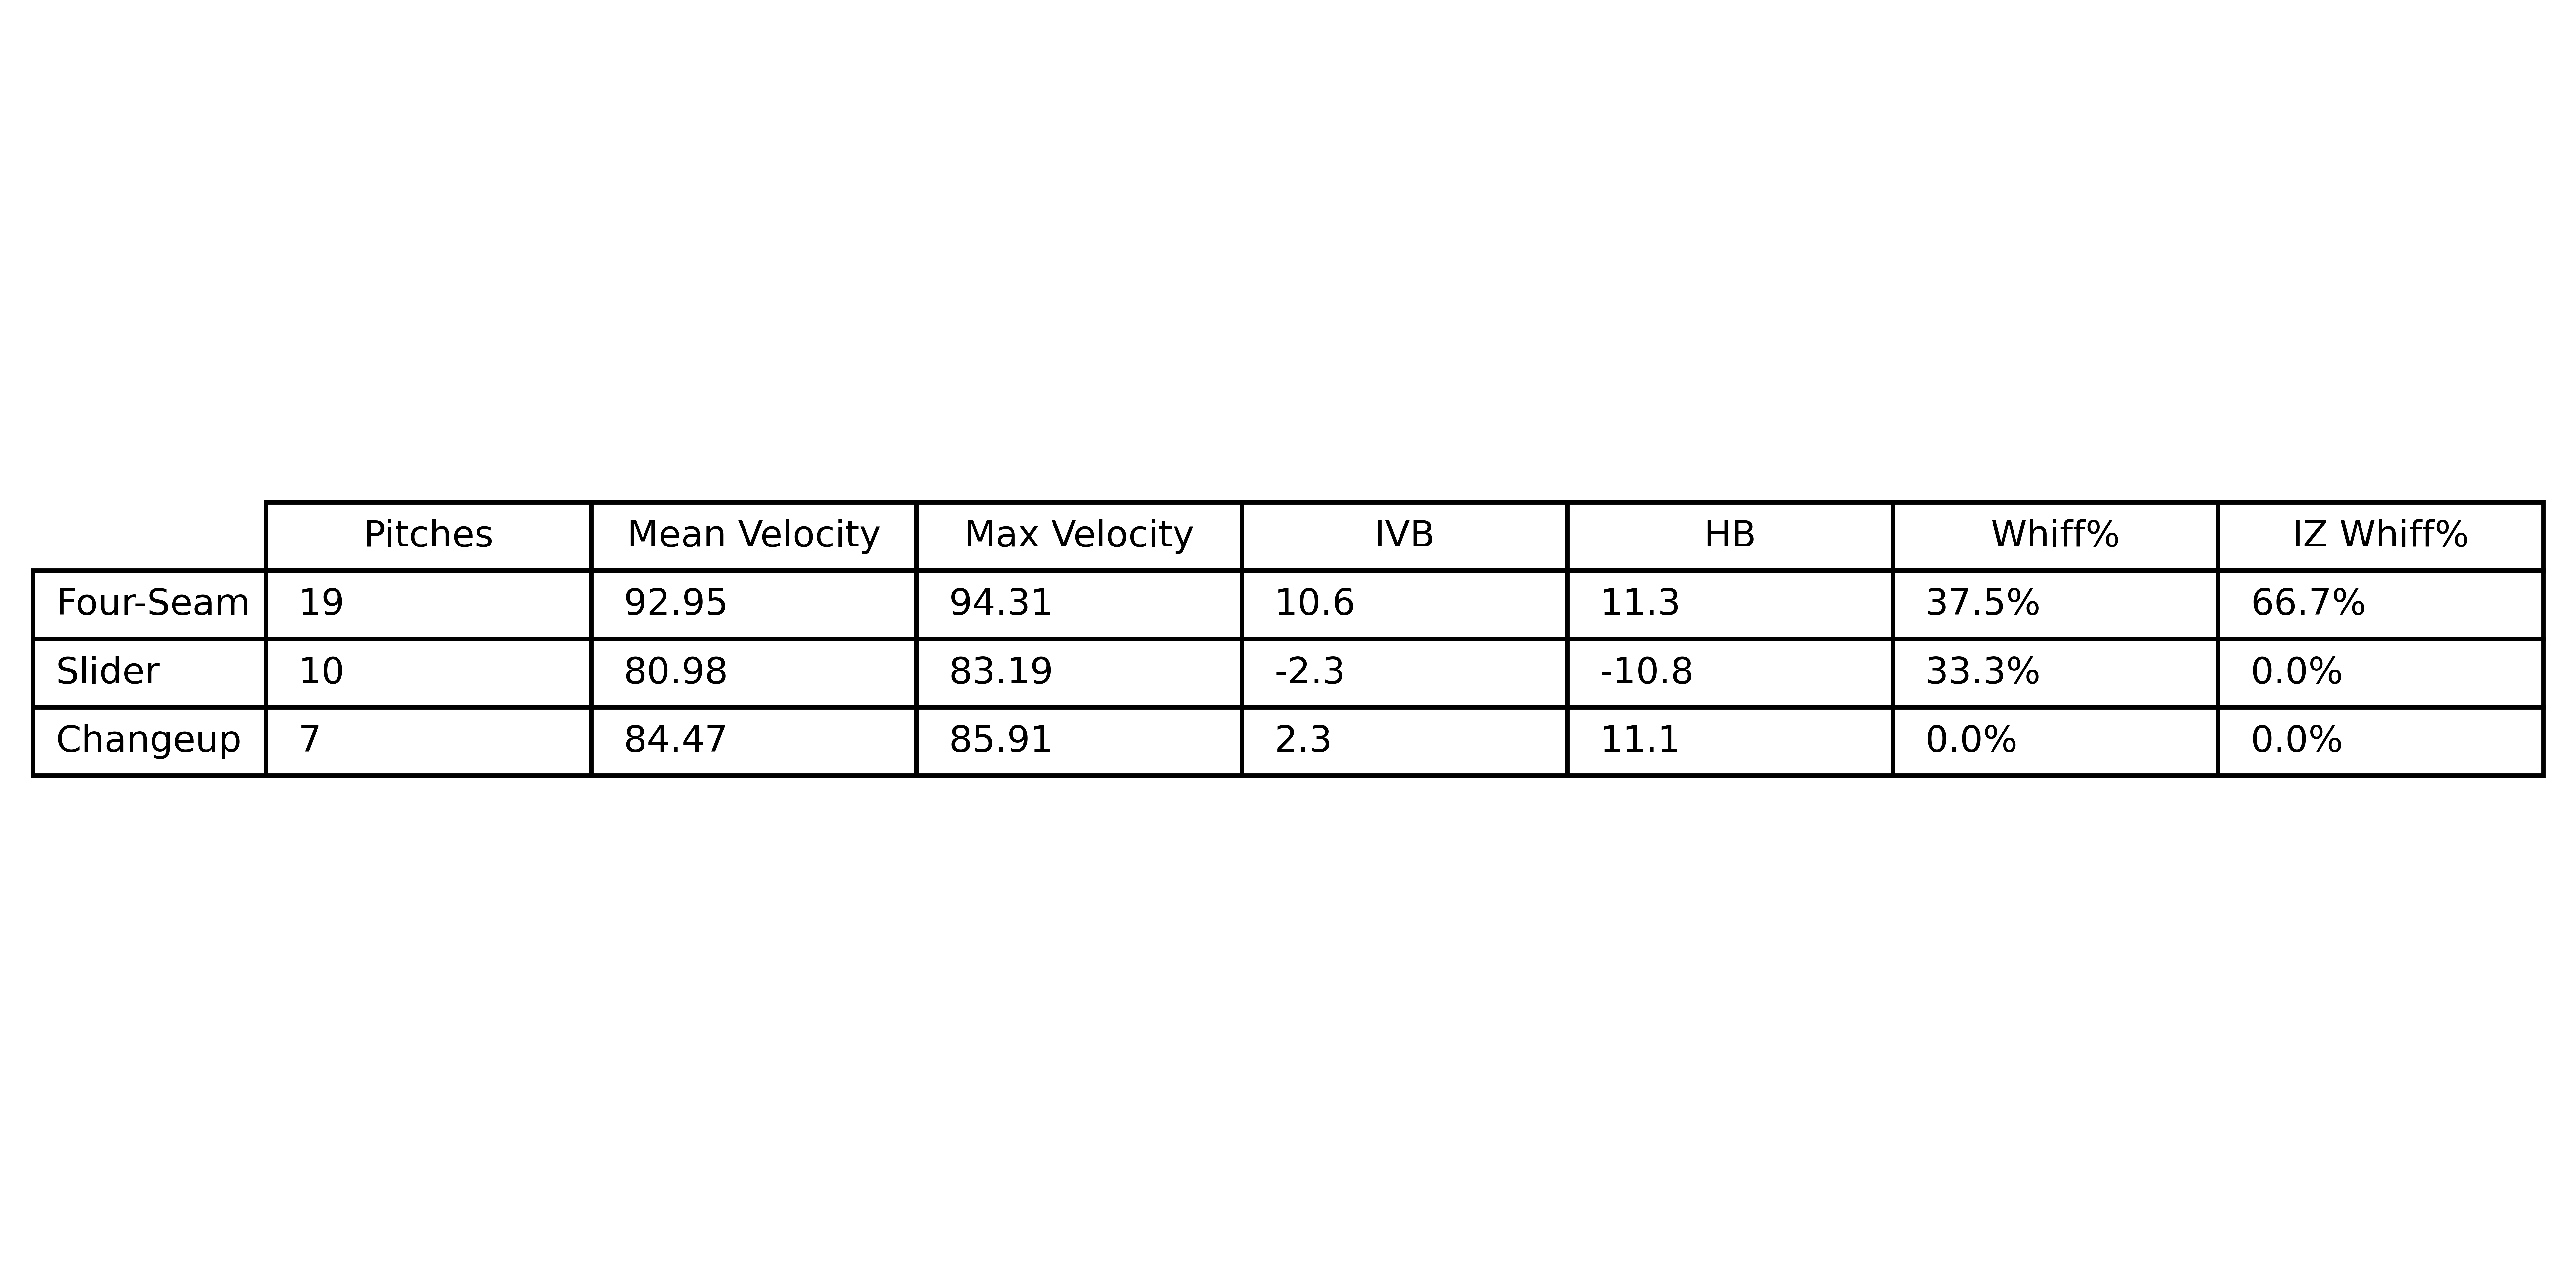

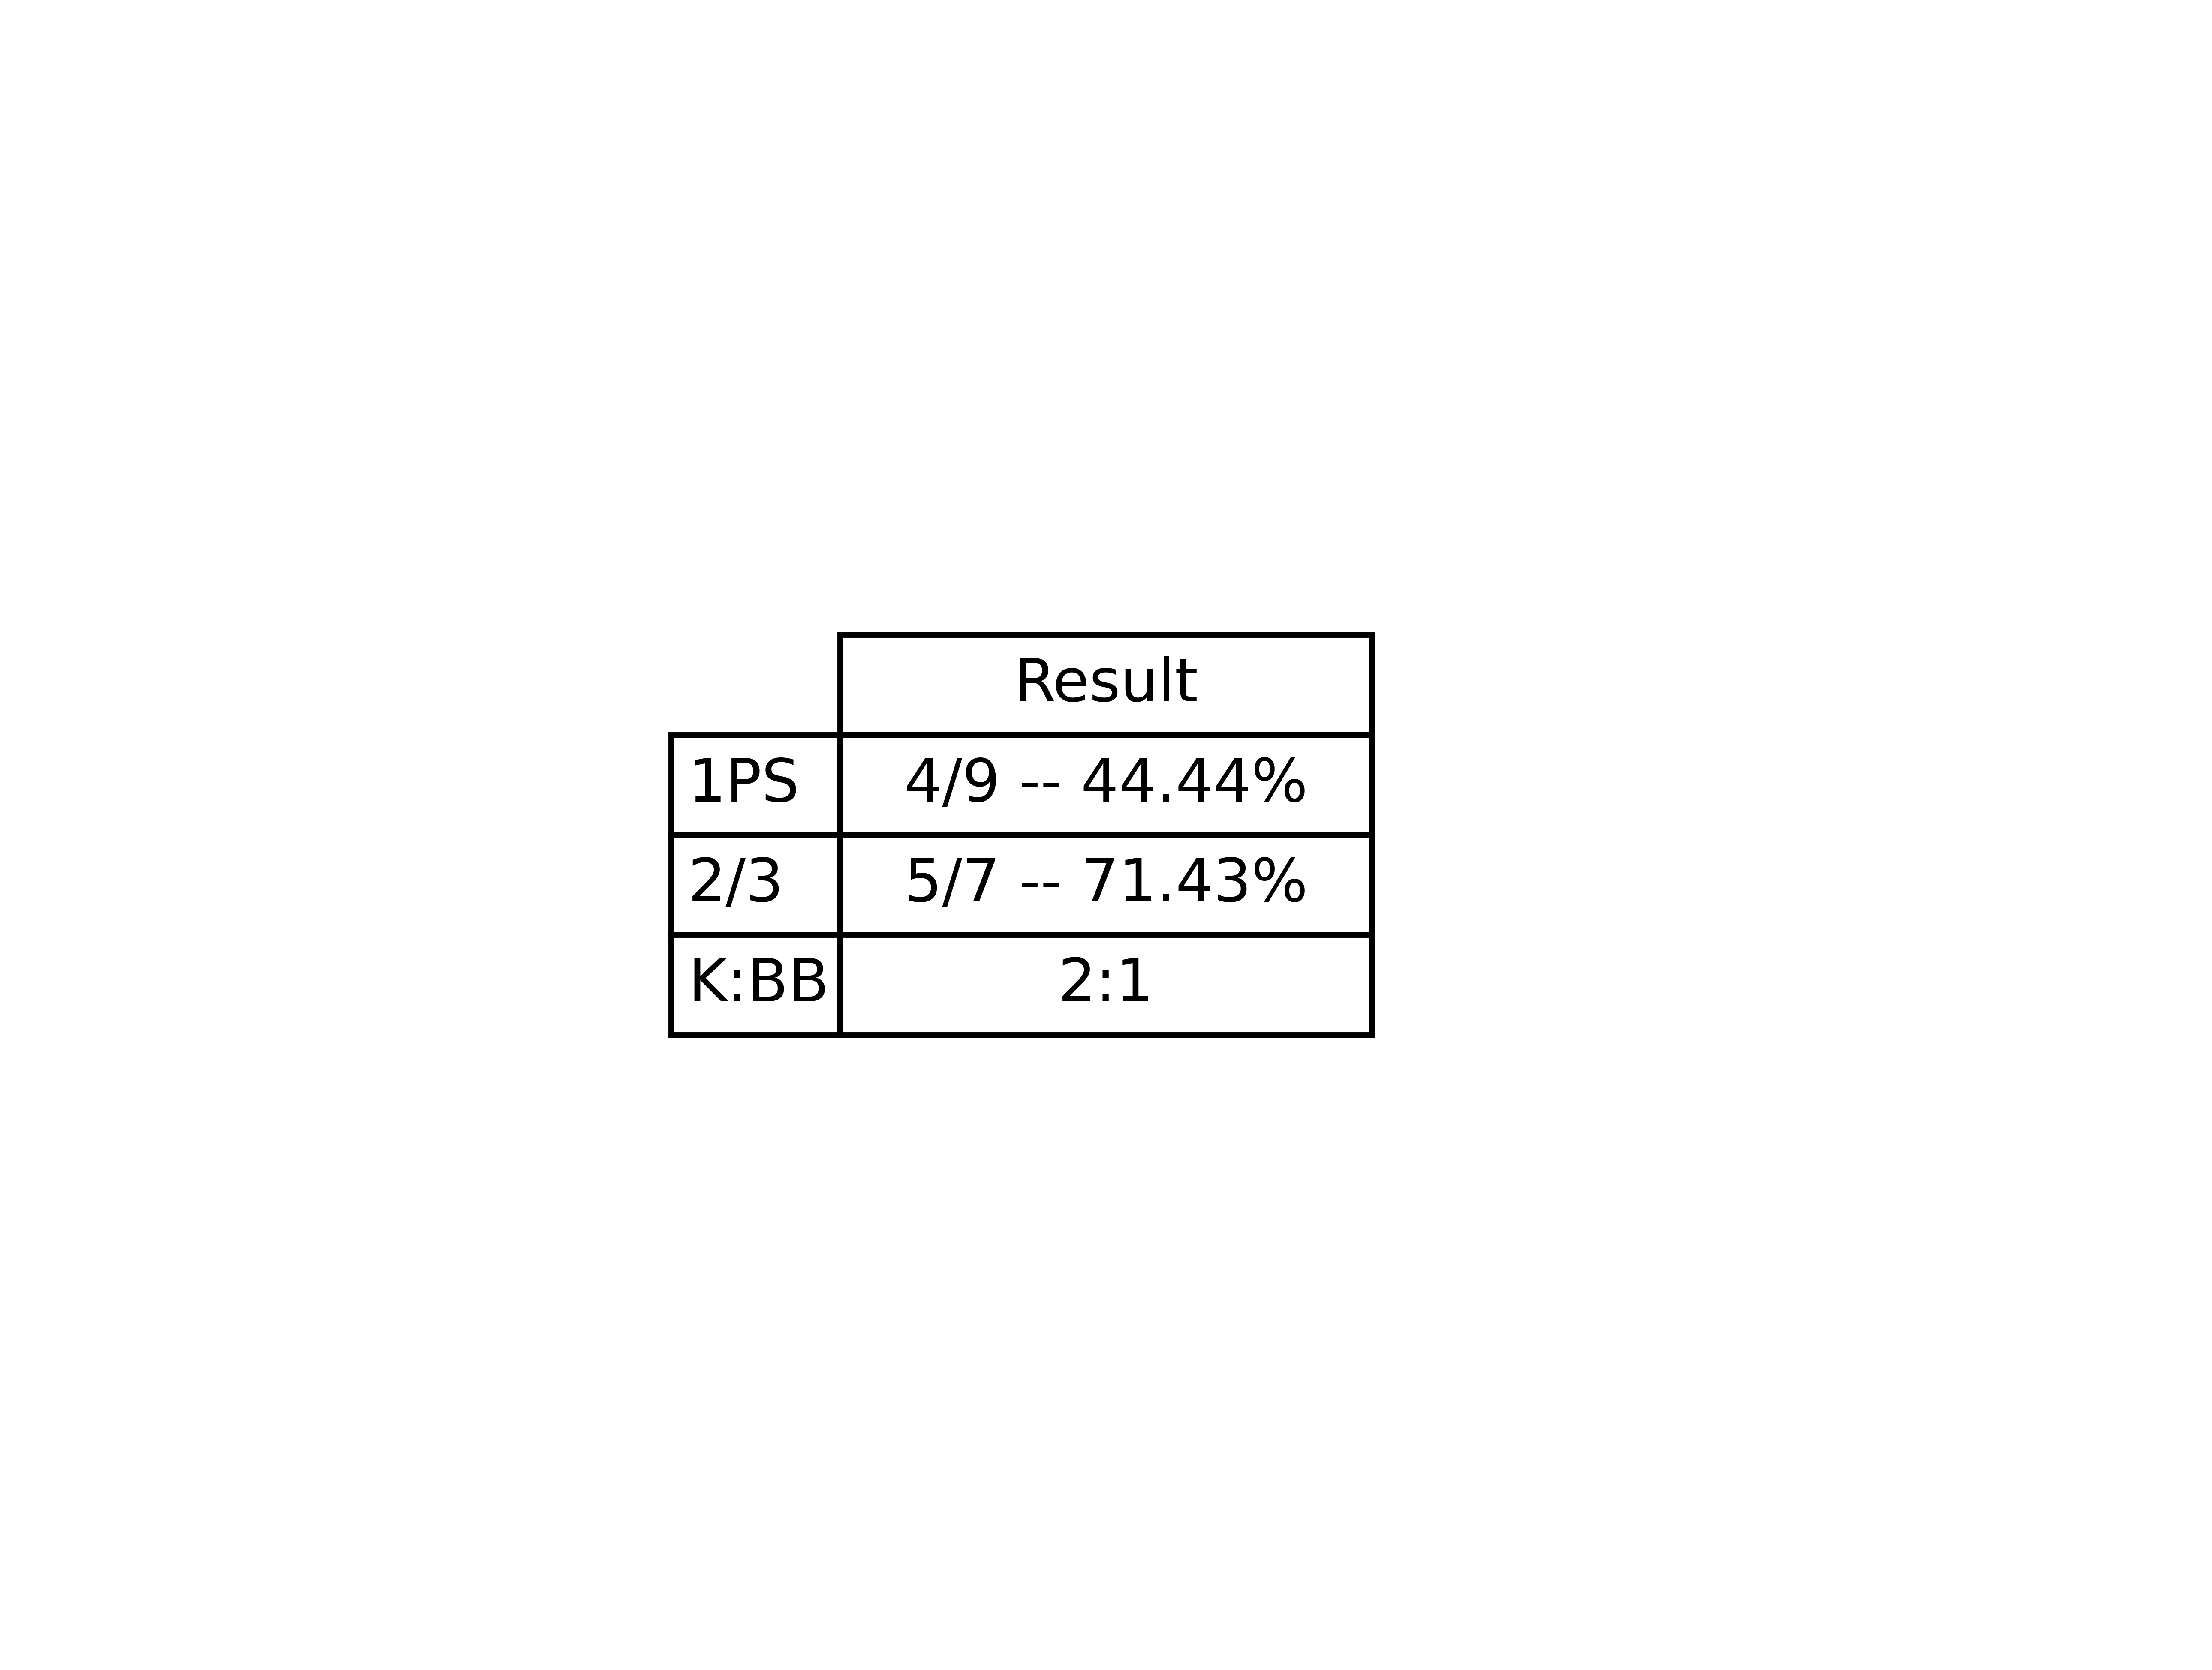

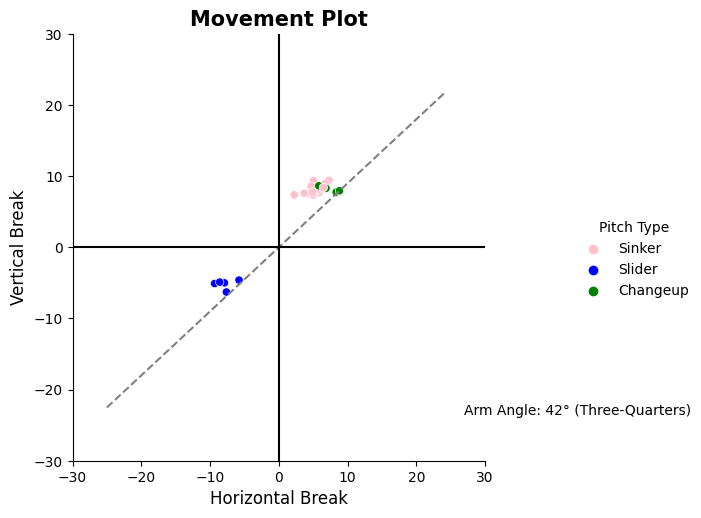

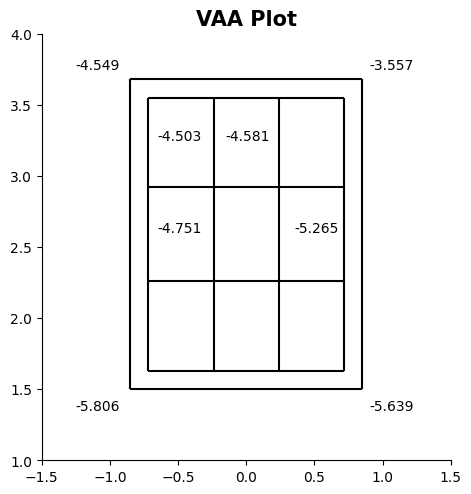

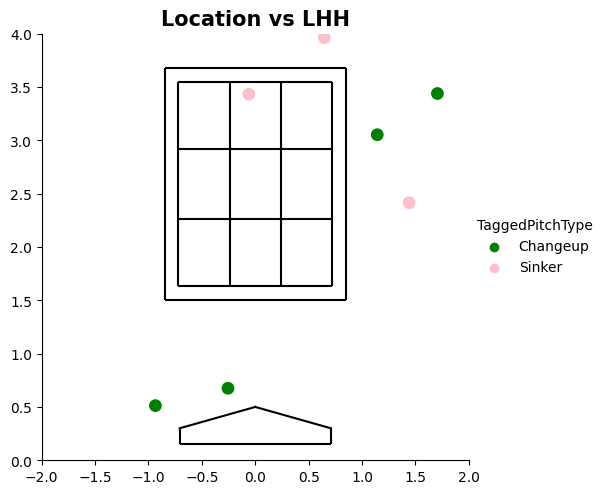

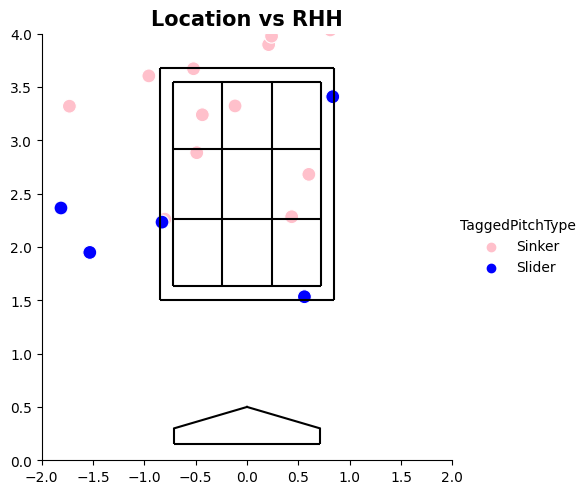

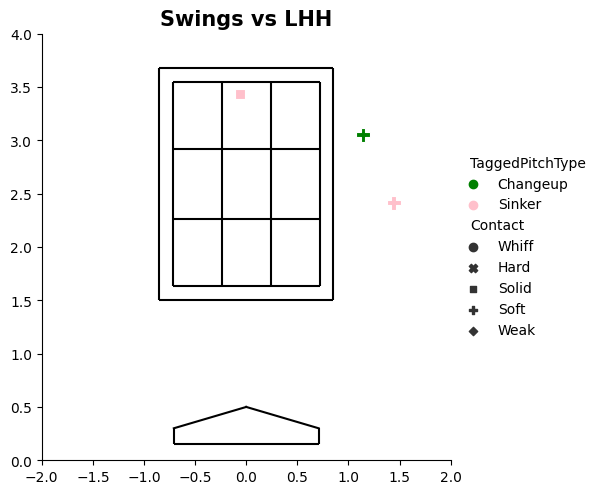

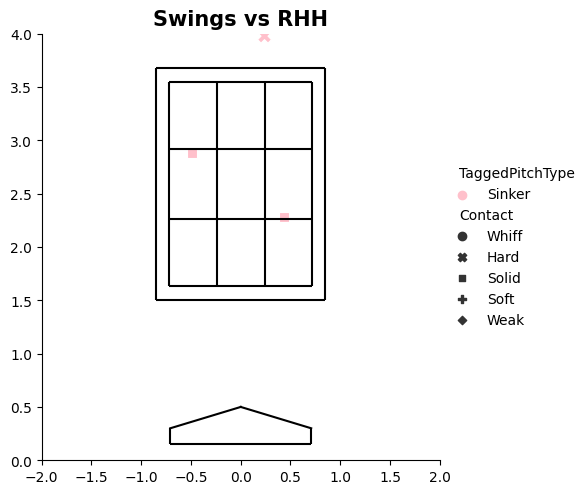

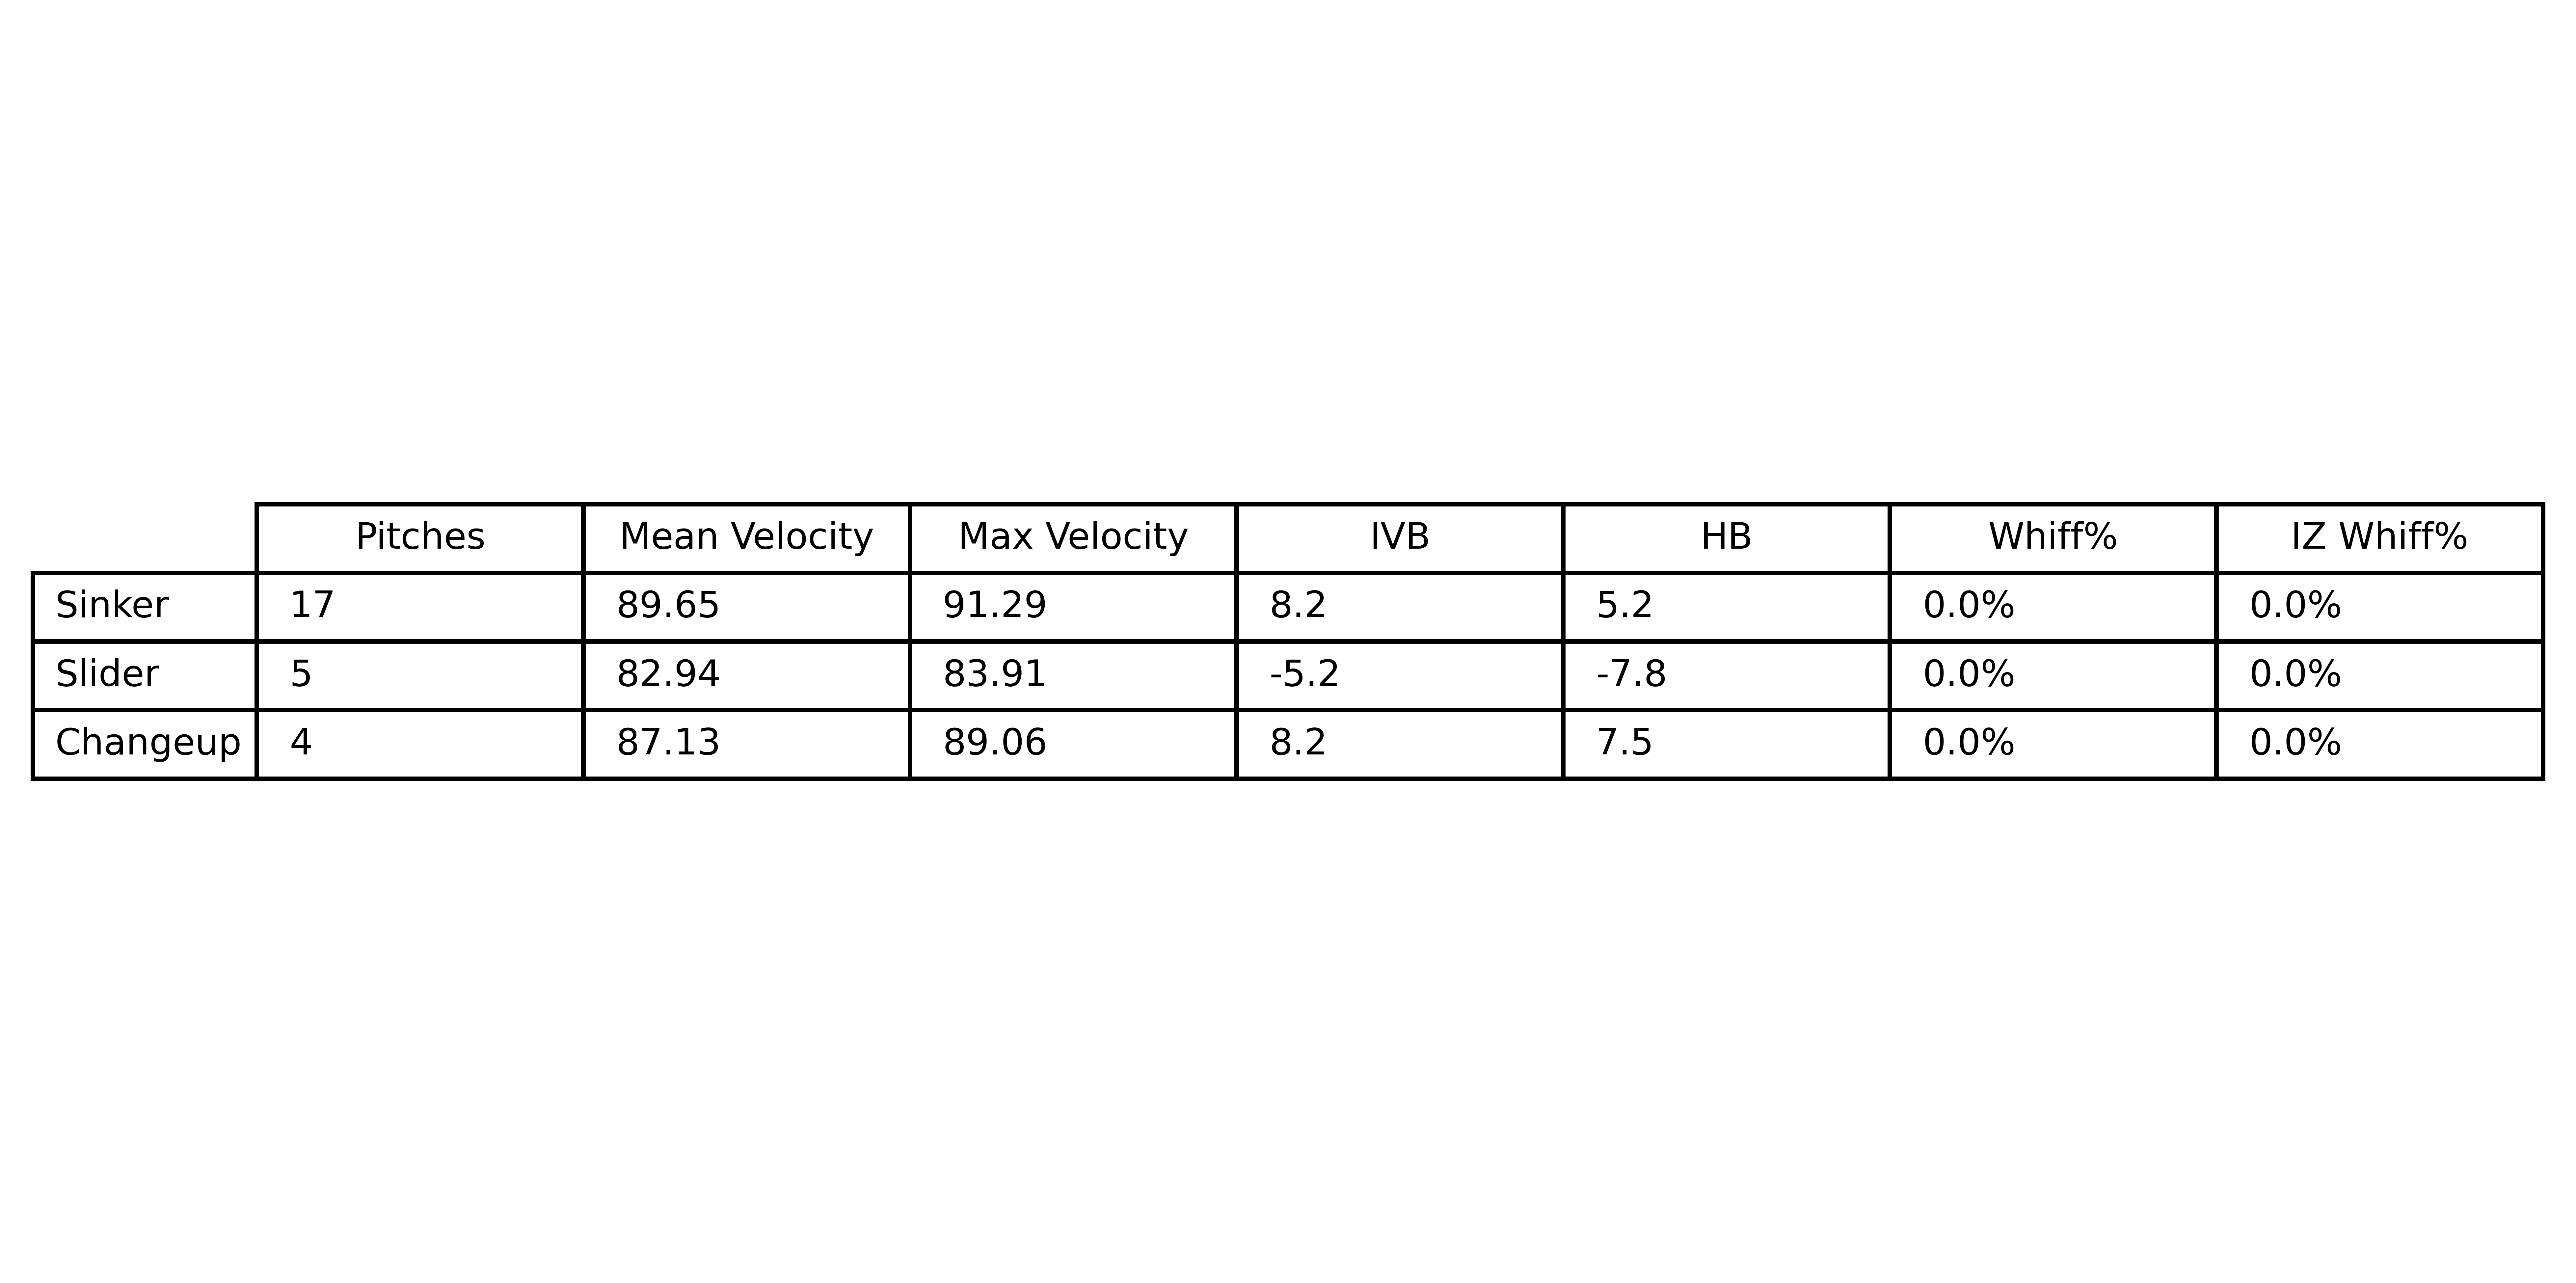

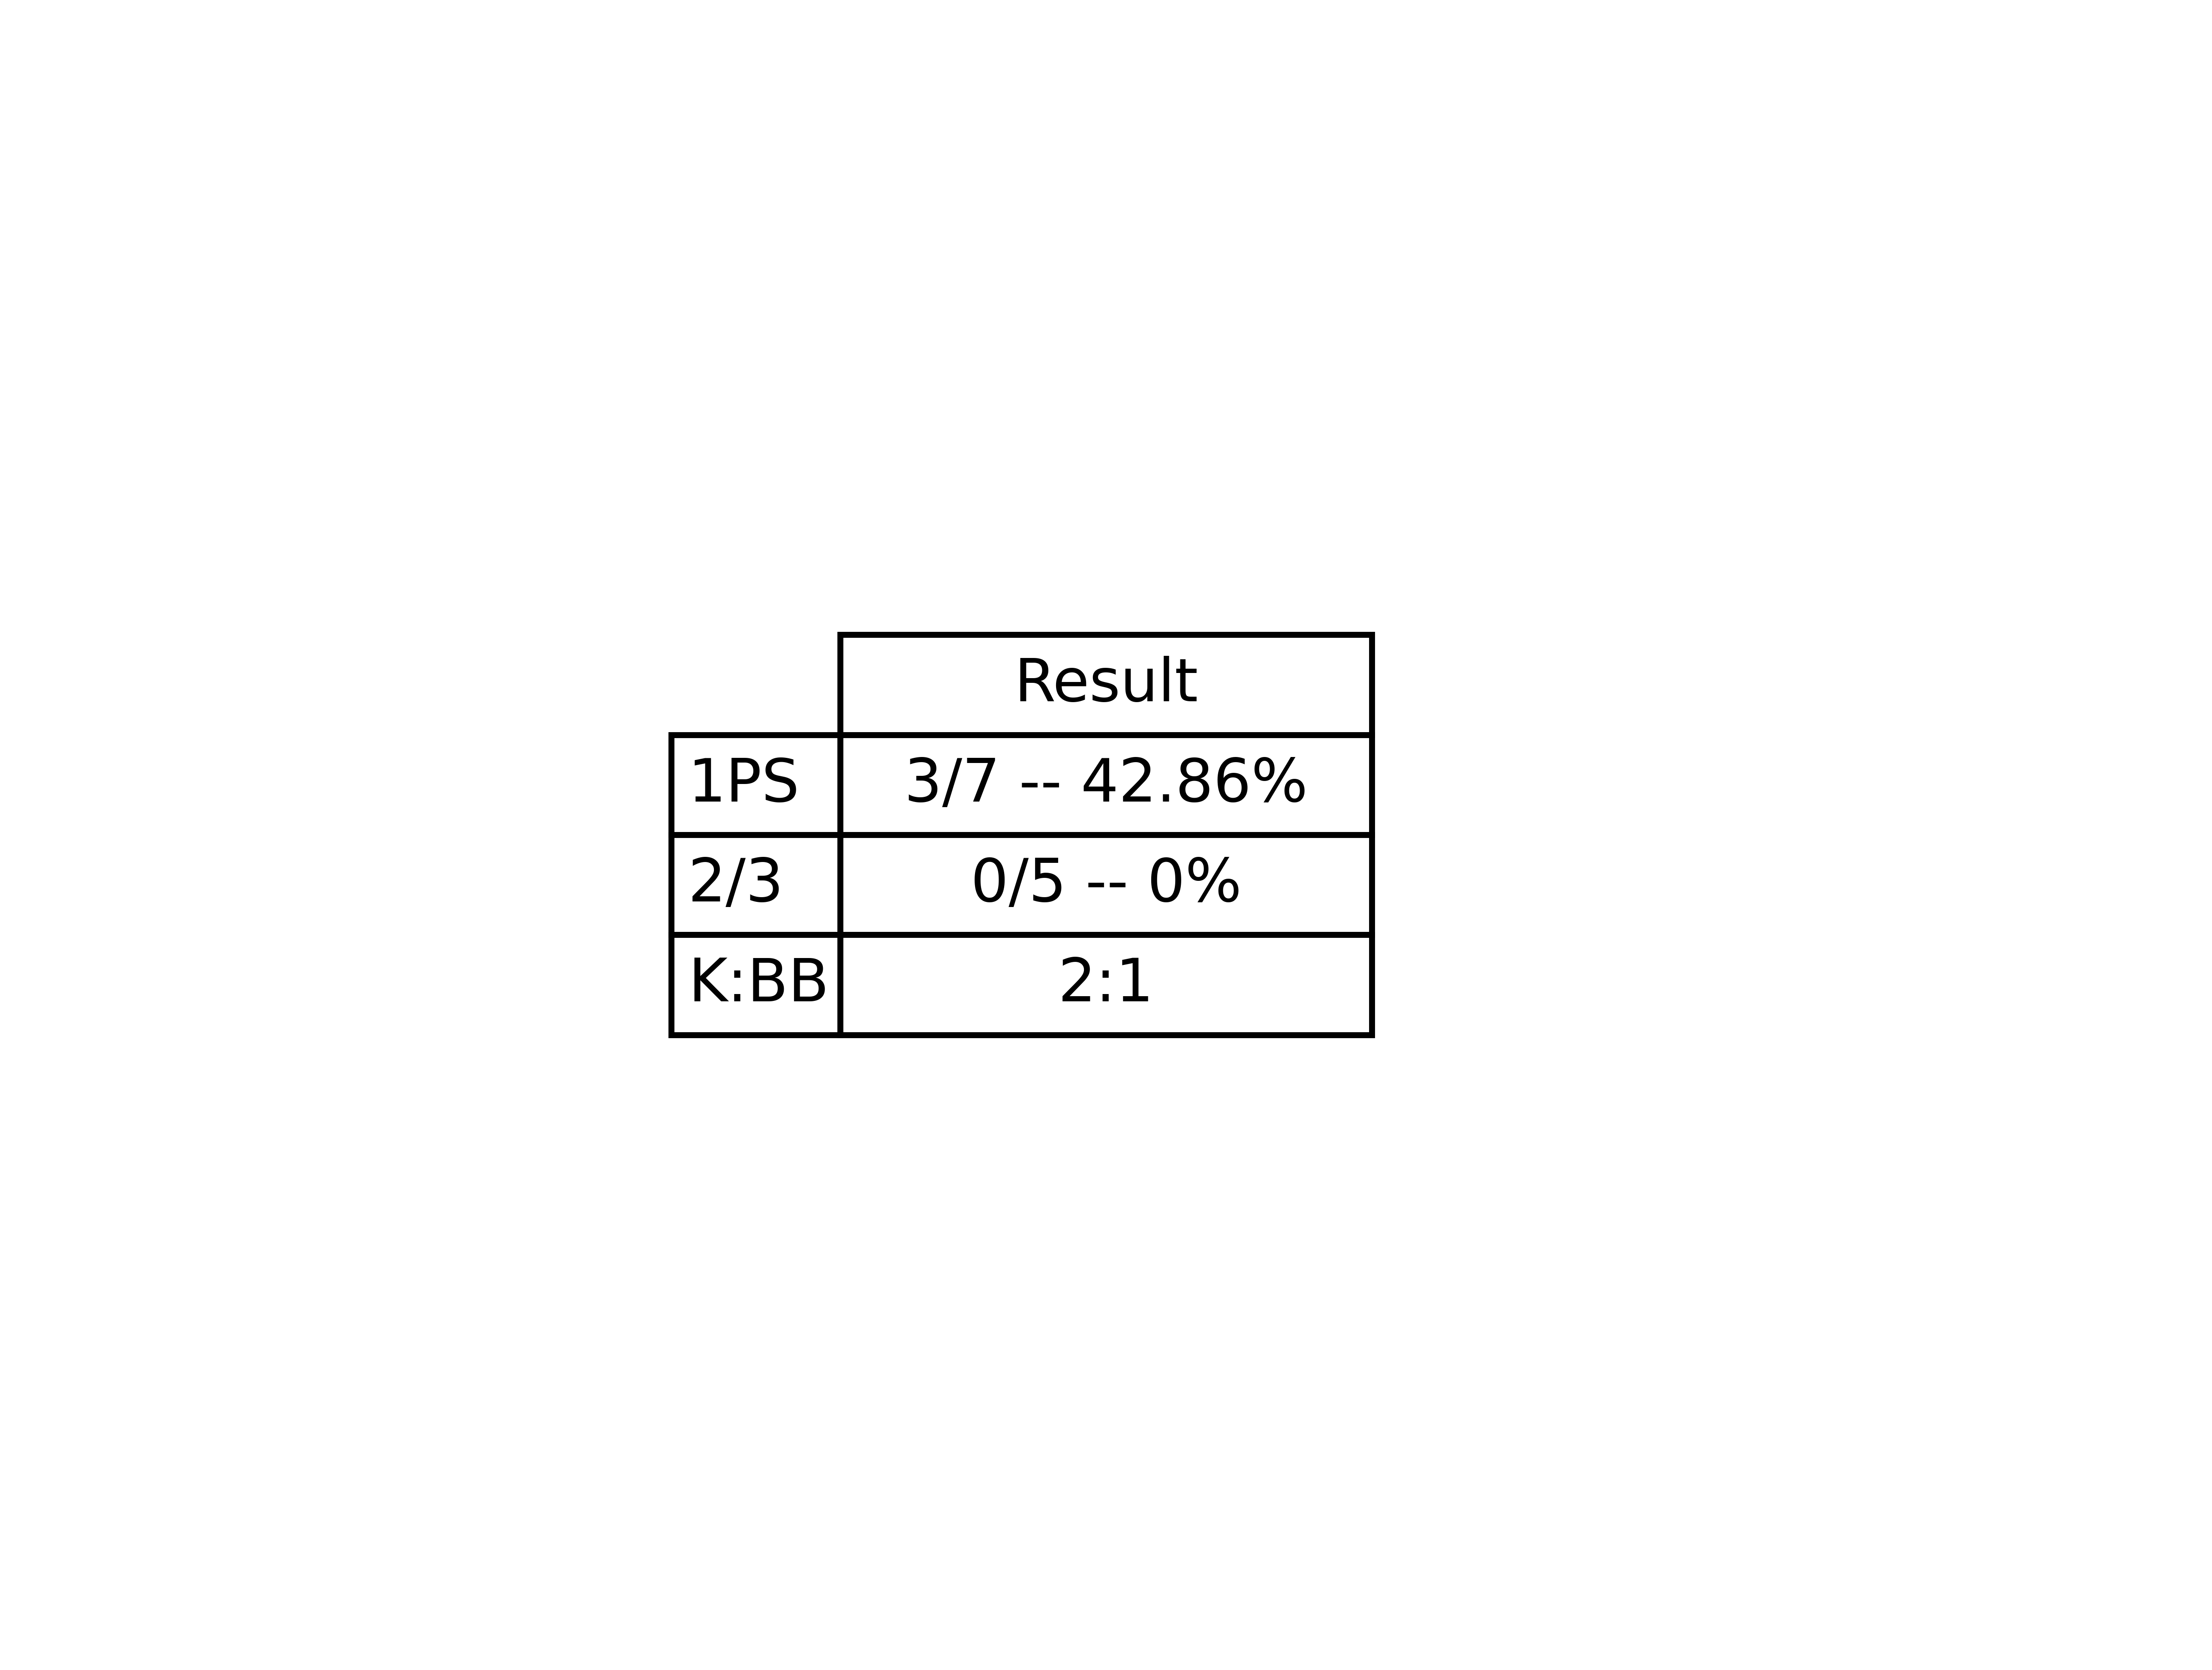

In [13]:
# Creating a For Loop that Applies the Code to Every Pitcher that Threw on the Date
for pitcher in pitchers:
    # Filtering Data based on the Pitcher, Removing Blank Values, and Creating Tables for PDF
    data = df.loc[df['Pitcher'] == pitcher]
    data_no_nan = data.copy()
    data_no_nan = data.dropna(subset=['TaggedPitchType','RelSpeed'])
    pitches = data_no_nan['TaggedPitchType'].unique()
    print(pitcher)
    table = pd.DataFrame(index=('Four-Seam', 'Sinker', 'Cutter', 'Slider', 'Curveball',
                                  'Sweeping Slider', 'Changeup', 'Splitter', 'Side-Arm Slider'))
    table = table.loc[table.index.intersection(pitches)]
    table2 = pd.DataFrame(columns=(['Result']))
    # Finding out Velocities for each Pitch

    for pitch in pitches:
        pitch_data = data.copy()
        pitch_count_series = pitch_data.value_counts(['TaggedPitchType'])
        table.loc[pitch, 'Pitches'] = ("%.0f" % pitch_count_series[pitch])

    for pitch in pitches:
        velo = data.loc[data['TaggedPitchType'] == pitch]
        velos = velo['RelSpeed']
        mean = round(velos.mean(), 2)
        high = round(velos.max(), 2)
        maxVelocity = (str(high))
        meanVelocity = (str(mean))
        print(str(pitch) + ': ' + maxVelocity + '' + meanVelocity)
        table.loc[pitch, 'Mean Velocity'] = meanVelocity
        table.loc[pitch, 'Max Velocity'] = maxVelocity

    for pitch in pitches:
        move_plot=data.copy()
        vert = round(move_plot.groupby('TaggedPitchType')['InducedVertBreak'].mean(), 1)
        horz = round(move_plot.groupby('TaggedPitchType')['HorzBreak'].mean(), 1)
        table.loc[pitch, 'IVB'] = vert.loc[pitch]
        table.loc[pitch, 'HB'] = horz.loc[pitch]

    # Finding out Whiff Rates for Each Pitch
    for pitch in pitches:
        whiff = data.loc[data['TaggedPitchType'] == pitch]
        ss = len(whiff.loc[whiff['PitchCall'] == 'StrikeSwinging'])
        foul = len(whiff.loc[(whiff['PitchCall'] == 'FoulBall') | (whiff['PitchCall'] == 'Foul')])
        play = len(whiff.loc[whiff['PitchCall'] == 'InPlay'])
        if ss+foul+play == 0:
            whiff_rate = 0.0
        else:
            whiff_rate = round((ss/(ss+foul+play))*100, 1)
        Whiff = str(pitch) + ' Whiff Rate: ' + str(whiff_rate) + '%'
        table.loc[pitch, 'Whiff%'] = f"{(whiff_rate/100.0):.1%}"

    # Finding In Zone Whiff Rate for Each Pitch
    for pitch in pitches:
        zone = data.copy()
        zone['xmin'] = -0.72
        zone['xmax'] = 0.72
        zone['ymin'] = 1.63
        zone['ymax'] = 3.55
        def in_zone(x, y, xmin, xmax, ymin, ymax):
            if xmin <= x <= xmax and ymin <= y <= ymax:
                return "yes"
            else:
                return "no"
        zone["InZone"] = zone.apply(lambda row: in_zone(row["PlateLocSide"], row["PlateLocHeight"],
                                                        row["xmin"], row["xmax"], row["ymin"], row["ymax"]), axis=1)
        iz_whiff = zone.loc[zone['InZone'] == 'yes']
        iz_whiff = iz_whiff.loc[iz_whiff['TaggedPitchType'] == pitch]
        iz_ss = len(iz_whiff.loc[iz_whiff['PitchCall'] == 'StrikeSwinging'])
        iz_foul = len(iz_whiff.loc[iz_whiff['PitchCall'] == 'FoulBall'])
        iz_play = len(iz_whiff.loc[iz_whiff['PitchCall'] == 'InPlay'])
        if iz_ss+iz_foul+iz_play == 0:
            iz_whiff_rate = 0.0
        else:
            iz_whiff_rate = round((iz_ss/(iz_ss+iz_foul+iz_play))*100, 1)
        IZ_Whiff = str(pitch) + ' In Zone Whiff Rate: ' + str(iz_whiff_rate) + '%'
        table.loc[pitch, 'IZ Whiff%'] = f"{(iz_whiff_rate/100.0):.1%}"


    # Finding the First Pitch Strike Percentage
    PA = data['PitchofPA'].value_counts()[1]
    result = data.groupby('PitchofPA')['PitchCall'].value_counts()
    calc = pd.DataFrame(result)
    calc.columns = ['Sum']
    calc = calc.reset_index()
    fp = calc.loc[calc['PitchofPA'] == 1]
    ball = fp.loc[(fp["PitchCall"] == "BallCalled") | (fp["PitchCall"] == "HitByPitch")]
    def error(ball):
        if ball.empty:
            return 0
        return ball['Sum'].sum()
    ball = error(ball)
    fps = int(PA)-int(ball)
    fps_per = round(fps/PA*100, 2)
    string = str(fps) + '/' + str(PA) + ' -- ' + str(fps_per) + '%'
    print('First Pitch Strike: ' + str(fps) + '/' + str(PA) + ' -- ' + str(fps_per) + '%')
    table2.loc['1PS'] = string

    # Splitting the Data Based on the Start of Every Plate Appearane
    data2 = data.copy()
    data2['StartofPA'] = data2['PitchofPA']==1

    dfs = []
    start_index = 0
    has_true = False

    for end_index, value in enumerate(data2['StartofPA']):
        if value:
            has_true = True
            dfs.append(data2[start_index:end_index])
            start_index = end_index

    if has_true:
        dfs.append(data2[start_index:])

    # Delete any Plate Appearance that does not start with the Selected Pitcher
    dfs = [data2 for data2 in dfs if any(data2['StartofPA'])]

    # Determine Scenarios where 2/3 Opportunity is Failed
    fail_count = 0
    for i, data2 in enumerate(dfs):
        if data2.iloc[:3]['PitchCall'].tolist().count('BallCalled') >= 2:
            fail_count += 1
        elif data2.iloc[:3]['PitchCall'].tolist().count('BallCalled') >= 1 and data2.iloc[:3]['PitchCall'].tolist().count('HitByPitch') >= 1:
            fail_count += 1

    # Determine Every Possible 2/3 Opportunity
    total_count = 0
    for i, data2 in enumerate(dfs):
        if len(data2['PitchCall']) >= 3:
            total_count += 1
        elif data2.iloc[0]['PitchCall'] == 'BallCalled' and data2.iloc[1]['PitchCall'] == 'BallCalled':
            total_count += 1
        elif data2.iloc[0]['PitchCall'] == 'BallCalled' and data2.iloc[1]['PitchCall'] == 'HitByPitch':
            total_count += 1
        elif data2.iloc[0]['PitchCall'] == 'StrikeSwinging' and data2.iloc[1]['PitchCall'] == 'FoulBall':
            total_count += 1
        elif data2.iloc[0]['PitchCall'] == 'StrikeSwinging' and data2.iloc[1]['PitchCall'] == 'InPlay':
            total_count += 1
        elif data2.iloc[0]['PitchCall'] == 'StrikeSwinging' and data2.iloc[1]['PitchCall'] == 'StrikeCalled':
            total_count += 1
        elif data2.iloc[0]['PitchCall'] == 'StrikeSwinging' and data2.iloc[1]['PitchCall'] == 'StrikeSwinging':
            total_count += 1
        elif data2.iloc[0]['PitchCall'] == 'StrikeCalled' and data2.iloc[1]['PitchCall'] == 'FoulBall':
            total_count += 1
        elif data2.iloc[0]['PitchCall'] == 'StrikeCalled' and data2.iloc[1]['PitchCall'] == 'InPlay':
            total_count += 1
        elif data2.iloc[0]['PitchCall'] == 'StrikeCalled' and data2.iloc[1]['PitchCall'] == 'StrikeCalled':
            total_count += 1
        elif data2.iloc[0]['PitchCall'] == 'StrikeCalled' and data2.iloc[1]['PitchCall'] == 'StrikeSwinging':
            total_count += 1
        elif data2.iloc[0]['PitchCall'] == 'FoulBall' and data2.iloc[1]['PitchCall'] == 'FoulBall':
            total_count += 1
        elif data2.iloc[0]['PitchCall'] == 'FoulBall' and data2.iloc[1]['PitchCall'] == 'InPlay':
            total_count += 1
        elif data2.iloc[0]['PitchCall'] == 'FoulBall' and data2.iloc[1]['PitchCall'] == 'StrikeCalled':
            total_count += 1
        elif data2.iloc[0]['PitchCall'] == 'FoulBall' and data2.iloc[1]['PitchCall'] == 'StrikeSwinging':
            total_count += 1

    # Determining Successful 2/3 Opportunities by Subracting Failed from Total
    tot = int(total_count) - int(fail_count)
    if tot == 0:
        tot_per = 0
    else:
        tot_per = round(tot/total_count *100, 2)
    string2 = str(tot) + '/' + str(total_count) + ' -- ' + str(tot_per) + '%'
    print('Two out of Threes: ' + str(tot) + '/' + str(total_count) + ' -- ' + str(tot_per) + '%')
    table2.loc['2/3'] = string2

    # Determining the Number of Strikeouts to Walks
    K = data.loc[data['KorBB'] == 'Strikeout']
    K = K.shape[0]
    BB = data.loc[data['KorBB'] == 'Walk']
    BB = BB.shape[0]
    print('Strikeouts to Walks: ' + str(K) + '-' + str(BB))
    table2.loc['K:BB'] = str(K)+':'+str(BB)

    # Creating the Title of the Movement Plot with the Arm Slot
    TITLE =  'Movement Plot'

    move_plot = data.copy()


    # Assigning colors to each pitch
    hue_colors = {'Four-Seam':'black',
              'Cutter':'purple',
              'Sinker':'pink',
              'Slider':'blue',
              'Splitter':'teal',
              'Changeup':'green',
              'Curveball':'orange',
              'Side-Arm Slider':'red',
              'Sweeping Slider':'magenta'}

    # Creating DataFrame to Assign Each Pitcher a Height and Merge into Main DataFrame
    #UPDATED FOR MARYLAND PITCHERS WE HAVE INFO ON
    dfheight = pd.DataFrame(columns=('Pitcher', 'Height'))
    dfheight['Pitcher'] = ['Logan Berrier', 'Meade Johnson', 'Andrew Johnson', 'Joey Colucci', 'Logan Koester',
                           'Trystan Sarcone', 'Garrett French', 'Omar Melendez', 'Evan Smith', 'Kenny Lippman', 'Kyle McCoy',
                           'James Gladden', 'Nate Haberthier', 'Owen Crowe', 'Ryan Van Buren', 'Hunter Baynes', 'Logan Ott',
                           'Duke McCarron', 'Joey McMannis', 'Luke Roccesano', 'Evan Marcinko', 'Zach Stichweh', 'Alex Walsh']
    dfheight['Height'] = [6.08, 6.25, 6, 6.42, 6.33, 6.08, 6.17, 6.5, 6.08, 6.25, 6.5, 6,
                          6.42, 6.08, 6.33, 6.25, 5.92, 6.08, 6.42, 6.33, 6.25, 6, 6.33]

    Height = dfheight.loc[dfheight['Pitcher'] == pitcher, 'Height']
    # Determining what Pitch to Base Arm Slot off of
    if 'Four-Seam' in pitches:
        Pitch = 'Four-Seam'
    elif 'Sinker' in pitches:
        Pitch = 'Sinker'
    else:
        Pitch = 'Slider'

    # Using Pythagorean Theorem to Deterine the Pitchers Arm Slot
    # https://web.archive.org/web/20230123183755/https://www.rundownbaseball.com/project/calculating-arm-angles-using-statcast-data/
    df2 = move_plot.copy()
    df2 = pd.merge(df2, dfheight, on='Pitcher', how='inner')
    df2 = df2.loc[df2['TaggedPitchType'] == Pitch]
    avgreleaseposz = df2['RelHeight'].mean()
    avgreleaseposx = df2['RelSide'].mean()
    adj = avgreleaseposz-Height*0.7
    opp = abs(avgreleaseposx)
    hyp = np.sqrt((opp**2+adj**2))

    radian = np.arccos(((adj**2)+(hyp**2)-(opp**2))/(2*(adj*hyp)))
    Angle = radian*(57.295779513)
    Angle = 90-Angle
    Angle = (int(Angle))

    # Determing Classification of Arm Slot Based on Degree
    if Angle < 0:
        Slot = 'Submarine'
    elif Angle < 20:
        Slot = 'Sidearm'
    elif Angle < 60:
        Slot = 'Three-Quarters'
    else:
        Slot = 'Overhand'

    Arm = 'Arm Angle: '+ str(Angle) +'° (' + str(Slot) + ')'

    # # Finding the average movement for each pitch
    vert = str(round(move_plot.groupby('TaggedPitchType')['InducedVertBreak'].mean(), 1))
    horz = str(round(move_plot.groupby('TaggedPitchType')['HorzBreak'].mean(), 1))
    vert_text = 'Average Vertical Break' + vert[13:-38]
    horz_text = 'Average Horizontal Break' + horz[13:-32]



    # Plotting the graph
    g = sns.relplot(x='HorzBreak', y='InducedVertBreak', hue='TaggedPitchType',
                data=move_plot, palette=hue_colors)

    x1 = 0
    y1 = 0

    degree = Angle * np.pi / 180

    if move_plot['PitcherThrows'].iloc[0] == 'Left':
        degree = -Angle * np.pi / 180
    else:
        degree = Angle * np.pi / 180

    sl = math.tan(degree)
    x = np.array(range(-25,25))
    y = sl*(x-x1) + y1

    plt.plot(x,y,'--', color='grey')

    # # Customizing the plot
    plt.title(TITLE, fontsize='15', fontweight='bold')
    leg = g._legend
    leg.loc = 'center right'
    leg.set_title('Pitch Type')
    plt.axhline(y=0, color = 'black')
    plt.axvline(x=0, color = 'blacK')
    plt.xlim(-30,30)
    plt.ylim(-30,30)
    plt.xlabel('Horizontal Break', fontsize='12')
    plt.ylabel('Vertical Break', fontsize='12')
    plt.text(60, -22, Arm, size='medium', va='top', ha='right')

    # Listing the Pitchers that have 2 Arm Slots
    Dual_Slots = ('Williams, TR', 'Kleinfelter, Matthew')

    # Listing Sinker (Side Arm Fastball) as the Pitch
    if pitcher in Dual_Slots:
        Pitch1 = 'Sinker'

        # Using Pythagorean Theorem to Deterine the Pitchers Arm Slot
        df2 = move_plot.copy()
        df2 = pd.merge(df2, dfheight, on='Pitcher', how='inner')
        df2 = df2.loc[df2['TaggedPitchType'] == Pitch1]
        avgreleaseposz = df2['RelHeight'].mean()
        avgreleaseposx = df2['RelSide'].mean()
        adj = avgreleaseposz-Height*0.7
        opp = abs(avgreleaseposx)
        hyp = np.sqrt((opp**2+adj**2))

        radian = np.arccos(((adj**2)+(hyp**2)-(opp**2))/(2*(adj*hyp)))
        Angle = radian*(57.295779513)
        Angle = 90-Angle
        Angle = (int(Angle))

        # Determing Classification of Arm Slot Based on Degree
        if Angle < 0:
            Slot = 'Submarine'
        elif Angle < 20:
            Slot = 'Sidearm'
        elif Angle < 60:
            Slot = 'Three-Quarters'
        else:
            Slot = 'Overhand'

        Arm = 'Arm Angle: '+ str(Angle) +'° (' + str(Slot) + ')'

        x1 = 0
        y1 = 0

        degree = Angle * np.pi / 180

        if move_plot['PitcherThrows'].iloc[0] == 'Left':
            degree = -Angle * np.pi / 180
        else:
            degree = Angle * np.pi / 180

        sl = math.tan(degree)
        x = np.array(range(-25,25))
        y = sl*(x-x1) + y1

        plt.plot(x,y,'--', color='blue')
        plt.text(60, -24, Arm, size='medium', va='top', ha='right')

    # Saving the Figure to use Later in PDF
    plt.savefig(directory + pitcher + '_' + Date2 + '_' + Opponent + '_movement_plot.png', bbox_inches='tight')

    # Creating the Title for the VAA Plot
    TITLE1 =  'VAA Plot'

    vaa_plot = data.copy()

    if 'Four-Seam' in pitches:
        Pitch2 = 'Four-Seam'
    elif 'Sinker' in pitches:
        Pitch2 = 'Sinker'
    else:
        Pitch2 = 'Slider'

    vaa_plot = vaa_plot.loc[vaa_plot['TaggedPitchType'] == Pitch2]

    # Creating a Function that Determines the Zone the Ball Ends Up in
    def zone_location (row):
        if row['PlateLocSide'] >= 0 and row['PlateLocHeight'] >= 3.55 :
            return '11'
        if row['PlateLocSide'] >= 0.72 and row['PlateLocHeight'] >= 2.60 :
            return '11'
        if row['PlateLocSide'] <= 0 and row['PlateLocHeight'] >= 3.55 :
            return '12'
        if row['PlateLocSide'] <= -0.72 and row['PlateLocHeight'] >= 2.60 :
            return '12'
        if row['PlateLocSide'] >= 0 and row['PlateLocHeight'] <= 1.63 :
            return '13'
        if row['PlateLocSide'] >= 0.72 and row['PlateLocHeight'] <= 2.60 :
            return '13'
        if row['PlateLocSide'] <= 0 and row['PlateLocHeight'] <= 1.63 :
            return '14'
        if row['PlateLocSide'] <= -0.72 and row['PlateLocHeight'] <= 2.60 :
            return '14'
        if row['PlateLocSide'] >= 0.24 and row['PlateLocHeight'] >= 2.92 :
            return '1'
        if row['PlateLocSide'] >= -0.24 and row['PlateLocHeight'] >= 2.92 :
            return '2'
        if row['PlateLocSide'] <= -0.24 and row['PlateLocHeight'] >= 2.92 :
            return '3'
        if row['PlateLocSide'] >= 0.24 and row['PlateLocHeight'] >= 2.26 :
            return '4'
        if row['PlateLocSide'] >= -0.24 and row['PlateLocHeight'] >= 2.26 :
            return '5'
        if row['PlateLocSide'] <= -0.24 and row['PlateLocHeight'] >= 2.26 :
            return '6'
        if row['PlateLocSide'] >= 0.24 and row['PlateLocHeight'] >= 1.63 :
            return '7'
        if row['PlateLocSide'] >= -0.24 and row['PlateLocHeight'] >= 1.63 :
            return '8'
        if row['PlateLocSide'] <= -0.24 and row['PlateLocHeight'] >= 1.63 :
            return '9'

    vaa_plot['zone'] = vaa_plot.apply (lambda row: zone_location(row), axis=1)

    vaa = round(vaa_plot.groupby('zone', as_index=False)['VertApprAngle'].mean(), 3)
    vaa['zone'] = vaa['zone'].astype('int')

    # Creating a DataFrame of the Strike Zones and the Individual Zones
    df5 = pd.DataFrame(columns=('zone', 'X', 'Y'))
    df5['zone'] = [1,2,3,4,5,6,7,8,9,11,12,13,14]
    df5['X'] = [0.35, -0.15, -0.65, 0.35, -0.15, -0.65, 0.35, -0.15, -0.65, 0.9, -1.25, 0.9, -1.25]
    df5['Y'] = [3.25, 3.25, 3.25, 2.6, 2.6, 2.6, 1.9, 1.9, 1.9, 3.75, 3.75, 1.35, 1.35]

    df5 = pd.merge(vaa, df5, on='zone', how='outer')
    df5.VertApprAngle = df5.VertApprAngle.fillna('')

    # Plotting the graph
    g1 = sns.relplot(x='X', y='Y',
                data=df5, color='white')

    # Creating the borderline zone
    plt.hlines(y= 1.5, xmin=-0.85, xmax=0.85, color='black')
    plt.hlines(y= 3.68, xmin=-0.85, xmax=0.85, color='black')
    plt.vlines(x=-0.85, ymin=1.5, ymax=3.68, color='black')
    plt.vlines(x=0.85, ymin=1.5, ymax=3.68, color='black')

    # Creating the strike zone
    plt.hlines(y= 1.63, xmin=-0.72, xmax=0.72, color='black')
    plt.hlines(y= 3.55, xmin=-0.72, xmax=0.72, color='black')
    plt.vlines(x=-0.72, ymin=1.63, ymax=3.55, color='black')
    plt.vlines(x=0.72, ymin=1.63, ymax=3.55, color='black')

    # Creating 1-9 zones
    plt.vlines(x=-0.24, ymin=1.63, ymax=3.55, color='k')
    plt.vlines(x=0.24, ymin=1.63, ymax=3.55, color='k')
    plt.hlines(y=2.26, xmin=-0.72, xmax=0.72, color='k')
    plt.hlines(y=2.92, xmin=-0.72, xmax=0.72, color='k')

    # Customizing the plot
    plt.title(TITLE1, fontsize='15', fontweight='bold')
    plt.xlabel('')
    plt.ylabel('')
    # label points on the plot
    for x, y, z in zip(df5['X'], df5['Y'], df5['VertApprAngle']):
        plt.text(x = x,
                 y = y,
                 s = z,
                 color = 'black')
        plt.xlim(-1.5,1.5)
        plt.ylim(1.0,4.0)

    # Saving the Plot to be used for a PDF
    plt.savefig(directory + pitcher + '_' + Date2 + '_' + Opponent + '_vaa_plot.png', bbox_inches='tight')

    # Set title of the Location Plot vs Lefties
    TITLE3 =  'Location vs LHH'

    # Filtering Data to LHH
    LHH = data.loc[data['BatterSide'] == 'Left']

    # Creating a Function that Measures Quality of Contact
    def quality_of_contact(row):
        if row['ExitSpeed'] >= 90:
            return 'Hard'
        elif row['ExitSpeed'] >= 75:
            return 'Solid'
        elif row['ExitSpeed'] >= 60:
            return 'Soft'
        elif row['ExitSpeed'] < 60:
            return 'Weak'
        elif row['PitchCall'] != 'StrikeSwinging':
            return 'Solid'
        else:
            return 'Whiff'

    order=('Whiff', 'Hard', 'Solid', 'Soft', 'Weak')

    g2 = sns.relplot(x='PlateLocSide', y='PlateLocHeight', hue='TaggedPitchType',
                data=LHH, palette=hue_colors,
                s=100)

    # Creating the borderline zone
    plt.hlines(y= 1.5, xmin=-0.85, xmax=0.85, color='black')
    plt.hlines(y= 3.68, xmin=-0.85, xmax=0.85, color='black')
    plt.vlines(x=-0.85, ymin=1.5, ymax=3.68, color='black')
    plt.vlines(x=0.85, ymin=1.5, ymax=3.68, color='black')

    # Creating the strike zone
    plt.hlines(y= 1.63, xmin=-0.72, xmax=0.72, color='black')
    plt.hlines(y= 3.55, xmin=-0.72, xmax=0.72, color='black')
    plt.vlines(x=-0.72, ymin=1.63, ymax=3.55, color='black')
    plt.vlines(x=0.72, ymin=1.63, ymax=3.55, color='black')

    # Creating 1-9 zones
    plt.vlines(x=-0.24, ymin=1.63, ymax=3.55, color='k')
    plt.vlines(x=0.24, ymin=1.63, ymax=3.55, color='k')
    plt.hlines(y=2.26, xmin=-0.72, xmax=0.72, color='k')
    plt.hlines(y=2.92, xmin=-0.72, xmax=0.72, color='k')

    # Creating home plate
    plt.hlines(y=0.15, xmin=-0.708, xmax=0.708, color='black')
    plt.vlines(x=-.708, ymin=0.15, ymax=0.3, color='black')
    plt.vlines(x=.708, ymin=0.15, ymax=0.3, color='black')
    plt.plot([0.0, 0.708], [0.5, 0.3], 'k-')
    plt.plot([0.0, -0.708], [0.5, 0.3], 'k-')

    # Customizing the plot
    plt.title(TITLE3, fontsize='15', fontweight='bold')
    leg = g._legend
    leg.set_title('Pitch Type')
    plt.xlabel('')
    plt.ylabel('')
    plt.xlim(-2.0,2.0)
    plt.ylim(0.0,4.0)

    # Saving the Plot for the PDF
    plt.savefig(directory + pitcher + '_' + Date2 + '_' + Opponent + '_location_lhh.png', bbox_inches='tight')

    # Set title of the Location Plot vs RHH
    TITLE4 =  'Location vs RHH'

    RHH = data.loc[data['BatterSide'] == 'Right']

    g3 = sns.relplot(x='PlateLocSide', y='PlateLocHeight', hue='TaggedPitchType',
                data=RHH, palette=hue_colors,
                s=100)

    # Creating the borderline zone
    plt.hlines(y= 1.5, xmin=-0.85, xmax=0.85, color='black')
    plt.hlines(y= 3.68, xmin=-0.85, xmax=0.85, color='black')
    plt.vlines(x=-0.85, ymin=1.5, ymax=3.68, color='black')
    plt.vlines(x=0.85, ymin=1.5, ymax=3.68, color='black')

    # Creating the strike zone
    plt.hlines(y= 1.63, xmin=-0.72, xmax=0.72, color='black')
    plt.hlines(y= 3.55, xmin=-0.72, xmax=0.72, color='black')
    plt.vlines(x=-0.72, ymin=1.63, ymax=3.55, color='black')
    plt.vlines(x=0.72, ymin=1.63, ymax=3.55, color='black')

    # Creating 1-9 zones
    plt.vlines(x=-0.24, ymin=1.63, ymax=3.55, color='k')
    plt.vlines(x=0.24, ymin=1.63, ymax=3.55, color='k')
    plt.hlines(y=2.26, xmin=-0.72, xmax=0.72, color='k')
    plt.hlines(y=2.92, xmin=-0.72, xmax=0.72, color='k')

    # Creating home plate
    plt.hlines(y=0.15, xmin=-0.708, xmax=0.708, color='black')
    plt.vlines(x=-.708, ymin=0.15, ymax=0.3, color='black')
    plt.vlines(x=.708, ymin=0.15, ymax=0.3, color='black')
    plt.plot([0.0, 0.708], [0.5, 0.3], 'k-')
    plt.plot([0.0, -0.708], [0.5, 0.3], 'k-')

    # Customizing the plot
    plt.title(TITLE4, fontsize='15', fontweight='bold')
    leg = g._legend
    leg.set_title('Pitch Type')
    plt.xlabel('')
    plt.ylabel('')
    plt.xlim(-2.0,2.0)
    plt.ylim(0.0,4.0)

    # Saving the Plot for the PDF
    plt.savefig(directory + pitcher + '_' + Date2 + '_' + Opponent + '_location_rhh.png', bbox_inches='tight')

    # Set title of the Swing and Miss Plot vs LHH
    # TITLE5 =  'Swing & Miss vs LHH'
    TITLE5 =  'Swings vs LHH'

    LHHS = data.loc[data['BatterSide'] == 'Left']
    LHHS = LHHS.loc[LHHS['PitchCall'] != 'StrikeCalled']
    LHHS = LHHS.loc[LHHS['PitchCall'] != 'BallCalled']
    LHHS = LHHS.loc[LHHS['PitchCall'] != 'HitByPitch']

    if len(LHHS) > 0:
        LHHS['Contact'] = LHHS.apply (lambda row: quality_of_contact(row), axis=1)
    else:
        LHHS['Contact'] = 0

    # Plotting the graph
    g4 = sns.relplot(x='PlateLocSide', y='PlateLocHeight', hue='TaggedPitchType',
               style='Contact',data=LHHS, palette=hue_colors, style_order=order,
                s=100)

    # Creating the borderline zone
    plt.hlines(y= 1.5, xmin=-0.85, xmax=0.85, color='black')
    plt.hlines(y= 3.68, xmin=-0.85, xmax=0.85, color='black')
    plt.vlines(x=-0.85, ymin=1.5, ymax=3.68, color='black')
    plt.vlines(x=0.85, ymin=1.5, ymax=3.68, color='black')

    # Creating the strike zone
    plt.hlines(y= 1.63, xmin=-0.72, xmax=0.72, color='black')
    plt.hlines(y= 3.55, xmin=-0.72, xmax=0.72, color='black')
    plt.vlines(x=-0.72, ymin=1.63, ymax=3.55, color='black')
    plt.vlines(x=0.72, ymin=1.63, ymax=3.55, color='black')

    # Creating 1-9 zones
    plt.vlines(x=-0.24, ymin=1.63, ymax=3.55, color='k')
    plt.vlines(x=0.24, ymin=1.63, ymax=3.55, color='k')
    plt.hlines(y=2.26, xmin=-0.72, xmax=0.72, color='k')
    plt.hlines(y=2.92, xmin=-0.72, xmax=0.72, color='k')

    # Creating home plate
    plt.hlines(y=0.15, xmin=-0.708, xmax=0.708, color='black')
    plt.vlines(x=-.708, ymin=0.15, ymax=0.3, color='black')
    plt.vlines(x=.708, ymin=0.15, ymax=0.3, color='black')
    plt.plot([0.0, 0.708], [0.5, 0.3], 'k-')
    plt.plot([0.0, -0.708], [0.5, 0.3], 'k-')

    # Customizing the plot
    plt.title(TITLE5, fontsize='15', fontweight='bold')
    leg = g._legend
    leg.set_title('Pitch Type')
    plt.xlabel('')
    plt.ylabel('')
    plt.xlim(-2.0,2.0)
    plt.ylim(0.0,4.0)

    # Saving the plot for the PDF
    plt.savefig(directory + pitcher + '_' + Date2 + '_' + Opponent + '_sm_lhh.png', bbox_inches='tight')

    # Set title of the Swing and Miss Plot vs RHH
    TITLE6 =  'Swings vs RHH'

    RHHS = data.loc[data['BatterSide'] == 'Right']
    RHHS = RHHS.loc[RHHS['PitchCall'] != 'StrikeCalled']
    RHHS = RHHS.loc[RHHS['PitchCall'] != 'BallCalled']
    RHHS = RHHS.loc[RHHS['PitchCall'] != 'HitByPitch']

    if len(RHHS) > 0:
        RHHS['Contact'] = RHHS.apply (lambda row: quality_of_contact(row), axis=1)
    else:
        RHHS['Contact'] = 0

    # Plotting the graph
    g5 = sns.relplot(x='PlateLocSide', y='PlateLocHeight', hue='TaggedPitchType',
               style='Contact',data=RHHS, palette=hue_colors, style_order=order,
                s=100)

    # Creating the borderline zone
    plt.hlines(y= 1.5, xmin=-0.85, xmax=0.85, color='black')
    plt.hlines(y= 3.68, xmin=-0.85, xmax=0.85, color='black')
    plt.vlines(x=-0.85, ymin=1.5, ymax=3.68, color='black')
    plt.vlines(x=0.85, ymin=1.5, ymax=3.68, color='black')

    # Creating the strike zone
    plt.hlines(y= 1.63, xmin=-0.72, xmax=0.72, color='black')
    plt.hlines(y= 3.55, xmin=-0.72, xmax=0.72, color='black')
    plt.vlines(x=-0.72, ymin=1.63, ymax=3.55, color='black')
    plt.vlines(x=0.72, ymin=1.63, ymax=3.55, color='black')

    # Creating 1-9 zones
    plt.vlines(x=-0.24, ymin=1.63, ymax=3.55, color='k')
    plt.vlines(x=0.24, ymin=1.63, ymax=3.55, color='k')
    plt.hlines(y=2.26, xmin=-0.72, xmax=0.72, color='k')
    plt.hlines(y=2.92, xmin=-0.72, xmax=0.72, color='k')

    # Creating home plate
    plt.hlines(y=0.15, xmin=-0.708, xmax=0.708, color='black')
    plt.vlines(x=-.708, ymin=0.15, ymax=0.3, color='black')
    plt.vlines(x=.708, ymin=0.15, ymax=0.3, color='black')
    plt.plot([0.0, 0.708], [0.5, 0.3], 'k-')
    plt.plot([0.0, -0.708], [0.5, 0.3], 'k-')

    # Customizing the plot
    plt.title(TITLE6, fontsize='15', fontweight='bold')
    leg = g._legend
    leg.set_title('Pitch Type')
    plt.xlabel('')
    plt.ylabel('')
    plt.xlim(-2.0,2.0)
    plt.ylim(0.0,4.0)

    # # Saving the plot for the PDF
    plt.savefig(directory + pitcher + '_' + Date2 + '_' + Opponent + '_sm_rhh.png', bbox_inches='tight')

    # Plotting the first table
    fig, ax = plt.subplots()
    ax.axis('off')
    t= ax.table(cellText=table.values, colLabels=table.columns, rowLabels=table.index,
                cellLoc='left', loc='center', edges='closed')
    if len(pitches) == 1:
        t.scale(1,2)
    elif len(pitches) == 2:
        t.scale(1.4,1.4)
    elif len(pitches) == 3:
        t.scale(1.4, 1.25)
    elif len(pitches) == 4:
        t.scale(1.4, 1.4)
    elif len(pitches) == 5:
        t.scale(1.5, 1)
    elif len(pitches) == 6:
        t.scale(1, 1)
    t.set_fontsize(15)
    plt.margins(y=0)
    fig.set_dpi(1000)

    # Saving the first table for the PDF
    plt.savefig(directory + pitcher + '_' + Date2 + '_' + Opponent + '_stats_plot.png', bbox_inches='tight')

    # Plotting the second table
    fig, ax = plt.subplots()
    ax.axis('off')
    t1= ax.table(cellText=table2.values, colLabels=table2.columns, rowLabels=table2.index,
                cellLoc='center', loc='center', edges='closed')
    t1.set_fontsize(14)
    t1.scale(0.25, 1.40)
    plt.margins(x=0)
    fig.set_dpi(1000)

    # Saving the Second Table for the PDF
    plt.savefig(directory + pitcher + '_' + Date2 + '_' + Opponent + '_goals_plot.png', bbox_inches='tight')

    # All of the Code that creates the PDF

    pdf = PDF(orientation = 'P', format = 'Letter')

    pdf.set_line_width(0.5)

    ##########PAGE 1 - Report

    pdf.add_page()

        #Writing
    pdf.set_font('arial','B', 16)
    pdf.set_text_color(0)
    pdf.set_xy(10,10)
    pdf.multi_cell(0,20,('Post Game Report: ' + pitcher + ' - ' + Date + ' vs. ' + Opponent) , align = 'C', border = 'T,B')
    pdf.image(Plot_Location+pitcher+'_'+Date2+'_'+Opponent+'_stats_plot.png', 0, 32, h = 65)
    pdf.image(Plot_Location+pitcher+'_'+Date2+'_'+Opponent+'_goals_plot.png', 154, 32, h = 65)
    pdf.image(Plot_Location+pitcher+'_'+Date2+'_'+Opponent+'_movement_plot.png', 10, 80, h = 65)
    pdf.image(Plot_Location+pitcher+'_'+Date2+'_'+Opponent+'_vaa_plot.png', 135, 80, h = 65)
    pdf.image(Plot_Location+pitcher+'_'+Date2+'_'+Opponent+'_location_lhh.png', 10, 145, h = 65)
    pdf.image(Plot_Location+pitcher+'_'+Date2+'_'+Opponent+'_location_rhh.png', 135, 145, h = 65)
    pdf.image(Plot_Location+pitcher+'_'+Date2+'_'+Opponent+'_sm_lhh.png', 10, 210, h = 65)
    pdf.image(Plot_Location+pitcher+'_'+Date2+'_'+Opponent+'_sm_rhh.png', 135, 210, h = 65)

    # Saving PDF into Folder on Laptop
    directory_output = Date2 + '\\' + pitcher + '\\' +f'{Opponent} Post Game Report Report.pdf'
    pdf.output(directory_output,'F')
    print(str(pitcher) + ' PDF Report Finished')
    print('')